# **Decoding Molecular Structures: An In-Depth Replication of Text2Mol for Advanced Cross-Modal Retrieval Using Natural Language Queries**

**Course: CS 598 Deep Learning for Healthcare, Spring 2024**

**Team 21:** Sherry Li(xuehail2@illinois.edu) and Jo Yang(jiaoy2@illinois.edu)

---
# <font color=blue><font>Getting Started: Download Files, Explore GitHub Repository and Video Presentation

Essential files required for running this notebook must be downloaded from our Google Cloud Storage bucket. Below are detailed instructions for accessing these files. For a comprehensive view of our project, please explore the GitHub repository and the video presentation.

## Download Files from Google Cloud Storage


The required files for this notebook are hosted in a publicly and anonymously accessible Google Cloud Storage (GCS) bucket. It is essential to download these before proceeding to ensure all data and models needed for the project are available.  

**GCS bucket URL:** [gs://598dhl_text2mol_team21](https://console.cloud.google.com/storage/browser/598dhl_text2mol_team21)

**Contents in the bucket and shared Google folder:**
*   **data:** The folder contains all the processed data needed for this project.
*   **code:** We utilized the original authors' code to reproduce the baseline models and their ensembles (Edwards et al, 2021). Then we conducted extensive systematic ablation studies and further experiments that extend beyond the scope of the initial publication. This folder includes the complete code for this project, including both the authors' original code and our extended implementations.
*   **model checkpoint:** Each model checkpoint in our project exceeds 400 MB. Due to the storage limitations imposed by Colab, we only download one MLP model checkpoint
 of [2024_4_8_epoch40_sample100_mlp1](https://console.cloud.google.com/storage/browser/598dhl_text2mol_team21) to demonstrate the model evaluation process. The model checkpoints for all the models trained in this project are accessible by the **All Model Checkpoints URL:** https://drive.google.com/drive/folders/1rBOlPcRzkQ-lf7qCSuWbFOT2fqc3GopY?usp=drive_link

*   **embeddings:** All embeddings for all the models trained are available in the **All Model Embeddings URL:** https://drive.google.com/drive/folders/1mGnP54MZUGfq-sKa-XB_Yn1Uypx3Pgul?usp=drive_link.
*   **model evaluation results:** This folder contains the results of the evaluation metrics of all the model evaluations.
*   **training_loss_validation_loss_computation_time:** Contains detailed results of training and validation losses and actual computational times for all the models.
*   **mha_weights.pkl:** Contains the saved parameters for the multi-head attention layer.
*   **images:** Contains the original images cited in this notebook.



**Steps to download:**

In [ ]:
#@title Download Files from GCS Bucket and Store in '/content/tar_files'

# 1. Download compressed files from the GCS bucket
!wget -P "/content/" https://storage.googleapis.com/598dhl_text2mol_team21/tar_files.tar.gz
print("Downloading files completed!")

# 2. Decompress and store the files in the dir
!tar xzf "/content/tar_files.tar.gz" -C "/content/"
print("Unzipping files completed!")

--2024-05-08 01:57:26--  https://storage.googleapis.com/598dhl_text2mol_team21/tar_files.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.207, 173.194.194.207, 173.194.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 588181826 (561M) [application/x-gzip]
Saving to: ‘/content/tar_files.tar.gz’

tar_files.tar.gz    100%[===================>] 560.93M  44.5MB/s    in 7.1s    

2024-05-08 01:57:33 (79.3 MB/s) - ‘/content/tar_files.tar.gz’ saved [588181826/588181826]

Unzipping files completed!


## Explore GitHub Repository

All code and notebooks used in this project are available in the public GitHub repository.

**GitHub Repository URL:** https://github.com/sherrylinice/598dhl.git

## Video Presentation

The 4-minitues video presentation provides an overview of the project and insights into the research findings.

**Video presentation URL:** https://mediaspace.illinois.edu/media/t/1_zekf6gtq

---
# <font color=blue>1. INTRODUCTION</font>

## 1.1 Background Of The Problem

  * *what type of problem:* both pharmaceutical research and chemistry information retrieval tools require mapping natural language descriptions of the molecules to their corresponding molecular graphs. The lack of descriptions of the molecules and the inability to effectively retrieve the relevant molecules based on text descriptions resulted in a low utilization of the extensive molecule database available. This paper introduces Text2Mol which converts both the natural language text descriptions and the molecular graphs into embeddings and retrieves the most relevant molecules based on the natural text descriptions.

  * *what is the importance/meaning of solving the problem*: The innovative methodology proposed by the paper facilitates the translation of textual descriptions to molecules at scale. This advancement can help significantly enhance the drug discovery process in pharmaceutical research and enable a more comprehensive search of the corresponding molecules based on the natural language queries.

  * *what is the difficulty of the problem*: the challenge of the problem lies in the fact that molecular graphs and natural text descriptions have very different structures. Molecular graphs possess unique structures which make them distinct from typical linguistic formats. Aligning natural text descriptions with the corresponding molecular graphs requires first translating them into comparable linguistic dimensions.

  * *the state of the art methods and effectiveness*: two baseline models were proposed in the paper. The MLP model uses Morgan fingerprinting to convert the molecular graphs into embeddings whereas the GCN uses a graph architecture to learn the relationships between the different nodes in the molecular graphs. The effectiveness of these two models were evaluated by Mean Rank and Mean Reciprocal Rank(MRR)(Edwards et al., 2021).




## 1.2 Paper Explanation

  * *what did the paper propose*:
  
  The paper proposed Text2Mol, which requires the creation of a common semantic embedding space for molecules and textual descriptions to enable retrieval.
      - A text encoder translates natural language text descriptions into embeddings, using a pre-trained SciBERT(Beltagy et al., 2019) followed by a linear layer.
      - A molecule encoder converts molecules into embeddings.

        - The multi-layer perceptron (MLP) architecture uses Morgan fingerprinting (Rogers & Hahn, 2010) to convert the visual representation of the molecules into embeddings. These embeddings are fed into a two-layer MLP followed by a linear layer.
       - The three-layer graph convolutional network (GCN) architecture uses nodes to represent the atoms in the molecule graph and learns the relationships between the different substructures.

  The paper also implemented an ensemble approach where both the GCN and MLP architectures are incorporated.

  A transformer decoder with integrated cross-modal attention is applied:
      - Utilizing the text representation output from SciBERT as a source sequence, and the node representations from Mol2vec (Jaeger et al., 2018) GCN as a target sequence.
      - Applying a cross-modal attention between the two encoders.
      - Leveraging a symmetric contrastive loss function augmented with negative sampling for enhanced modality integration.


  * *what is the innovations of the method*: the innovation of the paper lies in the multiple techniques that were employed to improve the performance of the baseline models:
    - The ensemble method integrate the MLP and GCN architectures and capitalize on their combined strengths
    - The cross-modal attention module effectively aligns the linguistic and structural aspects of the data, and better captures the relationship between the two
    - The use of a symmetric contrastive loss function further enhances the integration of the different modals and ensures that the model balances the optimization of the text encoder and the molecule encoder


  * *how well the proposed method work (in its own metrics)*: the all ensemble approach proposed by the paper, which incorporates the ensemble of the MLP and the GCN model with cross-modal attention achieved the lowest mean rank on the test set. It reduced the mean rank from 30.38 on the MLP baseline model to 20.21. Additionally, the MRR improved from 0.372 to 0.499 (Edwards et al., 2021). The all-ensemble model also outperformed the MLP only ensemble model and the GCN only ensemble model, further proving that the all-ensemble structure effectively leverages the strengths of both the MLP and GCN models.


  * *what is the contribution to the reasearch regime (referring the Background above, how important the paper is to the problem):* the techniques proposed in the paper including the ensemble approach, the cross-modal attention and the symmetric contrastive loss function substantially improved the performance of the text to molecule retrieval tasks. They improved the MRR by close to 35% compared to the MLP baseline model. This significant improvement will greatly enhance the accuracy of information retrieval tools in retrieving relevant molecular graphs based on natural text descriptions. This improved accuracy will enable a higher utilization of molecule database. It will help expedite the process of discovering the potential compounds for pharmaceutical researchers and accelerate the advancement of innovation in the pharmaceutical industry. Moreover, the ensemble approach and the cross-modal attention module are also potentially applicable in other scenarios where multiple models are employed and information from various aspects needs to be captured.


---
# <font color=blue>2. SCOPE OF REPRODUCIBILITY</font>

 - **Hypothesis 1:** All the configurations of baseline model architectures, and the chosen hyperparameters, are required to achived optimal model performances, such that changing any of them will result in performance decline.
   
   - **Motivation:** According to Edwards et al. (Edwards et al., 2021), the composition of the dataset, the architecture of the baseline model, and the choices of hyperparameters are crucial for effectively unifying textual and molecular modalities within a shared semantic embedding space. Therefore, we aim to rigorously test these components' impact on model performance.
   
   - **Experiments:** To test our hypothesis, we carried out a series of ablation studies and extended experiments. These included:

     - **Removing normalization layers** to understand their role in model convergence and stability.
     - **Removing MLP hidden layers** to explore the depth's influence on the model's ability to learn complex representations.
     - **Removing the convolutional layer from the GCN** to assess the necessity of additional convolutional processing in capturing molecular details.
     - **Switching to max pooling in the GCN** to examine how changes in pooling affect the aggregation of molecular features.
     - **Adjusting batch size to 16** to observe the impact on the model's learning process and gradient estimation.
     - **Incorporating a dropout rate of 0.5** to determine its effect on model overfitting and generalization.
     - **Modifying learning rates** and **loss functions,** and implementing **early stopping** to evaluate their influence on training effectiveness and model optimization.
     - Additionally, we investigated how **varying text lengths** affect model performance.
     - To better understand the interaction between textual and molecular modalities in the shared semantic space, we employed **t-SNE for embedding visualization**, providing a graphical representation of how well the model integrates different modalities.

- **Hypothesis 2:** The ensemble approach boosts the baseline performance of the model.

   - **Motivation:** Given that the GCN architecture appears to be more effective at retrieving the most difficult examples in the validation set and the MLP architecture is more effective at retrieving the most difficult examples in the test set (Edwards et al., 2021) , integrating these two architectures is expected to improve the performance of the model.
   
   - **Experiments:** We evaluated the baseline MLP and GCN models and compared their performance against various ensemble strategies.

     - **Pure MLP or GCN model ensembles** to assess the effectiveness of integrating different model layers.
     - **Hybrid ensembles** to explore synergistic effects between MLP and GCN architectures.
     - **Additional experiments with alternative ensemble strategies** such as max rank and weighted rank average ensembles to determine the most effective method for combining model outputs.

- **Hypothesis 3:** The models with the cross-modal attention layer will further improve the performance of the MLP model baseline. This enhancement is anticipated through the introduction of new association rules extracted from the attention model.

  - **Motivation:** The cross-modal attention mechanism used in the paper only considers the ten most confident association rules between the text and the molecule, ensuring that the most important association information is captured while maintaining efficiency. We anticipate that the association rules extracted from the attention model will provide further insights into the relations between the text descriptions and the molecular structures. And this will translate into further improvement of the performance of the MLP baseline model.

  - **Experiments:** We explored various model configurations to assess the impact of additional attention layers on performance:

    - **MLP model combined with the attention layer (trained with GCN + transformer decoder)** compared against the baseline MLP model and an **MLP model integrated with FP-Growth association rules**. This comparison helps to elucidate the value added by advanced neural architectures and data mining techniques within the same framework.
    -  **Additional experiment focusing on the pure effect of the attention layer**, comparing the baseline GCN model with a GCN model enhanced by the attention layer. This direct comparison aims to isolate and evaluate the specific contribution of the attention mechanism to the model's performance.





---
# <font color=blue>3. METHODOLOGY</font>

The methodology section of our project comprehensively outlines the data distribution, model architecture, training procedures, and evaluation metrics, forming the core framework through which we systematically investigate through ablation studies and additional experiments the integration of textual and molecular modalities within a shared semantic space.

## 3.1 Environment

### 3.1.1 Python Version

The python version used is 3.9.16.

### 3.1.2 Dependencies/Packages Needed

The following packages are required: `torch` (pre-installed), `transformers`, `scikit-learn`(pre-installed), `numpy`(pre-installed), and `torch_geometric`.

In [ ]:
#@title Install Required Packages with Progress Bar

# Install required packages with progress bar
from tqdm.notebook import tqdm
import time

total_packages = 2
with tqdm(total=total_packages, desc='Installing Packages') as pbar:
    try:
        !pip3 install torch_geometric --quiet
        pbar.update(1)
        !pip3 install transformers --quiet
        pbar.update(2)
    except Exception as e:
        print(f"Error occurred during installation: {str(e)}")

# Import required packages
import numpy as np
from google.colab import drive
import csv
import torch
import matplotlib.pyplot as plt
import transformers

from torch import nn
import torch.nn.functional as F
from transformers import BertTokenizer, BertTokenizerFast, BertModel
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import global_max_pool
from torch.nn import TransformerDecoder, TransformerDecoderLayer

import pandas as pd
from IPython.display import display, HTML

import os
import os.path as osp
import shutil
import math
import pickle
import numpy as np
import torch.optim as optim
from transformers.optimization import get_linear_schedule_with_warmup
import argparse
import zipfile
import random
from torch.utils.data import Dataset, DataLoader, RandomSampler

from torch_geometric.data import Dataset as GeoDataset
from torch_geometric.data import DataLoader as GeoDataLoader
from torch_geometric.data import Data, Batch

from sklearn.metrics.pairwise import cosine_similarity

import operator
from collections import defaultdict

from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

print("Dependencies all installed!")

Installing Packages:   0%|          | 0/2 [00:00<?, ?it/s]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.6 MB/s eta 0:00:00
Dependencies all installed!


##  3.2 Data

### 3.2.1 Data Download Instructions

In this project, we utilized the ChEBI-20 dataset created by the authors for the purpose of reproducibility, accessible through their GitHub repository (Edwards, 2021). The dataset can be downloaded from the public GCS Bucket indicated in "Getting Started" section.

### 3.2.2 Data Descriptions

  #### 3.2.2.1 Source Of The Data

  The authors utilized data from PubChem and the Chemical Entities of Biological Interest (ChEBI) repository to construct their dataset. Specifically, they obtained 102,980 compound-description pairs by scraping compound annotations from PubChem that were derived from the ChEBI database. Subsequently, they curated a subset, consisting 33,010 compound-description pairs with description length longer than 20 words, designated as ChEBI-20. We are utilizing the ChEBI-20 (Edwards, 2021) in this project.

 #### 3.2.2.2 Data Preprocessing

The authors developed a comprehensive data preprocessing approach that involves several steps for encoding and utilizing chemical and textual data.

- **Molecular Data Representation using Morgan Fingerprinting**:
   - The preprocessing begins with the molecular data. Molecules are initially represented using Morgan fingerprinting, a variant of the Extended Connectivity Fingerprint. This method generates a fixed-size vector representation of the molecule.
   - Morgan fingerprinting captures the topological structure of the molecule by considering circular neighborhoods (or substructures) around each atom. These are hashed into a fixed-length bit vector, providing a compact representation that reflects the molecule's structural characteristics.

- **Mapping Molecules to Mol2Vec Embeddings**:
   - The Morgan fingerprints, which serve as "sentences" of substructure identifiers, are then converted into embedding vectors using the Mol2Vec methodology. This technique is analogous to the Word2Vec model in natural language processing.
   - Mol2Vec treats substructures as "words" and learns their embeddings such that substructures with similar chemical environments have similar vector representations in the embedding space. The process leverages the training approach of Word2Vec, particularly using the skip-gram model.

- **Textual Data Integration**:
   - Each molecule is associated with a Compound ID (CID), which links to textual descriptions detailing the molecule’s properties and characteristics. These descriptions serve as the natural language context for the molecules.
   - The textual data corresponding to each CID is fetched and used as part of the input to the model. This integration allows the system to consider both structured chemical data and unstructured textual descriptions in its learning process.

- **Concatenation of Molecular and Textual Embeddings**:
   - The embeddings generated from Mol2Vec for the molecules and the embeddings from SciBERT for the descriptions are joined by CID.

Note that the dataset provided by the author is already preprocessed. They did not explictly provide the data preprocessing commands in their Github repository. Instead, they made only the processed ChEBI-20 dataset available, while indicating that the raw data from ChEBI could be accessed and downloaded.

#### 3.2.2.3 Descriptive Statistics and Charts

The dataset contains 33,010 records in total of text descriptions and their corresponding molecule embeddings. The split between training, validation and test datasets are 80%/10%/10% (See output cell below).

In [ ]:
#@title Dataset Summary: Record Count and Split Ratios

# Directory to load raw data
training_data = '/content/tar_files/data/training.txt'
val_data = '/content/tar_files/data/val.txt'
test_data = '/content/tar_files/data/test.txt'

def load_raw_data(raw_data_dir):
    descriptions = {}
    mols = {}
    cids = []
    with open(raw_data_dir) as f:
        reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames=['cid', 'mol2vec', 'desc'])
        for index, line in enumerate(reader):
            cid = line['cid']
            mol2vec = [float(x) for x in line['mol2vec'].split()]
            descriptions[cid] = line['desc']
            mols[cid] = mol2vec
            cids.append(cid)

    return descriptions, mols, cids

train_desc, train_mols, train_cids = load_raw_data(training_data)
val_desc, val_mols, val_cids = load_raw_data(val_data)
test_desc, test_mols, test_cids = load_raw_data(test_data)

# Calculate dataset statistics
def calculate_stats(training_data, val_data, test_data):
    total_records = len(training_data) + len(val_data) + len(test_data)
    unique_molecules = len(set().union(training_data, val_data, test_data))
    return total_records, unique_molecules

size, unique_molecules = calculate_stats(train_cids, val_cids, test_cids)
train_pct = len(train_desc)/size*100
val_pct = len(val_desc)/size*100
test_pct = len(test_desc)/size*100

# Combine all descriptions to calculate text statistics
all_desc = {**train_desc, **val_desc, **test_desc}
lengths = [len(desc) for desc in all_desc.values()]
avg_length = np.mean(lengths)
std_dev_length = np.std(lengths)
median_length = np.median(lengths)
max_length = np.max(lengths)
min_length = np.min(lengths)

print(f"Total records: {size} molecule-text description pairs, comprised of {unique_molecules} distinct molecules.")
print(f"Data split across datasets: {train_pct:.1f}% training, {val_pct:.1f}% validation, and {test_pct:.1f}% test.")

Total records: 33010 molecule-text description pairs, comprised of 33010 distinct molecules.
Data split across datasets: 80.0% training, 10.0% validation, and 10.0% test.


Next, we examined the distribution of the length of the text descriptions of the molecules and the dataset skew towards longer descriptions. The average length of the text description is 314, with a max length of 1458 and min length of 88. This is likely because longer descriptions tend to be less noisy and more informative (Edwards et al., 2021), shown in Figure 1.

Text descriptions statistics:
The average length is 313.8 characters with a standard deviation of 125.2 characters.
The median length is 290.0 characters, ranging from 88 to 1458 characters.


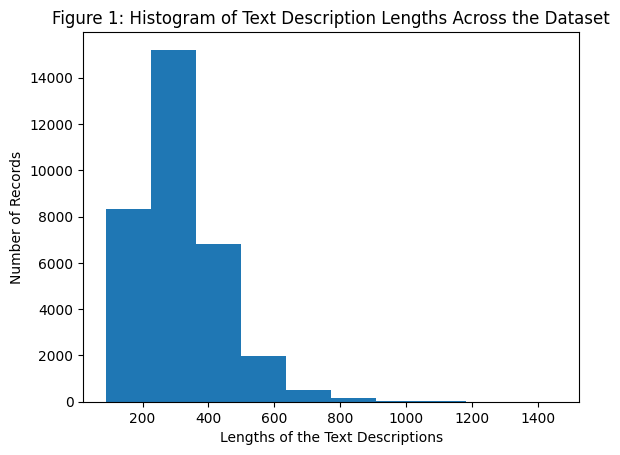

In [ ]:
#@title Distribution Analysis: Text Description Lengths in the Dataset

# text descriptions histogram
plt.hist(lengths);
plt.xlabel("Lengths of the Text Descriptions");
plt.ylabel("Number of Records");
plt.title("Figure 1: Histogram of Text Description Lengths Across the Dataset");

# text description statistics
print(f"Text descriptions statistics:")
print(f"The average length is {avg_length:.1f} characters with a standard deviation of {std_dev_length:.1f} characters.")
print(f"The median length is {median_length} characters, ranging from {min_length} to {max_length} characters.")

#### 3.2.2.4 Sample Raw Data

We also sampled the raw data. The following shows the raw data of Glutaric Acid.

In [ ]:
#@title Example Data Entry: CID 743 - Glutaric Acid

#Example raw data
example_cid = '743'
mol_length =len(train_mols[example_cid])
example_text = train_desc[example_cid]

print(f"This is an example of the raw data:")
print(f"CID is {example_cid},")
print(f"its mol2vec embedding length is {mol_length},")
print(f"and its text description is: '{example_text}'.")


This is an example of the raw data:
CID is 743,
its mol2vec embedding length is 300,
and its text description is: 'Glutaric acid is an alpha,omega-dicarboxylic acid that is a linear five-carbon dicarboxylic acid. It has a role as a human metabolite and a Daphnia magna metabolite. It is a conjugate acid of a glutarate(1-) and a glutarate.'.


We can also explore the molecular structure of CID 743 from the PubChem dataset at: [PubChem Dataset: CID 743](https://pubchem.ncbi.nlm.nih.gov/compound/743#section=2D-Structure).

![](https://drive.google.com/uc?id=14x__vjANi_o7RoOMCecXFDgx_WrdhcTu)

##  3.3 Model

Based on the original article of Text2Mol (Edwards et al., 2021) and the implementation in Github repository (Edwards, 2021), three models are proposed and used in the paper including the multi-layer perceptron (MLP) model, the three-layer graph convolutional network (GCN) and the cross-modal attention modal. Each of these models will be discussed in detail in the subsequent sections.

In this section, we will also provide detailed descriptions of our implementations for ablation studies and additional experiments that extend beyond the scope of the original paper.



### 3.3.1 MLP Model

#### 3.3.1.1 Model Description

  * Model architecture:
    - layers:
      - The MLP model has one linear layer (text_hidden1) to transform the input text descriptions into embeddings before passing them through the normalization layer
      - Three linear layers are used to process the input molecule information before a normalization layer is applied
    - activation function: the model uses the ReLU activation function for the 2 linear layers for molecule information processing
  * Training objectives:
    - loss function: the model uses the symmetric contrastive loss function where it considers the output from both the text description submodel and the molecule submodel. The model is optimized towards embeddings that better capture the similarity of the text descriptions and the molecules.
    - optimizer: the model uses the Adam Optimizer
  * Others:
    - the model incorporates a pre-trained BERT-based transformer model to encode the input text descriptions into embeddings

#### 3.3.1.2 Implementation Code

The code block defines the `AblationOption` class, which encapsulates seven ablation strategies that we implemented and not originally in the paper. These include:

- `normalization_layer_removal`: removing all normalization layers in the MLP model
- `add_dropout`: adding a dropout rate of 0.5 in the MLP model
- `hidden_layer_removal`: removing the second hidden layer of the molecule encoder in the MLP model
- `max_pool`: changing the pooling method from mean pooling to maximum pooling in the GCN model
- `conv_layer_removal`: removing the second convolutional layer in the GCN model
- `change_loss`: changing the contrasive loss function to naive loss.
- `text_length_ablation`: segmentating the dataset by text description length of 300 characters and individually examine their model performances.

Besides, we also conducted two additional ablation studies as described in *4.4 Ablation Studies*.

- changing batch sizes
- changing learning rates

This approach allows us to systematically explore the impact of different model architecture components and hyperparameters on model performance, providing insights that extend the foundational analysis presented in the original study.

In [ ]:
# @title Ablations Overview: Implemented Ablation Options

class AblationOption:
  def __init__(self, normalization_layer_removal, max_pool, hidden_layer_removal, conv_layer_removal, add_dropout, change_loss, text_length_ablation):
    self.normalization_layer_removal = normalization_layer_removal
    self.max_pool = max_pool
    self.hidden_layer_removal = hidden_layer_removal
    self.conv_layer_removal = conv_layer_removal
    self.add_dropout = add_dropout
    self.change_loss = change_loss
    self.text_length_ablation = text_length_ablation

This code defines an `MLPModel` class, a multi-layer perceptron architecture, which integrates a text encoder using SciBERT and a molecule encoder. The ablation studies that we conducted within this model explore the effects of removing certain layers (hidden layers and normalization layers) and adding dropout, allowing for an evaluation of these components' contributions to model performance.

In [ ]:
# @title Implementation of MLP Model and Associated Ablation Options

class MLPModel(nn.Module):
    def __init__(self, ninp, nout, nhid, ablation_option):
        super(MLPModel, self).__init__()

        self.text_hidden1 = nn.Linear(ninp, nout)

        self.ninp = ninp
        self.nhid = nhid
        self.nout = nout
        self.ablation_option = ablation_option

        self.mol_hidden1 = nn.Linear(nout, nhid)

        # Ablation Study: 'hidden_layer_removal'
        # If 'True', the 2nd hidden layer of the molecule encoder will be removed.
        if not ablation_option.hidden_layer_removal:
            self.mol_hidden2 = nn.Linear(nhid, nhid)

        self.mol_hidden3 = nn.Linear(nhid, nout)

        self.temp = nn.Parameter(torch.Tensor([0.07]))
        self.register_parameter( 'temp' , self.temp )

        # Ablation Study: 'add_dropout'
        # If'True', define a dropout rate of 0.5.
        if ablation_option.add_dropout:
            self.dropout = nn.Dropout(0.5)

        # Ablation Study: 'normalization_layer_removal'
        # If 'True', remove all normalization layers.
        if not ablation_option.normalization_layer_removal:
            self.ln1 = nn.LayerNorm((nout))
            self.ln2 = nn.LayerNorm((nout))

        self.relu = nn.ReLU()
        self.selu = nn.SELU()

        self.other_params = list(self.parameters())

        self.text_transformer_model = BertModel.from_pretrained('allenai/scibert_scivocab_uncased')
        self.text_transformer_model.train()

    def forward(self, text, molecule, text_mask = None):

        text_encoder_output = self.text_transformer_model(text, attention_mask = text_mask)

        text_x = text_encoder_output['pooler_output']

        text_x = self.text_hidden1(text_x)

        x = self.relu(self.mol_hidden1(molecule))

        # Ablation Study: 'add_dropout'
        # If 'True', add the predefined dropout.
        if self.ablation_option.add_dropout:
            x = self.dropout(x)

        # Ablation Study: 'hidden_layer_removal'
        # If 'True', output will not pass through the 2nd hidden layer with non-linear activation.
        if not self.ablation_option.hidden_layer_removal:
            x = self.relu(self.mol_hidden2(x))

        x = self.mol_hidden3(x)

        # Ablation Study: 'normalization_layer_removal'
        # If 'True', output will not pass through any normalization layer of either the text or molecule encoders.
        if not self.ablation_option.normalization_layer_removal:
            x = self.ln1(x)
            text_x = self.ln2(text_x)

        x = x * torch.exp(self.temp)
        text_x = text_x * torch.exp(self.temp)

        return text_x, x

#### 3.3.1.3 Pretrained MLP Model Checkpoint

All the pretrained MLP model checkpoints are available at:

**All Model Checkpoints URL:** https://drive.google.com/drive/folders/1rBOlPcRzkQ-lf7qCSuWbFOT2fqc3GopY?usp=drive_link

And we have loaded one MLP model checkpoint to demonstrate its evaluation process and results in the Results section.

All the MLP model embeddings are available at:

**All Model Embeddings URL:** https://drive.google.com/drive/folders/1mGnP54MZUGfq-sKa-XB_Yn1Uypx3Pgul?usp=drive_link.

### 3.3.2 GCN Model



#### 3.3.2.1 Model Description

  * Model architecture:
    - layers:
      - The GCN model has one linear layer (text_hidden1) to transform the input text descriptions into embeddings before passing them through the normalization layer
     - Three Graph Convolutional Network (GCN) layers are used to generate the node embeddings from the graph data before a normalization layer is applied
    - activation function: the model uses the ReLU activation function for the 2 linear layers for molecule information processing and the layers of the GCN
  * Training objectives:
    - loss function: the model uses the symmetric contrastive loss function where it considers the output from both the text description submodel and the molecule submodel. The model is optimized towards embeddings that better capture the similarity of the text descriptions and the molecules.
    - optimizer: the model uses the Adam Optimizer
  * Others:
    - the model incorporates a pre-trained BERT-based transformer model to encode the input text descriptions into embeddings

#### 3.3.2.2 Implementation Code

This code defines a `GCNModel` class, incorporating a graph convolutional network (GCN) for molecular encoding and a text encoder using SciBERT. The model integrates several layers for processing graph-based molecular data and textual information, utilizing layer normalization and nonlinear activations to enhance learning.

The ablation studies implemented within this model include the removal of convolutional layers to assess their impact on the model's performance and an option to switch between mean and max pooling methods to investigate how different pooling strategies affect the final molecular representations.

In [ ]:
# @title Implementation of GCN Model and Associated Ablation Options

class GCNModel(nn.Module):
    def __init__(self, num_node_features, ninp, nout, nhid, graph_hidden_channels,ablation_option):
        super(GCNModel, self).__init__()

        self.text_hidden1 = nn.Linear(ninp, nout)

        self.ninp = ninp
        self.nhid = nhid
        self.nout = nout
        self.ablation_option = ablation_option

        self.temp = nn.Parameter(torch.Tensor([0.07]))
        self.register_parameter( 'temp' , self.temp )

        self.ln1 = nn.LayerNorm((nout))
        self.ln2 = nn.LayerNorm((nout))

        self.relu = nn.ReLU()
        self.selu = nn.SELU()

        self.conv1 = GCNConv(num_node_features, graph_hidden_channels)

        # Ablation Study: 'conv_layer_removal'
        # If 'True', remove the 2nd convolutional layer of the molecule encoder.
        if not ablation_option.conv_layer_removal:
            self.conv2 = GCNConv(graph_hidden_channels, graph_hidden_channels)

        self.conv3 = GCNConv(graph_hidden_channels, graph_hidden_channels)
        self.mol_hidden1 = nn.Linear(graph_hidden_channels, nhid)

        self.mol_hidden2 = nn.Linear(nhid, nhid)
        self.mol_hidden3 = nn.Linear(nhid, nout)

        self.other_params = list(self.parameters())

        self.text_transformer_model = BertModel.from_pretrained('allenai/scibert_scivocab_uncased')
        self.text_transformer_model.train()

    def forward(self, text, graph_batch, text_mask = None, molecule_mask = None):

        text_encoder_output = self.text_transformer_model(text, attention_mask = text_mask)

        text_x = text_encoder_output['pooler_output']
        text_x = self.text_hidden1(text_x)

        x = graph_batch.x
        edge_index = graph_batch.edge_index
        batch = graph_batch.batch
        x = self.conv1(x, edge_index)
        x = x.relu()

        # Ablation Study: 'conv_layer_removal'
        # If 'True', output will not pass through the 2nd convolutional layer.
        if not self.ablation_option.conv_layer_removal:
            x = self.conv2(x, edge_index)
            x = x.relu()


        x = self.conv3(x, edge_index)

        # Ablation study: 'max_pool'
        # If 'True', changing global_mean_pool to global_max_pool.
        if not self.ablation_option.max_pool:
            x = global_mean_pool(x, batch)  # [batch_size, graph_hidden_channels]
        else:
            x = global_max_pool(x, batch)

        x = self.mol_hidden1(x).relu()
        x = self.mol_hidden2(x).relu()
        x = self.mol_hidden3(x)

        x = self.ln1(x)
        text_x = self.ln2(text_x)

        x = x * torch.exp(self.temp)
        text_x = text_x * torch.exp(self.temp)

        return text_x, x

#### 3.3.2.3 Pretrained GCN Model Checkpoint

Similarly, All the pretrained GCN model checkpoints are available at:

**All Model Checkpoints URL:** https://drive.google.com/drive/folders/1rBOlPcRzkQ-lf7qCSuWbFOT2fqc3GopY?usp=drive_link

The training time for the GCN model is significantly longer than the MLP model. We will not be demonstrating the training process in the notebook due to the runtime limits.

All the GCN model embeddings are available at:

**All Model Embeddings URL:** https://drive.google.com/drive/folders/1mGnP54MZUGfq-sKa-XB_Yn1Uypx3Pgul?usp=drive_link.

###3.3.3 Attention Layer


#### 3.3.3.1 Model Description

  * Model architecture:
    - layers:
      - The Attention model has two linear layers to transform the input text descriptions into embeddings before passing them through the normalization layer
     - Three Graph Convolutional Network (GCN) layers are used to generate the node embeddings from the graph data
      - Two linear layers are used to process the node embedding outputs from the GCN before a normalization layer is applied
     - A Transformer decoder with three layers. The decoder applies text to text attention to capture the relevant information within the text embeddings.
    - activation function: the model uses the ReLU activation function for one linear layer for molecule information processing and the layers of the GCN. tanh is used as the activation function for the output of “text_hidden1” layer
  * Training objectives:
    - loss function: the model uses the symmetric contrastive loss function with negative sampling. The contrastive loss function considers the output from both the text description submodel and the molecule submodel. Negative sampling is used to minimize information leakage
    - optimizer: the model uses the Adam Optimizer
  * Others:
    - the model incorporates a pre-trained BERT-based transformer model to encode the input text descriptions into embeddings

#### 3.3.3.2 Implementation code

This code defines an `AttentionModel` class that combines a transformer decoder for text processing with a graph convolutional network (GCN) for molecular data, enabling cross-modal learning by attending over graph-based molecular features and textual features from SciBERT embeddings.

In [ ]:
# @title Attention Layer Implementation

class AttentionModel(nn.Module):
  # (Edwards, 2021).
    def __init__(self, num_node_features, ninp, nout, nhid, nhead, nlayers, graph_hidden_channels, mol_trunc_length, temp, dropout=0.5):
        super(AttentionModel, self).__init__()

        self.text_hidden1 = nn.Linear(ninp, nhid)
        self.text_hidden2 = nn.Linear(nhid, nout)

        self.ninp = ninp
        self.nhid = nhid
        self.nout = nout
        self.num_node_features = num_node_features
        self.graph_hidden_channels = graph_hidden_channels
        self.mol_trunc_length = mol_trunc_length

        self.drop = nn.Dropout(p=dropout)

        decoder_layers = TransformerDecoderLayer(ninp, nhead, nhid, dropout)
        self.text_transformer_decoder = TransformerDecoder(decoder_layers, nlayers)

        self.temp = nn.Parameter(torch.Tensor([temp]))
        self.register_parameter( 'temp' , self.temp )

        self.ln1 = nn.LayerNorm((nout))
        self.ln2 = nn.LayerNorm((nout))

        self.relu = nn.ReLU()
        self.selu = nn.SELU()

        #For GCN:
        self.conv1 = GCNConv(self.num_node_features, graph_hidden_channels)
        self.conv2 = GCNConv(graph_hidden_channels, graph_hidden_channels)
        self.conv3 = GCNConv(graph_hidden_channels, graph_hidden_channels)
        self.mol_hidden1 = nn.Linear(graph_hidden_channels, nhid)
        self.mol_hidden2 = nn.Linear(nhid, nout)

        self.other_params = list(self.parameters()) #get all but bert params

        self.text_transformer_model = BertModel.from_pretrained('allenai/scibert_scivocab_uncased')
        self.text_transformer_model.train()

        self.device = 'cpu'

    def set_device(self, dev):
        self.to(dev)
        self.device = dev

    def forward(self, text, graph_batch, text_mask = None, molecule_mask = None):

        text_encoder_output = self.text_transformer_model(text, attention_mask = text_mask)

        #Obtain node embeddings
        x = graph_batch.x
        edge_index = graph_batch.edge_index
        batch = graph_batch.batch
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        mol_x = self.conv3(x, edge_index)

        #turn pytorch geometric output into the correct format for transformer
        #requires recovering the nodes from each graph into a separate dimension
        node_features = torch.zeros((graph_batch.num_graphs, self.mol_trunc_length, self.graph_hidden_channels)).to(self.device)
        for i, p in enumerate(graph_batch.ptr):
          if p == 0:
            old_p = p
            continue
          node_features[i - 1, :p-old_p, :] = mol_x[old_p:torch.min(p, old_p + self.mol_trunc_length), :]
          old_p = p
        node_features = torch.transpose(node_features, 0, 1)

        text_output = self.text_transformer_decoder(text_encoder_output['last_hidden_state'].transpose(0,1), node_features,
                                                            tgt_key_padding_mask = text_mask == 0, memory_key_padding_mask = ~molecule_mask)

        #Readout layer
        x = global_mean_pool(mol_x, batch)  # [batch_size, graph_hidden_channels]

        x = self.mol_hidden1(x)
        x = x.relu()
        x = self.mol_hidden2(x)

        text_x = torch.tanh(self.text_hidden1(text_output[0,:,:])) #[CLS] pooler
        text_x = self.text_hidden2(text_x)

        x = self.ln1(x)
        text_x = self.ln2(text_x)

        x = x * torch.exp(self.temp)
        text_x = text_x * torch.exp(self.temp)

        return text_x, x

#### 3.3.3.3 Pretrained Attention Layer Checkpoint

The training time for the Attention model is significantly longer than the MLP model. We will not be demonstrating the training process in the notebook due to the runtime limits. All the pretrained attention model checkpoints are available at:

**All Model Checkpoints URL:** https://drive.google.com/drive/folders/1rBOlPcRzkQ-lf7qCSuWbFOT2fqc3GopY?usp=drive_link

And the mha_weights.pkl is accessble through the public GCS bucket as mentioned in the "Getting Started" section.

## 3.4 Training

### 3.4.1 Hyperparameters

* **Learning Rate:** 3e-5(SciBERT) and 1e-4.
* **Batch size:** 32
* **Hidden layers:** 3(MLP), 3(GCN)
* **Drop out:** None.

In the original "Text2Mol" paper, the authors specify a set of hyperparameters for training their models. They use a finetuning learning rate of 3e-5 for the SciBERT model while the rest of the model components are trained with a learning rate of 1e-4. The batch size for training is set at 32, and both the MLP and GCN models consist of 3 hidden layers each. No dropout is applied in the training process, which suggests an emphasis on maintaining all features during the learning phase.

In our ablation studies, we adjust these hyperparameters to investigate their impact on model performance. Specifically, we halve the learning rates, setting the finetuning rate for SciBERT to 1.5e-5 and the rate for the rest of the model to 5e-5. Additionally, we reduce the batch size to 16 to explore the effects of a smaller batch size on the training dynamics and model generalization. These modifications are intended to test the robustness and sensitivity of the models to changes in training configurations.

### 3.4.2 Computational Requirements

* **Total number of trials:** 20 (see [All Model Checkpoints](https://drive.google.com/drive/folders/1rBOlPcRzkQ-lf7qCSuWbFOT2fqc3GopY?usp=drive_link) )
  - 6 runs of the baseline models
  - 11 runs of the ablation studies
  - 1 run of the attention model
  - 2 runs of additional experiments.

  - In addition, 13 runs of ensembles, 3 runs of the cross-modal attention and FPGrowth association rules, 2 runs of additional experiments (ensemble strategy exploration).
* **Training epochs:** 40 (Except that in our ablation study on early stopping, we trained three MLP models, halting their training at epochs 15, 20, and 25 respectively.)
* **Type of Hardware:** All experiments were conducted on the UIUC Campus Cluster utilizing a single Nvidia A5000 GPU, 4 CPUs per task, and 32GB of memory.
* **Average runtime for each epoch:**
  - MLP model: 314 s
  - GCN model: 659 s
  - Attention model: 967 s
* **GPU hrs used:**  approximately 96.7 hours
  - MLP model: 3.5 hours per trial, 14 trials, totalling 49.0 hours
  - GCN model: 7.4 hours per trial, 5 trials, totalling 37.0 hours
  - Attention layer: 10.7 hours per trial
* **Actural computational time** for each baseline MLP and GCN model is shown in Table 1.

In [ ]:
# @title Summarize Actual Runtimes for Model Training and Validation
def ReadModelTrainingLog(filename):
    res = pd.read_csv(filename)
    return res

def GenerateLogTable(model_log_file_map):
    table = None
    for model_name, file_name in model_log_file_map.items():
        res = ReadModelTrainingLog(file_name)

        train_time = res['Train Time'].sum()
        valid_time = res['Valid Time'].sum()

        row = pd.DataFrame({
                'Model': [model_name],
                'Train time': [train_time],
                'Valid time': [valid_time],
            })

        if table is None:
            table = row
        else:
            table = pd.concat([table, row], ignore_index=True)
    return table

In [ ]:
model_log_filenames1 = {
    'MLP1': '/content/tar_files/training loss_validation loss_computation_time/mlp1.csv',
    'MLP2': '/content/tar_files/training loss_validation loss_computation_time/mlp2.csv',
    'MLP3': '/content/tar_files/training loss_validation loss_computation_time/mlp3.csv',
    'GCN1': '/content/tar_files/training loss_validation loss_computation_time/gcn1.csv',
    'GCN2': '/content/tar_files/training loss_validation loss_computation_time/gcn2.csv',
    'GCN3': '/content/tar_files/training loss_validation loss_computation_time/gcn3.csv',
    'Ablation: add dropput': '/content/tar_files/training loss_validation loss_computation_time/ablation_add_dropout_rate_0.5_mlp.csv',
    'Ablation: change pooling': '/content/tar_files/training loss_validation loss_computation_time/ablation_max_pool_gcn.csv',
    'Ablation: reduce batch size': '/content/tar_files/training loss_validation loss_computation_time/ablation_reduce_batch_size_16_mlp.csv',
    'Ablation: change learning rate': '/content/tar_files/training loss_validation loss_computation_time/ablation_reduce_learning_rate_mlp.csv',
    'Ablation: remove convolutional layer': '/content/tar_files/training loss_validation loss_computation_time/ablation_remove_convolutional_layer_2_gcn.csv',
    'Ablation: remove hidden layer': '/content/tar_files/training loss_validation loss_computation_time/ablation_remove_molecule_encoder_hidden_layer_2_mlp.csv',
    'Ablation: remove normalization layers': '/content/tar_files/training loss_validation loss_computation_time/ablation_remove_normalization_layers_mlp.csv',
}

table1 = GenerateLogTable(model_log_filenames1)
display(HTML('<h3>Table 1. Actural Model Training and Validation Time (s) </h3>'))
table1

,Model,Train time,Valid time
0,MLP1,12554.089211,597.382976
1,MLP2,12669.901670,616.165603
2,MLP3,12691.942517,621.945207
3,GCN1,26312.828763,1865.489668
4,GCN2,25885.429670,1835.201016
5,GCN3,26866.976737,1951.052202
6,Ablation: add dropput,12680.969298,612.813046
7,Ablation: change pooling,32417.665352,2370.592437
8,Ablation: reduce batch size,13853.345034,628.418312
9,Ablation: change learning rate,12727.602396,622.782564


### 3.4.3 Training code

#### 3.4.3.1 Losses

We conducted an ablation study which changes the loss function to `naive_loss` function, computing cross-entropy loss using only direct matches between vectors `v1` and `v2`, unlike `contrastive_loss` which also considers reciprocal matches to ensure symmetry in similarity.

In [ ]:
# @title Implementation of Losses and Associated Ablation Option

CE = nn.CrossEntropyLoss()

# Ablation Study: 'change_loss'
# define naive_loss using only direct matches between v1 and v2.
def naive_loss(v1, v2):
  logits = torch.matmul(v1,torch.transpose(v2, 0, 1))
  labels = torch.arange(logits.shape[0], device=v1.device)
  return CE(logits, labels)

def contrastive_loss(v1, v2):
  logits = torch.matmul(v1,torch.transpose(v2, 0, 1))
  labels = torch.arange(logits.shape[0], device=v1.device)
  return CE(logits, labels) + CE(torch.transpose(logits, 0, 1), labels)

BCEL = nn.BCEWithLogitsLoss()

def negative_sampling_contrastive_loss(v1, v2, labels):
  logits = torch.matmul(v1,torch.transpose(v2, 0, 1))
  eye = torch.diag_embed(labels).to(v1.device)
  return BCEL(logits, eye) + BCEL(torch.transpose(logits, 0, 1), eye), logits.diag() > 0

#### 3.4.3.2 Dataloaders

This code implements an extended study not in the original paper to examine the impact of text length on model performance. It processes text descriptions based on their length:

1. **Long Texts**: If `text_length_ablation` is set to "long", only descriptions longer than 300 characters are processed.
2. **Short Texts**: If set to "short", it processes descriptions of 300 characters or fewer.
3. **No Restriction**: Without specific settings, it processes all descriptions.

In [ ]:
#@title Implementation of Dataloaders and Additional Experiment of Various Text Lengths

class GenerateData():
  def __init__(self, text_trunc_length, path_train, path_val, path_test, path_molecules, path_token_embs, text_length_ablation):
    self.path_train = path_train
    self.path_val = path_val
    self.path_test = path_test
    self.path_molecules = path_molecules
    self.path_token_embs = path_token_embs

    self.text_trunc_length = text_trunc_length
    self.text_length_ablation = text_length_ablation

    self.prep_text_tokenizer()

    if path_molecules is not None:
      self.load_substructures()

    self.store_descriptions()

  def load_substructures(self):
    self.molecule_sentences = {}
    self.molecule_tokens = {}

    total_tokens = set()
    self.max_mol_length = 0
    with open(self.path_molecules) as f:
      for line in f:
        spl = line.split(":")
        cid = spl[0]
        tokens = spl[1].strip()
        self.molecule_sentences[cid] = tokens
        t = tokens.split()
        total_tokens.update(t)
        size = len(t)
        if size > self.max_mol_length: self.max_mol_length = size

    self.token_embs = np.load(self.path_token_embs, allow_pickle = True)[()]

  def prep_text_tokenizer(self):
    self.text_tokenizer = BertTokenizerFast.from_pretrained("allenai/scibert_scivocab_uncased")

  def store_descriptions(self):
    self.descriptions = {}

    self.mols = {}

    self.training_cids = []

    with open(self.path_train) as f:
      reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
      for n, line in enumerate(reader):

        # Additional Experiment Beyond Original Paper: Text Length
        # If text_length_ablation is set to "long", only process descriptions longer than 300 characters
        if self.text_length_ablation == "long":
          if len(line['desc']) > 300:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.training_cids.append(line['cid'])

        # If text_length_ablation is set to "short", only process descriptions that are 300 characters or shorter
        elif self.text_length_ablation == "short":
          if len(line['desc']) <= 300:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.training_cids.append(line['cid'])

        # If no specific text length ablation is set, process all descriptions
        else:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.training_cids.append(line['cid'])

    self.validation_cids = []

    with open(self.path_val) as f:
      reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
      for n, line in enumerate(reader):
        if self.text_length_ablation == "long":
          if len(line['desc']) > 300:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.validation_cids.append(line['cid'])
        elif self.text_length_ablation == "short":
          if len(line['desc']) <= 300:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.validation_cids.append(line['cid'])
        else:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.validation_cids.append(line['cid'])

    self.test_cids = []

    with open(self.path_test) as f:
      reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
      for n, line in enumerate(reader):
        if self.text_length_ablation == "long":
          if len(line['desc']) > 300:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.test_cids.append(line['cid'])
        elif self.text_length_ablation == "short":
          if len(line['desc']) <= 300:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.test_cids.append(line['cid'])
        else:
            self.descriptions[line['cid']] = line['desc']
            self.mols[line['cid']] = line['mol2vec']
            self.test_cids.append(line['cid'])

    self.test_cids_sample  = self.test_cids

  def generate_examples_train(self):
    """Yields examples."""
    np.random.shuffle(self.training_cids)

    for cid in self.training_cids:
      text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length,
                                        padding='max_length', return_tensors = 'np')

      yield {
          'cid': cid,
          'input': {
              'text': {
                'input_ids': text_input['input_ids'].squeeze(),
                'attention_mask': text_input['attention_mask'].squeeze(),
              },
              'molecule' : {
                    'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
                    'cid' : cid
              },
          },
      }

  def generate_examples_val(self):
    """Yields examples."""

    np.random.shuffle(self.validation_cids)

    for cid in self.validation_cids:
        text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, padding = 'max_length',
                                         max_length=self.text_trunc_length, return_tensors = 'np')

        mol_input = []

        yield {
            'cid': cid,
            'input': {
                'text': {
                  'input_ids': text_input['input_ids'].squeeze(),
                  'attention_mask': text_input['attention_mask'].squeeze(),
                },
                'molecule' : {
                    'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
                    'cid' : cid
                }
            },
        }


  def generate_examples_test(self):
    """Yields examples."""

    np.random.shuffle(self.test_cids)

    for cid in self.test_cids:
        text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, padding = 'max_length',
                                         max_length=self.text_trunc_length, return_tensors = 'np')

        mol_input = []

        yield {
            'cid': cid,
            'input': {
                'text': {
                  'input_ids': text_input['input_ids'].squeeze(),
                  'attention_mask': text_input['attention_mask'].squeeze(),
                },
                'molecule' : {
                    'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
                    'cid' : cid
                }
            },
        }

class MolDataset(Dataset):
  'PyTorch dataset for MLP version of model'
  def __init__(self, gen, length):
      'Initialization'

      self.gen = gen
      self.it = iter(self.gen())

      self.length = length

  def __len__(self):
      'Denotes the total number of samples'
      return self.length


  def __getitem__(self, index):
      'Generates one sample of data'

      try:
        ex = next(self.it)
      except StopIteration:
        self.it = iter(self.gen())
        ex = next(self.it)

      X = ex['input']
      y = 1

      return X, y


def get_dataloader(data_generator, params):

    training_set = MolDataset(data_generator.generate_examples_train, len(data_generator.training_cids))
    validation_set = MolDataset(data_generator.generate_examples_val, len(data_generator.validation_cids))
    test_set = MolDataset(data_generator.generate_examples_test, len(data_generator.test_cids))

    training_generator = DataLoader(training_set,
                                    **params)
    validation_generator = DataLoader(validation_set,
                                      **params)
    test_generator = DataLoader(test_set, **params)

    return training_generator, validation_generator, test_generator


class MoleculeGraphDataset(GeoDataset):
    def __init__(self, root, cids, data_path, gt, transform=None, pre_transform=None):
        self.cids = cids
        self.data_path = data_path
        self.gt = gt
        super(MoleculeGraphDataset, self).__init__(root, transform, pre_transform)

        self.idx_to_cid = {}
        i = 0
        for raw_path in self.raw_paths:
            cid = int(raw_path.split('/')[-1][:-6])
            self.idx_to_cid[i] = cid
            i += 1

    @property
    def raw_file_names(self):
        return [cid + ".graph" for cid in self.cids]

    @property
    def processed_file_names(self):
        return ['data_{}.pt'.format(cid) for cid in self.cids]

    def download(self):
        # Download to `self.raw_dir`.
        print(self.raw_dir)
        print(osp.join(self.raw_dir, "mol_graphs.zip"))
        print(osp.exists(osp.join(self.raw_dir, "mol_graphs.zip")))
        if not osp.exists(osp.join(self.raw_dir, "mol_graphs.zip")):
            shutil.copy(self.data_path, os.path.join(self.raw_dir, "mol_graphs.zip"))

    def process_graph(self, raw_path):
      edge_index  = []
      x = []
      with open(raw_path, 'r') as f:
        next(f)
        for line in f: #edges
          if line != "\n":
            edge = *map(int, line.split()),
            edge_index.append(edge)
          else:
            break
        next(f)
        for line in f: #get mol2vec features:
          substruct_id = line.strip().split()[-1]
          if substruct_id in self.gt.token_embs:
            x.append(self.gt.token_embs[substruct_id])
          else:
            x.append(self.gt.token_embs['UNK'])

        return torch.LongTensor(edge_index).T, torch.FloatTensor(x)

    def process(self):

        with zipfile.ZipFile(osp.join(self.raw_dir, "mol_graphs.zip"), 'r') as zip_ref:
            zip_ref.extractall(self.raw_dir)

        i = 0
        for raw_path in self.raw_paths:
            # Read data from `raw_path`.

            cid = int(raw_path.split('/')[-1][:-6])

            edge_index, x = self.process_graph(raw_path)
            data = Data(x=x, edge_index = edge_index)

            if self.pre_filter is not None and not self.pre_filter(data):
                continue

            if self.pre_transform is not None:
                data = self.pre_transform(data)

            torch.save(data, osp.join(self.processed_dir, 'data_{}.pt'.format(cid)))
            i += 1

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, 'data_{}.pt'.format(self.idx_to_cid[idx])))
        return data

    def get_cid(self, cid):
        data = torch.load(osp.join(self.processed_dir, 'data_{}.pt'.format(cid)))
        return data

class CustomGraphCollater(object):
    def __init__(self, dataset, follow_batch = [], exclude_keys = []):
        self.follow_batch = follow_batch
        self.exclude_keys = exclude_keys
        self.dataset = dataset

    def collate(self, batch):
        elem = batch[0]
        if isinstance(elem, Data):
            return Batch.from_data_list(batch)

        raise TypeError('DataLoader found invalid type: {}'.format(type(elem)))

    def __call__(self, cids):

        return self.collate([self.dataset.get_cid(int(cid)) for cid in cids])


def get_graph_data(data_generator, graph_data_path):
    root = osp.join(graph_data_path[:-len(osp.basename(graph_data_path))], 'graph-data/')
    #graph_data_path = "input/mol_graphs.zip"
    if not os.path.exists(root):
        os.mkdir(root)

    mg_data_tr = MoleculeGraphDataset(root, data_generator.training_cids, graph_data_path, data_generator)
    graph_batcher_tr = CustomGraphCollater(mg_data_tr)

    mg_data_val = MoleculeGraphDataset(root, data_generator.validation_cids, graph_data_path, data_generator)
    graph_batcher_val = CustomGraphCollater(mg_data_val)

    mg_data_test = MoleculeGraphDataset(root, data_generator.test_cids, graph_data_path, data_generator)
    graph_batcher_test = CustomGraphCollater(mg_data_test)

    return graph_batcher_tr, graph_batcher_val, graph_batcher_test

#Loaders for attention association rule models

class GenerateDataAttention():
  def __init__(self, text_trunc_length, path_train, path_val, path_test, path_molecules, path_token_embs, sample):
    self.path_train = path_train
    self.path_val = path_val
    self.path_test = path_test
    self.path_molecules = path_molecules
    self.path_token_embs = path_token_embs

    self.text_trunc_length = text_trunc_length

    self.sample = sample

    self.prep_text_tokenizer()

    self.load_substructures()

    self.store_descriptions()

  def load_substructures(self):
    self.molecule_sentences = {}
    self.molecule_tokens = {}

    total_tokens = set()
    self.max_mol_length = 0
    with open(self.path_molecules) as f:
      for line in f:
        spl = line.split(":")
        cid = spl[0]
        tokens = spl[1].strip()
        self.molecule_sentences[cid] = tokens
        t = tokens.split()
        total_tokens.update(t)
        size = len(t)
        if size > self.max_mol_length: self.max_mol_length = size

    self.token_embs = np.load(self.path_token_embs, allow_pickle = True)[()]

  def prep_text_tokenizer(self):
    self.text_tokenizer = BertTokenizerFast.from_pretrained("allenai/scibert_scivocab_uncased")

  def store_descriptions(self):
    self.descriptions = {}

    self.mols = {}

    self.training_cids = []
    #get training set cids...
    with open(self.path_train) as f:
      reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
      for n, line in enumerate(reader):
        self.descriptions[line['cid']] = line['desc']
        self.mols[line['cid']] = line['mol2vec']
        self.training_cids.append(line['cid'])

    if self.sample == True:
          self.training_cids  = random.sample(self.training_cids, int(len(self.training_cids)/10))

    self.validation_cids = []
    #get validation set cids...
    with open(self.path_val) as f:
      reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
      for n, line in enumerate(reader):
        self.descriptions[line['cid']] = line['desc']
        self.mols[line['cid']] = line['mol2vec']
        self.validation_cids.append(line['cid'])

    if self.sample == True:
          self.validation_cids  = random.sample(self.validation_cids, int(len(self.validation_cids)/10))

    self.test_cids = []
    with open(self.path_test) as f:
      reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
      for n, line in enumerate(reader):
        self.descriptions[line['cid']] = line['desc']
        self.mols[line['cid']] = line['mol2vec']
        self.test_cids.append(line['cid'])

    if self.sample == True:
          self.test_cids  = random.sample(self.test_cids, int(len(self.test_cids)/10))

  #transformers can't take array with full attention so have to pad a 0...
  def padarray(self, A, size, value=0):
      t = size - len(A)
      return np.pad(A, pad_width=(0, t), mode='constant', constant_values = value)


  def generate_examples_train(self):
    """Yields examples."""

    np.random.shuffle(self.training_cids)

    for cid in self.training_cids:
      label = np.random.randint(2)
      rand_cid = np.random.choice(self.training_cids)
      if label:
        text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
                                        padding='max_length', return_tensors = 'np')
      else:
        text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
                                        padding='max_length', return_tensors = 'np')

      text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
      text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

      yield {
          'cid': cid,
          'input': {
              'text': {
                'input_ids': text_ids,
                'attention_mask': text_mask,
              },
              'molecule' : {
                    'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
                    'cid' : cid
              },
          },
          'label': label
      }


  def generate_examples_val(self):
    """Yields examples."""

    np.random.shuffle(self.validation_cids)

    for cid in self.validation_cids:
      label = np.random.randint(2)
      rand_cid = np.random.choice(self.validation_cids)
      if label:
        text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
                                        padding='max_length', return_tensors = 'np')
      else:
        text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
                                        padding='max_length', return_tensors = 'np')


      text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
      text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

      yield {
          'cid': cid,
          'input': {
              'text': {
                'input_ids': text_ids,
                'attention_mask': text_mask,
              },
              'molecule' : {
                    'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
                    'cid' : cid
              },
          },
          'label': label
      }

  def generate_examples_test(self):
    """Yields examples."""

    np.random.shuffle(self.test_cids)

    for cid in self.test_cids:
      label = np.random.randint(2)
      rand_cid = np.random.choice(self.test_cids)
      if label:
        text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
                                        padding='max_length', return_tensors = 'np')
      else:
        text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
                                        padding='max_length', return_tensors = 'np')


      text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
      text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

      yield {
          'cid': cid,
          'input': {
              'text': {
                'input_ids': text_ids,
                'attention_mask': text_mask,
              },
              'molecule' : {
                    'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
                    'cid' : cid
              },
          },
          'label': label
      }


class AttentionDataset(Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, gen, length):
      'Initialization'

      self.gen = gen
      self.it = iter(self.gen())

      self.length = length

  def __len__(self):
      'Denotes the total number of samples'
      return self.length


  def __getitem__(self, index):
      'Generates one sample of data'

      try:
        ex = next(self.it)
      except StopIteration:
        self.it = iter(self.gen())
        ex = next(self.it)

      X = ex['input']
      y = ex['label']

      return X, y



class AttentionGraphCollater(object):
    def __init__(self, dataset, mask_len, follow_batch = [], exclude_keys = []):
        self.follow_batch = follow_batch
        self.exclude_keys = exclude_keys
        self.dataset = dataset
        self.mask_len = mask_len
        self.mask_indices = np.array(range(mask_len))

    def generate_mask(self, sz):
        rv = torch.zeros((self.mask_len), dtype = torch.bool)
        rv = rv.masked_fill(torch.BoolTensor(self.mask_indices < sz), bool(1)) #pytorch transformer input version
        rv[-1] = 0 #set last value to 0 because pytorch can't handle all 1s
        return rv

    def get_masks(self, batch):
      return torch.stack([self.generate_mask(b.x.shape[0]) for b in batch])

    def collate(self, batch):
        elem = batch[0]
        if isinstance(elem, Data):
            return Batch.from_data_list(batch)

        raise TypeError('DataLoader found invalid type: {}'.format(type(elem)))

    def __call__(self, cids):

        tmp = [self.dataset.get_cid(int(cid)) for cid in cids]
        return self.collate(tmp), self.get_masks(tmp)

def get_attention_graph_data(data_generator, graph_data_path, mol_trunc_length):
    root = osp.join(graph_data_path[:-len(osp.basename(graph_data_path))], 'graph-data/')
    #graph_data_path = "input/mol_graphs.zip"
    if not os.path.exists(root):
        os.mkdir(root)

    mg_data_tr = MoleculeGraphDataset(root, data_generator.training_cids, graph_data_path, data_generator)
    graph_batcher_tr = AttentionGraphCollater(mg_data_tr, mol_trunc_length)

    mg_data_val = MoleculeGraphDataset(root, data_generator.validation_cids, graph_data_path, data_generator)
    graph_batcher_val = AttentionGraphCollater(mg_data_val, mol_trunc_length)

    mg_data_test = MoleculeGraphDataset(root, data_generator.test_cids, graph_data_path, data_generator)
    graph_batcher_test = AttentionGraphCollater(mg_data_test, mol_trunc_length)

    return graph_batcher_tr, graph_batcher_val, graph_batcher_test


def get_attention_dataloader(data_generator, params):

    training_set = AttentionDataset(data_generator.generate_examples_train, len(data_generator.training_cids))
    validation_set = AttentionDataset(data_generator.generate_examples_val, len(data_generator.validation_cids))
    test_set = AttentionDataset(data_generator.generate_examples_test, len(data_generator.test_cids))

    training_generator = DataLoader(training_set,
                                    **params)
    validation_generator = DataLoader(validation_set,
                                      **params)
    test_generator = DataLoader(test_set, **params)


    return training_generator, validation_generator, test_generator

#### 3.4.3.3 Training code

The following implementation sets up and runs model training for three different architectures (MLP, GCN, Attention). We have implemented the following:
- **Implementation of Ablation Study**: The script includes an ablation study for changing the loss function, allowing experimentation with different loss computations to evaluate their impact on model performance.

- **Debugging and Enhancements**: Significant effort was spent debugging the original code provided by the authors. Notably, modifications were made to ensure proper output of attention weights in the Attention model. The `AttentionModifier` class was introduced to fix a bug and modify the behavior of the attention mechanism to output weights necessary for further analysis.

In [ ]:
#@title Implementation of Model Training and Associated Ablation Option

# from losses import contrastive_loss, negative_sampling_contrastive_loss, naive_loss
# from models import MLPModel, GCNModel, AttentionModel
# from dataloaders import get_dataloader, GenerateData, get_graph_data, get_attention_graph_data, GenerateDataAttention, get_attention_dataloader

# parser = argparse.ArgumentParser(description='Run Text2Mol')
# parser.add_argument('--data', metavar='data', type=str,
#                     help='directory where data is located')
# parser.add_argument('--output_path', metavar='output_path', type=str,
#                     help='directory where data is located')
# parser.add_argument('--model', type=str, default='MLP', nargs='?',
#                     help="model type from 'MLP, 'GCN', 'Attention'")
# parser.add_argument('--mol_trunc_length', type=int, nargs='?', default=512,
#                     help='Molecule truncation length.')
# parser.add_argument('--text_trunc_length', type=int, nargs='?', default=256,
#                     help='Text truncation length.')
# parser.add_argument('--num_warmup_steps', type=int, nargs='?', default=1000,
#                     help='Number of warmup steps.')
# parser.add_argument('--epochs', type=int, default=40,
#                     help='Number of epochs to train model.')
# parser.add_argument('--batch_size', type=int, default=32,
#                     help='Size of data batch.')
# parser.add_argument('--lr', type=float, nargs='?', default=1e-4,
#                     help='learning rate')
# parser.add_argument('--bert_lr', type=float, nargs='?', default=3e-5,
#                     help='Size of data batch.')
# parser.add_argument('--normalization_layer_removal', type=bool, nargs='?', default=False,
#                     help='True or False')
# parser.add_argument('--max_pool', type=bool, nargs='?', default=False,
#                     help='True or False')
# parser.add_argument('--hidden_layer_removal', type=bool, nargs='?', default=False,
#                     help='True or False')
# parser.add_argument('--conv_layer_removal', type=bool, nargs='?', default=False,
#                     help='True or False')
# parser.add_argument('--add_dropout', type=bool, nargs='?', default=False,
#                     help='True or False')
# parser.add_argument('--change_loss', type=bool, nargs='?', default=False,
#                     help='True or False')
# parser.add_argument('--text_length_ablation', type=str, nargs='?', default="none",
#                     help='long, short or none')

# args = parser.parse_args()
# data_path = args.data
# output_path = args.output_path
# MODEL = args.model

# BATCH_SIZE = args.batch_size
# epochs = args.epochs

# init_lr = args.lr
# bert_lr = args.bert_lr
# num_warmup_steps = args.num_warmup_steps
# text_trunc_length = args.text_trunc_length

# mol_trunc_length = args.mol_trunc_length #attention model only

# sample = args.sample

# path_token_embs = osp.join(data_path, "token_embedding_dict.npy")
# path_train = osp.join(data_path, "training.txt")
# path_val = osp.join(data_path, "val.txt")
# path_test = osp.join(data_path, "test.txt")
# path_molecules = osp.join(data_path, "ChEBI_definitions_substructure_corpus.cp")

# graph_data_path = osp.join(data_path, "mol_graphs.zip")

# ablation_option = AblationOption(args.normalization_layer_removal, args.max_pool, args.hidden_layer_removal, args.conv_layer_removal, args.add_dropout, args.change_loss, args.text_length_ablation)

# if MODEL == "MLP":
#     gd = GenerateData(text_trunc_length, path_train, path_val, path_test, path_molecules, path_token_embs, ablation_option.text_length_ablation)

#     # Parameters
#     params = {'batch_size': BATCH_SIZE,
#             'num_workers': 4}

#     training_generator, validation_generator, test_generator = get_dataloader(gd, params)

#     model = MLPModel(ninp = 768, nhid = 600, nout = 300, ablation_option = ablation_option)

# elif MODEL == "GCN":
#     gd = GenerateData(text_trunc_length, path_train, path_val, path_test, path_molecules, path_token_embs, ablation_option.text_length_ablation)

#     # Parameters
#     params = {'batch_size': BATCH_SIZE,
#             'num_workers': 4}

#     training_generator, validation_generator, test_generator = get_dataloader(gd, params)

#     graph_batcher_tr, graph_batcher_val, graph_batcher_test = get_graph_data(gd, graph_data_path)

#     model = GCNModel(num_node_features=graph_batcher_tr.dataset.num_node_features, ninp = 768, nhid = 600, nout = 300, graph_hidden_channels = 600, ablation_option = ablation_option)


# elif MODEL == "Attention":
#     gd = GenerateDataAttention(text_trunc_length, path_train, path_val, path_test, path_molecules, path_token_embs, ablation_option.text_length_ablation)

#     # Parameters
#     params = {'batch_size': BATCH_SIZE,
#             'num_workers': 4}

#     training_generator, validation_generator, test_generator = get_attention_dataloader(gd, params)

#     graph_batcher_tr, graph_batcher_val, graph_batcher_test = get_attention_graph_data(gd, graph_data_path, mol_trunc_length)

#     model = AttentionModel(num_node_features=graph_batcher_tr.dataset.num_node_features, ninp = 768, nout = 300, nhead = 8, nhid = 512, nlayers = 3,
#         graph_hidden_channels = 768, mol_trunc_length=mol_trunc_length, temp=0.07)

# bert_params = list(model.text_transformer_model.parameters())

# optimizer = optim.Adam([
#                 {'params': model.other_params},
#                 {'params': bert_params, 'lr': bert_lr}
#             ], lr=init_lr)

# num_training_steps = epochs * len(training_generator) - num_warmup_steps
# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = num_warmup_steps, num_training_steps = num_training_steps)


# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# print(device)

# if MODEL == "Attention":
#     tmp = model.set_device(device)
# else:
#     tmp = model.to(device)


# train_losses = []
# val_losses = []

# train_acc = []
# val_acc = []

# if not os.path.exists(output_path):
#   os.mkdir(output_path)

# # Loop over epochs
# for epoch in range(epochs):
#     # Training

#     start_time = time.time()
#     running_loss = 0.0
#     running_acc = 0.0
#     model.train()
#     for i, d in enumerate(training_generator):
#         batch, labels = d
#         # Transfer to GPU

#         text_mask = batch['text']['attention_mask'].bool()

#         text = batch['text']['input_ids'].to(device)
#         text_mask = text_mask.to(device)
#         molecule = batch['molecule']['mol2vec'].float().to(device)

#         if MODEL == "MLP":
#             text_out, chem_out = model(text, molecule, text_mask)

#             loss = contrastive_loss(text_out, chem_out).to(device)
#             running_loss += loss.item()
#         elif MODEL == "GCN":
#             graph_batch = graph_batcher_tr(d[0]['molecule']['cid']).to(device)
#             text_out, chem_out = model(text, graph_batch, text_mask)

#             loss = contrastive_loss(text_out, chem_out).to(device)
#             running_loss += loss.item()
#         elif MODEL == "Attention":
#             graph_batch, molecule_mask = graph_batcher_tr(d[0]['molecule']['cid'])
#             graph_batch = graph_batch.to(device)
#             molecule_mask = molecule_mask.to(device)
#             labels = labels.float().to(device)
#             text_out, chem_out = model(text, graph_batch, text_mask, molecule_mask)

#             loss, pred = negative_sampling_contrastive_loss(text_out, chem_out, labels)
#             if torch.isnan(loss): raise ValueError('Loss is NaN.')

#             running_loss += loss.item()
#             running_acc += np.sum((pred.squeeze().cpu().detach().numpy() > 0) == labels.cpu().detach().numpy()) / labels.shape[0]


#         running_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         scheduler.step()

#         if (i+1) % 100 == 0: print(i+1, "batches trained. Avg loss:\t", running_loss / (i+1), ". Avg ms/step =", 1000*(time.time()-start_time)/(i+1))
#     train_losses.append(running_loss / (i+1))
#     train_acc.append(running_acc / (i+1))

#     print("Epoch", epoch+1, "training loss:\t\t", running_loss / (i+1), ". Time =", (time.time()-start_time), "seconds.")
#     print("Training Accuracy:", train_acc[-1])



#     # Validation
#     model.eval()
#     with torch.set_grad_enabled(False):
#         start_time = time.time()
#         running_loss = 0.0
#         running_acc = 0.0
#         for i, d in enumerate(validation_generator):
#             batch, labels = d
#             # Transfer to GPU

#             text_mask = batch['text']['attention_mask'].bool()

#             text = batch['text']['input_ids'].to(device)
#             text_mask = text_mask.to(device)
#             molecule = batch['molecule']['mol2vec'].float().to(device)

#             if MODEL == "MLP":
#                 text_out, chem_out = model(text, molecule, text_mask)

#                 loss = contrastive_loss(text_out, chem_out).to(device)
#                 if ablation_option.change_loss:
#                     loss = naive_loss(text_out, chem_out).to(device)
#                 running_loss += loss.item()
#             elif MODEL == "GCN":
#                 graph_batch = graph_batcher_val(d[0]['molecule']['cid']).to(device)
#                 text_out, chem_out = model(text, graph_batch, text_mask)

#                 loss = contrastive_loss(text_out, chem_out).to(device)
#                 running_loss += loss.item()
#             elif MODEL == "Attention":
#                 graph_batch, molecule_mask = graph_batcher_val(d[0]['molecule']['cid'])
#                 graph_batch = graph_batch.to(device)
#                 molecule_mask = molecule_mask.to(device)
#                 labels = labels.float().to(device)
#                 text_out, chem_out = model(text, graph_batch, text_mask, molecule_mask)

#                 loss, pred = negative_sampling_contrastive_loss(text_out, chem_out, labels)
#                 running_loss += loss.item()
#                 running_acc += np.sum((pred.squeeze().cpu().detach().numpy() > 0) == labels.cpu().detach().numpy()) / labels.shape[0]

#             if (i+1) % 100 == 0: print(i+1, "batches eval. Avg loss:\t", running_loss / (i+1), ". Avg ms/step =", 1000*(time.time()-start_time)/(i+1))

#         val_losses.append(running_loss / (i+1))
#         val_acc.append(running_acc / (i+1))


#         min_loss = np.min(val_losses)
#         if val_losses[-1] == min_loss:
#             torch.save(model.state_dict(), output_path + 'weights_pretrained.{epoch:02d}-{min_loss:.2f}.pt'.format(epoch = epoch+1, min_loss = min_loss))

#     print("Epoch", epoch+1, "validation loss:\t", running_loss / (i+1), ". Time =", (time.time()-start_time), "seconds.")
#     if MODEL == "Attention": print("Validation Accuracy:", val_acc[-1])


# torch.save(model.state_dict(), output_path + "final_weights."+str(epochs)+".pt")


# cids_train = np.array([])
# cids_val = np.array([])
# cids_test = np.array([])
# chem_embeddings_train = np.array([])
# text_embeddings_train = np.array([])
# chem_embeddings_val = np.array([])
# text_embeddings_val = np.array([])
# chem_embeddings_test = np.array([])
# text_embeddings_test = np.array([])

# if MODEL != "Attention": #Store embeddings:
#     def get_emb(d, graph_batcher = None):
#         with torch.no_grad():
#             cid = np.array([d['cid']])
#             text_mask = torch.Tensor(d['input']['text']['attention_mask']).bool().reshape(1,-1).to(device)

#             text = torch.Tensor(d['input']['text']['input_ids']).long().reshape(1,-1).to(device)
#             molecule = torch.Tensor(d['input']['molecule']['mol2vec']).float().reshape(1,-1).to(device)

#             if MODEL == "MLP":
#                 text_emb, chem_emb = model(text, molecule, text_mask)
#             elif MODEL == "GCN":
#                 graph_batch = graph_batcher([d['input']['molecule']['cid']]).to(device)
#                 graph_batch.edge_index = graph_batch.edge_index.reshape((2,-1))
#                 text_emb, chem_emb = model(text, graph_batch, text_mask)

#             chem_emb = chem_emb.cpu().numpy()
#             text_emb = text_emb.cpu().numpy()

#         return cid, chem_emb, text_emb

#     for i, d in enumerate(gd.generate_examples_train()):

#         if MODEL == "MLP":
#             cid, chem_emb, text_emb = get_emb(d)
#         elif MODEL == "GCN":
#             cid, chem_emb, text_emb = get_emb(d, graph_batcher_tr)

#         cids_train = np.concatenate((cids_train, cid)) if cids_train.size else cid
#         chem_embeddings_train = np.concatenate((chem_embeddings_train, chem_emb)) if chem_embeddings_train.size else chem_emb
#         text_embeddings_train = np.concatenate((text_embeddings_train, text_emb)) if text_embeddings_train.size else text_emb

#         if (i+1) % 1000 == 0: print(i+1, "embeddings processed")


#     print("Training Embeddings done:", cids_train.shape, chem_embeddings_train.shape)

#     for d in gd.generate_examples_val():

#         if MODEL == "MLP":
#             cid, chem_emb, text_emb = get_emb(d)
#         elif MODEL == "GCN":
#             cid, chem_emb, text_emb = get_emb(d, graph_batcher_val)

#         cids_val = np.concatenate((cids_val, cid)) if cids_val.size else cid
#         chem_embeddings_val = np.concatenate((chem_embeddings_val, chem_emb)) if chem_embeddings_val.size else chem_emb
#         text_embeddings_val = np.concatenate((text_embeddings_val, text_emb)) if text_embeddings_val.size else text_emb

#     print("Validation Embeddings done:", cids_val.shape, chem_embeddings_val.shape)

#     for d in gd.generate_examples_test():

#         if MODEL == "MLP":
#             cid, chem_emb, text_emb = get_emb(d)
#         elif MODEL == "GCN":
#             cid, chem_emb, text_emb = get_emb(d, graph_batcher_test)

#         cids_test = np.concatenate((cids_test, cid)) if cids_test.size else cid
#         chem_embeddings_test = np.concatenate((chem_embeddings_test, chem_emb)) if chem_embeddings_test.size else chem_emb
#         text_embeddings_test = np.concatenate((text_embeddings_test, text_emb)) if text_embeddings_test.size else text_emb

#     print("Test Embeddings done:", cids_test.shape, chem_embeddings_test.shape)

#     emb_path = osp.join(output_path, "embeddings/")
#     if not os.path.exists(emb_path):
#         os.mkdir(emb_path)
#     np.save(emb_path+"cids_train.npy", cids_train)
#     np.save(emb_path+"cids_val.npy", cids_val)
#     np.save(emb_path+"cids_test.npy", cids_test)
#     np.save(emb_path+"chem_embeddings_train.npy", chem_embeddings_train)
#     np.save(emb_path+"chem_embeddings_val.npy", chem_embeddings_val)
#     np.save(emb_path+"chem_embeddings_test.npy", chem_embeddings_test)
#     np.save(emb_path+"text_embeddings_train.npy", text_embeddings_train)
#     np.save(emb_path+"text_embeddings_val.npy", text_embeddings_val)
#     np.save(emb_path+"text_embeddings_test.npy", text_embeddings_test)

# else: #Save association rules
#     #Extract attention:
#     last_decoder = model.text_transformer_decoder.layers[-1]

#     mha_weights = {}
#     def get_activation(name):
#         def hook(model, input, output):
#             mha_weights[cid] = output[1].cpu().detach().numpy()
#         return hook


#     handle = last_decoder.multihead_attn.register_forward_hook(get_activation(''))

#     # Add the AttentionModifier class to fix the bug in the original code.
#     # Turn on the required flags to save and output the attention weights.
#     class AttentionModifier:
#         def __init__(self, module):
#             self.original_forward = module.forward
#             self._patch_forward(module)

#         def _patch_forward(self, module):
#             def modified_forward(*args, **kwargs):
#                 # Set attention-related kwargs to ensure proper handling
#                 kwargs['need_weights'] = True
#                 kwargs['average_attn_weights'] = True
#                 return self.original_forward(*args, **kwargs)
#             module.forward = modified_forward

#     attention_modifier = AttentionModifier(model.text_transformer_decoder.layers[-1].multihead_attn)

#     #Go through data to actually get the rules
#     for i,d in enumerate(gd.generate_examples_train()):

#         batch = d['input']

#         cid = d['cid']
#         text_mask = torch.Tensor(batch['text']['attention_mask']).bool().reshape(1,-1).to(device)

#         text = torch.Tensor(batch['text']['input_ids']).long().reshape(1,-1).to(device)
#         graph_batch, molecule_mask = graph_batcher_tr([batch['molecule']['cid']])
#         graph_batch = graph_batch.to(device)
#         molecule_mask = molecule_mask.to(device)
#         graph_batch.edge_index = graph_batch.edge_index.reshape((2,-1))

#         out = model(text, graph_batch, text_mask, molecule_mask)

#         #for memory reasons
#         if cid in mha_weights:
#             mol_length = graph_batch.x.shape[0]
#             text_input = gd.text_tokenizer(gd.descriptions[cid], truncation=True, padding = 'max_length',
#                                             max_length=gd.text_trunc_length - 1)
#             text_length = np.sum(text_input['attention_mask'])

#             mha_weights[cid] = mha_weights[cid][:text_length, 0, :mol_length]
#         else:
#             print(f"Skipping cid {cid} as attention weights are not available.")

#         if (i+1) % 1000 == 0: print("Training sample", i+1, "attention extracted.")

#     for i,d in enumerate(gd.generate_examples_val()):

#         batch = d['input']

#         cid = d['cid']
#         text_mask = torch.Tensor(batch['text']['attention_mask']).bool().reshape(1,-1).to(device)

#         text = torch.Tensor(batch['text']['input_ids']).long().reshape(1,-1).to(device)
#         graph_batch, molecule_mask = graph_batcher_val([batch['molecule']['cid']])
#         graph_batch = graph_batch.to(device)
#         molecule_mask = molecule_mask.to(device)
#         graph_batch.edge_index = graph_batch.edge_index.reshape((2,-1))


#         out = model(text, graph_batch, text_mask, molecule_mask)

#         #for memory reasons
#         mol_length = graph_batch.x.shape[0]
#         text_input = gd.text_tokenizer(gd.descriptions[cid], truncation=True, padding = 'max_length',
#                                             max_length=gd.text_trunc_length - 1)
#         text_length = np.sum(text_input['attention_mask'])
#         mha_weights[cid] = mha_weights[cid][:text_length, 0, :mol_length]


#         if (i+1) % 1000 == 0: print("Validation sample", i+1, "attention extracted.")

#     for i,d in enumerate(gd.generate_examples_test()):

#         batch = d['input']

#         cid = d['cid']
#         text_mask = torch.Tensor(batch['text']['attention_mask']).bool().reshape(1,-1).to(device)

#         text = torch.Tensor(batch['text']['input_ids']).long().reshape(1,-1).to(device)
#         graph_batch, molecule_mask = graph_batcher_test([batch['molecule']['cid']])
#         graph_batch = graph_batch.to(device)
#         molecule_mask = molecule_mask.to(device)
#         graph_batch.edge_index = graph_batch.edge_index.reshape((2,-1))


#         out = model(text, graph_batch, text_mask, molecule_mask)

#         #for memory reasons
#         mol_length = graph_batch.x.shape[0]
#         text_input = gd.text_tokenizer(gd.descriptions[cid], truncation=True, padding = 'max_length',
#                                             max_length=gd.text_trunc_length - 1)
#         text_length = np.sum(text_input['attention_mask'])
#         mha_weights[cid] = mha_weights[cid][:text_length, 0, :mol_length]


#         if (i+1) % 1000 == 0: print("Test sample", i+1, "attention extracted.")


#     with open(osp.join(output_path, "mha_weights.pkl"), 'wb') as fp:
#         pickle.dump(mha_weights, fp)

### 3.4.4 Demonstration of the Training Process Using a Sample Subset

In the following, we demonstrate the training of one epoch of the MLP model using a sample of training dataset that contains 6 records, a validation dataset that contains 3 records and a test dataset that contains 3 records.

In [ ]:
# @title Demo of Model Training Process with a Subset of Samples
!mkdir test_output
%cd /content/tar_files/
!python3 code/main_sample.py --data data --output_path test_output/ --model MLP --epochs 1 --batch_size 6

/content/tar_files
vocab.txt: 100% 228k/228k [00:00<00:00, 7.77MB/s]
config.json: 100% 385/385 [00:00<00:00, 1.77MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
pytorch_model.bin: 100% 442M/442M [00:03<00:00, 135MB/s]
cuda:0
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 1 training loss:		 74.22711944580078 . Time = 4.518826246261597 seconds.
Epoch 1 validation loss:	 12.71

## 3.5 Evaluation

### 3.5.1 Evaluation Metrics Descriptions

We are mainly using two metrics to evaluate the models: Mean Rank and Mean Reciprocal Rank (MRR).  Mean rank measures the average rank of relevant molecules in the list of retrieved molecules from the text descriptions. A lower mean rank indicates a better performance. MRR is calculated as the average of reciprocal ranks across all the records. A higher MRR indicates a better performance.

$$
Mean Rank = \frac{1}{n} \sum_{i=1}^{n} \ R_i
$$

$$
MRR = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{R_i}
$$


<p align = "center"> (Edwards et al., 2021)


### 3.5.2 Evaluation Code

#### 3.5.2.1 Baseline Models Evaluation

This script implements a performance evaluation framework for baseline MLP and GCN models by computing the ranking metrics of molecule-text pair embeddings across training, validation, and test datasets. Utilizing cosine similarity, it systematically calculates and reports detailed ranking statistics such as mean rank, hit rates at specified thresholds, and Mean Reciprocal Rank (MRR).

In [ ]:
# @title Implementation of Baseline MLP and GCN Model Ranker

#Note: There is a very slight variance in the results which arises because the molecule encoder cannot distinguish things like isotopes.
# parser = argparse.ArgumentParser(description='Ensemble of Text2mol embeddings.')
# parser.add_argument('dir', metavar='directory', type=str, nargs=1,
#                     help='directory where embeddings are located')
# parser.add_argument('--train', action='store_const', const=True, help="calculate training split ranks")
# parser.add_argument('--val', action='store_const', const=True, help="calculate validation split ranks")
# parser.add_argument('--test', action='store_const', const=True, help="calculate test split ranks")

# args = parser.parse_args()
# dir = args.dir[0]


# cids_train = np.load(osp.join(dir, "cids_train.npy"), allow_pickle=True)
# cids_val = np.load(osp.join(dir, "cids_val.npy"), allow_pickle=True)
# cids_test = np.load(osp.join(dir, "cids_test.npy"), allow_pickle=True)

# text_embeddings_train = np.load(osp.join(dir, "text_embeddings_train.npy"))
# text_embeddings_val = np.load(osp.join(dir, "text_embeddings_val.npy"))
# text_embeddings_test = np.load(osp.join(dir, "text_embeddings_test.npy"))

# chem_embeddings_train = np.load(osp.join(dir, "chem_embeddings_train.npy"))
# chem_embeddings_val = np.load(osp.join(dir, "chem_embeddings_val.npy"))
# chem_embeddings_test = np.load(osp.join(dir, "chem_embeddings_test.npy"))

# print('Loaded embeddings')


# #combine all splits:

# all_text_embbedings = np.concatenate((text_embeddings_train, text_embeddings_val, text_embeddings_test), axis = 0)
# all_mol_embeddings = np.concatenate((chem_embeddings_train, chem_embeddings_val, chem_embeddings_test), axis = 0)

# all_cids = np.concatenate((cids_train, cids_val, cids_test), axis = 0)


# n_train = len(cids_train)
# n_val = len(cids_val)
# n_test = len(cids_test)
# n = n_train + n_val + n_test

# offset_val = n_train
# offset_test = n_train + n_val

# #Create efficient cosine calculator
# def memory_efficient_similarity_matrix_custom(func, embedding1, embedding2, chunk_size = 1000):
#     rows = embedding1.shape[0]

#     num_chunks = int(np.ceil(rows / chunk_size))

#     for i in range(num_chunks):
#         end_chunk = (i+1)*(chunk_size) if (i+1)*(chunk_size) < rows else rows #account for smaller chunk at end...
#         yield func(embedding1[i*chunk_size:end_chunk,:], embedding2)

# text_chem_cos = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_train, all_mol_embeddings)
# text_chem_cos_val = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_val, all_mol_embeddings)
# text_chem_cos_test = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_test, all_mol_embeddings)


# #Calculate Ranks:
# if args.train:
#     tr_avg_ranks = np.zeros((n_train, n))
# if args.val:
#     val_avg_ranks = np.zeros((n_val, n))
# if args.test:
#     test_avg_ranks = np.zeros((n_test, n))

# ranks_train = []
# ranks_val = []
# ranks_test = []

# def get_ranks(text_chem_cos, ranks_avg, offset, split= ""):
#     ranks_tmp = []
#     j = 0 #keep track of all loops
#     for l, emb in enumerate(text_chem_cos):
#         for k in range(emb.shape[0]):
#             cid_locs = np.argsort(emb[k,:])[::-1]
#             ranks = np.argsort(cid_locs)

#             ranks_avg[j,:] = ranks_avg[j,:] + ranks

#             rank = ranks[j+offset] + 1
#             ranks_tmp.append(rank)


#             j += 1
#             if j % 1000 == 0: print(j, split+" processed")

#     return np.array(ranks_tmp)

# def print_ranks(ranks, split):

#     print(split+" Model:")
#     print("Mean rank:", np.mean(ranks))
#     print("Hits at 1:", np.mean(ranks <= 1))
#     print("Hits at 10:", np.mean(ranks <= 10))
#     print("Hits at 100:", np.mean(ranks <= 100))
#     print("Hits at 500:", np.mean(ranks <= 500))
#     print("Hits at 1000:", np.mean(ranks <= 1000))

#     print("MRR:", np.mean(1/ranks))
#     print()


# if args.train:
#     ranks_tmp = get_ranks(text_chem_cos, tr_avg_ranks, offset=0, split="train")
#     print_ranks(ranks_tmp, split="Training")
#     ranks_train = ranks_tmp

# if args.val:
#     ranks_tmp = get_ranks(text_chem_cos_val, val_avg_ranks, offset=offset_val, split="val")
#     print_ranks(ranks_tmp, split="Validation")
#     ranks_val = ranks_tmp

# if args.test:
#     ranks_tmp = get_ranks(text_chem_cos_test, test_avg_ranks, offset=offset_test, split="test")
#     print_ranks(ranks_tmp, split="Test")
#     ranks_test = ranks_tmp

#### 3.5.2.2 Ensemble Evaluation

This script integrates multiple model embeddings to evaluate ensemble strategies for ranking molecule-text pairs, employing cosine similarity across multiple data splits (training, validation, test). The script includes sorting mechanisms to ensure consistent ordering across different model outputs before performing evaluations.

Two key additional experiments that we conducted in ensemble strategies are highlighted:

- **Maximum Rank Ensemble**: An experiment where the ensemble rank is determined by taking the maximum rank across models instead of summing ranks. This approach assesses the performance under the most pessimistic scenario where the ensemble's prediction is only as good as the least accurate model's prediction for each case. It provides insights into the lower-bound of the ensemble.

- **Weighted Rank Average Ensemble**: An experiment where ranks are averaged based on the inverse of their Mean Reciprocal Rank (MRR), but without reranking the averaged scores. This method weights the contribution of each model according to its overall performance, aiming to leverage the strengths of models with higher accuracy without altering their relative ranking positions.

These experiments are designed to explore alternative ensemble methods that may explore the predictive performance by leveraging different aspects of individual model strengths.

In [ ]:
#@title Implementation of the Ensemble Ranker and Additional Experiments of Ensemble Strategies

# parser = argparse.ArgumentParser(description='Ensemble of Text2mol embeddings.')
# parser.add_argument('dirs', metavar='directories', type=str, nargs='+',
#                     help='all directories where embeddings are located')
# parser.add_argument('--train', action='store_const', const=True, help="calculate training split ranks")
# parser.add_argument('--val', action='store_const', const=True, help="calculate validation split ranks")
# parser.add_argument('--test', action='store_const', const=True, help="calculate test split ranks")

# args = parser.parse_args()
# dirs = list(args.dirs)

# '''
# inputs = "../softmax_CLIP/embeddings"
# dir1 = osp.join(inputs, "GCN1/")
# dir2 = osp.join(inputs, "GCN2/")
# dir3 = osp.join(inputs, "GCN3/")
# dir4 = osp.join(inputs, "MLP1/")
# dir5 = osp.join(inputs, "MLP2/")
# dir6 = osp.join(inputs, "MLP3/")
# dirs = [dir1, dir2, dir3, dir4, dir5, dir6]
# '''

# NUM_MODELS = len(dirs)


# text_embeddings_train = []
# text_embeddings_val = []
# text_embeddings_test = []
# chem_embeddings_train = []
# chem_embeddings_val = []
# chem_embeddings_test = []

# cids_train = []
# cids_val = []
# cids_test = []

# for i, dir in enumerate(dirs):

#     cids_train.append(np.load(osp.join(dir, "cids_train.npy"), allow_pickle=True))
#     cids_val.append(np.load(osp.join(dir, "cids_val.npy"), allow_pickle=True))
#     cids_test.append(np.load(osp.join(dir, "cids_test.npy"), allow_pickle=True))

#     text_embeddings_train.append(np.load(osp.join(dir, "text_embeddings_train.npy")))
#     text_embeddings_val.append(np.load(osp.join(dir, "text_embeddings_val.npy")))
#     text_embeddings_test.append(np.load(osp.join(dir, "text_embeddings_test.npy")))

#     chem_embeddings_train.append(np.load(osp.join(dir, "chem_embeddings_train.npy")))
#     chem_embeddings_val.append(np.load(osp.join(dir, "chem_embeddings_val.npy")))
#     chem_embeddings_test.append(np.load(osp.join(dir, "chem_embeddings_test.npy")))

#     print('Loaded embedding from model', i+1)

# print('Loaded embeddings')

# #Reorder (this is very important):

# for i in range(1, NUM_MODELS):
#     tmp = cids_train[i].tolist()
#     indexes = [tmp.index(i) for i in cids_train[0]]
#     tmp = cids_val[i].tolist()
#     indexes_val = [tmp.index(i) for i in cids_val[0]]
#     tmp = cids_test[i].tolist()
#     indexes_test = [tmp.index(i) for i in cids_test[0]]

#     cids_train[i] = cids_train[i][indexes]
#     cids_val[i] = cids_val[i][indexes_val]
#     cids_test[i] = cids_test[i][indexes_test]

#     text_embeddings_train[i] = text_embeddings_train[i][indexes]
#     text_embeddings_val[i] = text_embeddings_val[i][indexes_val]
#     text_embeddings_test[i] = text_embeddings_test[i][indexes_test]

#     chem_embeddings_train[i] = chem_embeddings_train[i][indexes]
#     chem_embeddings_val[i] = chem_embeddings_val[i][indexes_val]
#     chem_embeddings_test[i] = chem_embeddings_test[i][indexes_test]

#     print('Embeddings {} reordered'.format(i+1))

# print('Sorted embeddings')

# #combine all splits:
# all_text_embbedings = []
# all_mol_embeddings = []
# for i in range(NUM_MODELS):
#     all_text_embbedings.append(np.concatenate((text_embeddings_train[i], text_embeddings_val[i], text_embeddings_test[i]), axis = 0))
#     all_mol_embeddings.append(np.concatenate((chem_embeddings_train[i], chem_embeddings_val[i], chem_embeddings_test[i]), axis = 0))

# all_cids = np.concatenate((cids_train[0], cids_val[0], cids_test[0]), axis = 0)


# n_train = len(cids_train[0])
# n_val = len(cids_val[0])
# n_test = len(cids_test[0])
# n = n_train + n_val + n_test

# offset_val = n_train
# offset_test = n_train + n_val


# #I wrote a multithreaded version of the cosine similarity for something else. I can upload it if needed.

# #Create efficient cosine calculator
# def memory_efficient_similarity_matrix_custom(func, embedding1, embedding2, chunk_size = 1000):
#     rows = embedding1.shape[0]

#     num_chunks = int(np.ceil(rows / chunk_size))

#     for i in range(num_chunks):
#         end_chunk = (i+1)*(chunk_size) if (i+1)*(chunk_size) < rows else rows #account for smaller chunk at end...
#         yield func(embedding1[i*chunk_size:end_chunk,:], embedding2)

# text_chem_cos = []
# text_chem_cos_val = []
# text_chem_cos_test = []
# for i in range(NUM_MODELS):
#     text_chem_cos.append(memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_train[i], all_mol_embeddings[i]))
#     text_chem_cos_val.append(memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_val[i], all_mol_embeddings[i]))
#     text_chem_cos_test.append(memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_test[i], all_mol_embeddings[i]))

# #Calculate Ranks:
# if args.train:
#     tr_avg_ranks = np.zeros((n_train, n))
# if args.val:
#     val_avg_ranks = np.zeros((n_val, n))
# if args.test:
#     test_avg_ranks = np.zeros((n_test, n))

# ranks_train = []
# ranks_val = []
# ranks_test = []

# def get_ranks(text_chem_cos, ranks_avg, offset, split= ""):
#     ranks_tmp = []
#     j = 0 #keep track of all loops
#     for l, emb in enumerate(text_chem_cos):
#         for k in range(emb.shape[0]):
#             cid_locs = np.argsort(emb[k,:])[::-1]
#             ranks = np.argsort(cid_locs)

#             # Additional experiment 1: change rank sum to maximum rank. add the next line.
#             # ranks_avg[j,:] = np.maximum(ranks_avg[j,:], ranks)
#             ranks_avg[j,:] = ranks_avg[j,:] + ranks

#             rank = ranks[j+offset] + 1
#             ranks_tmp.append(rank)


#             j += 1
#             if j % 1000 == 0: print(j, split+" processed")

#     return np.array(ranks_tmp)

# def print_ranks(ranks, model_num, split):

#     print(split+" Model {}:".format(model_num))
#     print("Mean rank:", np.mean(ranks))
#     print("Hits at 1:", np.mean(ranks <= 1))
#     print("Hits at 10:", np.mean(ranks <= 10))
#     print("Hits at 100:", np.mean(ranks <= 100))
#     print("Hits at 500:", np.mean(ranks <= 500))
#     print("Hits at 1000:", np.mean(ranks <= 1000))

#     print("MRR:", np.mean(1/ranks))
#     print()


# for i in range(NUM_MODELS):
#     if args.train:
#         ranks_tmp = get_ranks(text_chem_cos[i], tr_avg_ranks, offset=0, split="train")
#         print_ranks(ranks_tmp, i+1, split="Training")
#         ranks_train.append(ranks_tmp)

#     if args.val:
#         ranks_tmp = get_ranks(text_chem_cos_val[i], val_avg_ranks, offset=offset_val, split="val")
#         print_ranks(ranks_tmp, i+1, split="Validation")
#         ranks_val.append(ranks_tmp)

#     if args.test:
#         ranks_tmp = get_ranks(text_chem_cos_test[i], test_avg_ranks, offset=offset_test, split="test")
#         print_ranks(ranks_tmp, i+1, split="Test")
#         ranks_test.append(ranks_tmp)


# #Process ensemble:
# if args.train:
#     sorted = np.argsort(tr_avg_ranks)
#     new_tr_ranks = np.diag(np.argsort(sorted)) + 1

#     print_ranks(new_tr_ranks, "e", split="Training Ensemble")

# if args.val:
#     sorted = np.argsort(val_avg_ranks)
#     val_final_ranks = np.argsort(sorted) + 1
#     new_val_ranks = np.diag(val_final_ranks[:,offset_val:offset_test])

#     print_ranks(new_val_ranks, "e", split="Validation Ensemble")

# if args.test:
#     sorted = np.argsort(test_avg_ranks)
#     test_final_ranks = np.argsort(sorted) + 1
#     new_test_ranks = np.diag(test_final_ranks[:,offset_test:])

#     print_ranks(new_test_ranks, "e", split="Test Ensemble")

# #  Additional experiment 2: Weighted rank average ensemble
# # Calculate ensemble using weighted rank average
# #def calculate_ensemble_weighted_rank_average(ranks_list, weights):
#     #weighted_ranks = [ranks * weight for ranks, weight in zip(ranks_list, weights)]
#     #ensemble_ranks = np.sum(weighted_ranks, axis=0)
#     #return ensemble_ranks

# # Process ensemble using weighted rank average
# #if args.train:
#     #train_mrr_list = [np.mean(1 / ranks) for ranks in ranks_train]
#     #train_weights = [mrr / sum(train_mrr_list) for mrr in train_mrr_list]
#     #ensemble_train_ranks = calculate_ensemble_weighted_rank_average(ranks_train, train_weights)
#     #print_ranks(ensemble_train_ranks, 'Weighted Rank Average Ensemble', split="Training")

# #if args.val:
#     #val_mrr_list = [np.mean(1 / ranks) for ranks in ranks_val]
#     #val_weights = [mrr / sum(val_mrr_list) for mrr in val_mrr_list]
#     #ensemble_val_ranks = calculate_ensemble_weighted_rank_average(ranks_val, val_weights)
#     #print_ranks(ensemble_val_ranks, 'Weighted Rank Average Ensemble', split="Validation")

# #if args.test:
#     #test_mrr_list = [np.mean(1 / ranks) for ranks in ranks_test]
#     #test_weights = [mrr / sum(test_mrr_list) for mrr in test_mrr_list]
#     #ensemble_test_ranks = calculate_ensemble_weighted_rank_average(ranks_test, test_weights)
#     #print_ranks(ensemble_test_ranks, 'Weighted Rank Average Ensemble', split="Test")

#### 3.5.2.3 Cross-modal Attention Model Evaluation

We extracted the weights of the final layer of the attention model and used it to produce the new assocation rules - denoted by AR(a,b) in the formula below. These new association rules were subsequently integrated with the existing association rules from the MLP model to formulate an updated ranking for the molecule embeddings.

$$
S (a, b) = \alpha cos(a,b) + (1 - \alpha) AR(a,b)
$$

<p align = "center"> (Edwards et al., 2021)

In [ ]:
#@title Implementation of Attention Model Ranker

# parser = argparse.ArgumentParser(description='Run attention MRR calculation')
# parser.add_argument('--weights_dir', metavar='weights_dir', type=str,
#                     help='directory where weights is located')
# parser.add_argument('--embeddings_dir', metavar='embeddings_dir', type=str,
#                     help='directory where embeddings is located')
# args = parser.parse_args()
# weights_path = args.weights_dir
# embeddings_path = args.embeddings_dir

# class GenerateData():
#   def __init__(self, path_train, path_val, path_test, path_molecules, path_token_embs):
#     self.path_train = path_train
#     self.path_val = path_val
#     self.path_test = path_test
#     self.path_molecules = path_molecules
#     self.path_token_embs = path_token_embs

#     self.mol_trunc_length = 512
#     self.text_trunc_length = 256

#     self.prep_text_tokenizer()

#     self.load_substructures()

#     self.batch_size = 32

#     self.store_descriptions()

#   def load_substructures(self):
#     self.molecule_sentences = {}
#     self.molecule_tokens = {}

#     total_tokens = set()
#     self.max_mol_length = 0
#     with open(self.path_molecules) as f:
#       for line in f:
#         spl = line.split(":")
#         cid = spl[0]
#         tokens = spl[1].strip()
#         self.molecule_sentences[cid] = tokens
#         t = tokens.split()
#         total_tokens.update(t)
#         size = len(t)
#         if size > self.max_mol_length: self.max_mol_length = size

#     self.token_embs = np.load(self.path_token_embs, allow_pickle = True)[()]

#   def prep_text_tokenizer(self):
#     self.text_tokenizer = BertTokenizerFast.from_pretrained("allenai/scibert_scivocab_uncased")

#   def store_descriptions(self):
#     self.descriptions = {}

#     self.mols = {}

#     self.training_cids = []
#     #get training set cids...
#     with open(self.path_train) as f:
#       reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
#       for n, line in enumerate(reader):
#         self.descriptions[line['cid']] = line['desc']
#         self.mols[line['cid']] = line['mol2vec']
#         self.training_cids.append(line['cid'])

#     self.validation_cids = []
#     #get validation set cids...
#     with open(self.path_val) as f:
#       reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
#       for n, line in enumerate(reader):
#         self.descriptions[line['cid']] = line['desc']
#         self.mols[line['cid']] = line['mol2vec']
#         self.validation_cids.append(line['cid'])

#     self.test_cids = []
#     with open(self.path_test) as f:
#       reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
#       for n, line in enumerate(reader):
#         self.descriptions[line['cid']] = line['desc']
#         self.mols[line['cid']] = line['mol2vec']
#         self.test_cids.append(line['cid'])

#   #transformers can't take array with full attention so have to pad a 0...
#   def padarray(self, A, size, value=0):
#       t = size - len(A)
#       return np.pad(A, pad_width=(0, t), mode='constant', constant_values = value)


#   def generate_examples_train(self):
#     """Yields examples."""

#     np.random.shuffle(self.training_cids)

#     for cid in self.training_cids:
#       label = np.random.randint(2)
#       rand_cid = np.random.choice(self.training_cids)
#       if label:
#         text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')
#       else:
#         text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')

#       text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
#       text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

#       yield {
#           'cid': cid,
#           'input': {
#               'text': {
#                 'input_ids': text_ids,
#                 'attention_mask': text_mask,
#               },
#               'molecule' : {
#                     'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
#                     'cid' : cid
#               },
#           },
#           'label': label
#       }


#   def generate_examples_val(self):
#     """Yields examples."""

#     np.random.shuffle(self.validation_cids)

#     for cid in self.validation_cids:
#       label = np.random.randint(2)
#       rand_cid = np.random.choice(self.validation_cids)
#       if label:
#         text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')
#       else:
#         text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')


#       text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
#       text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

#       yield {
#           'cid': cid,
#           'input': {
#               'text': {
#                 'input_ids': text_ids,
#                 'attention_mask': text_mask,
#               },
#               'molecule' : {
#                     'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
#                     'cid' : cid
#               },
#           },
#           'label': label
#       }

#   def generate_examples_test(self):
#     """Yields examples."""

#     np.random.shuffle(self.test_cids)

#     for cid in self.test_cids:
#       label = np.random.randint(2)
#       rand_cid = np.random.choice(self.test_cids)
#       if label:
#         text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')
#       else:
#         text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')


#       text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
#       text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

#       yield {
#           'cid': cid,
#           'input': {
#               'text': {
#                 'input_ids': text_ids,
#                 'attention_mask': text_mask,
#               },
#               'molecule' : {
#                     'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
#                     'cid' : cid
#               },
#           },
#           'label': label
#       }

# graph_data_path = "data/mol_graphs.zip"
# dir_emb = embeddings_path
# mounted_path_token_embs = "data/token_embedding_dict.npy"
# mounted_path_train = "data/training.txt"
# mounted_path_val = "data/val.txt"
# mounted_path_test = "data/test.txt"
# mounted_path_molecules = "data/ChEBI_definitions_substructure_corpus.cp"
# gt = GenerateData(mounted_path_train, mounted_path_val, mounted_path_test, mounted_path_molecules, mounted_path_token_embs)

# cids_train1 = np.load(dir_emb + "cids_train.npy", allow_pickle=True)
# cids_val1 = np.load(dir_emb + "cids_val.npy", allow_pickle=True)
# cids_test1 = np.load(dir_emb + "cids_test.npy", allow_pickle=True)
# chem_embeddings_train1 = np.load(dir_emb + "chem_embeddings_train.npy")
# chem_embeddings_val1 = np.load(dir_emb + "chem_embeddings_val.npy")
# chem_embeddings_test1 = np.load(dir_emb + "chem_embeddings_test.npy")
# text_embeddings_train1 = np.load(dir_emb + "text_embeddings_train.npy")
# text_embeddings_val1 = np.load(dir_emb + "text_embeddings_val.npy")
# text_embeddings_test1 = np.load(dir_emb + "text_embeddings_test.npy")


# all_chem_embbedings1 = np.concatenate((chem_embeddings_train1, chem_embeddings_val1, chem_embeddings_test1), axis = 0)

# cids_all = np.concatenate((cids_train1, cids_val1, cids_test1), axis = 0)

# from sklearn.metrics.pairwise import cosine_similarity

# def memory_efficient_similarity_matrix_custom(func, embedding1, embedding2, chunk_size = 1000):
#     rows = embedding1.shape[0]

#     num_chunks = int(np.ceil(rows / chunk_size))

#     for i in range(num_chunks):
#         end_chunk = (i+1)*(chunk_size) if (i+1)*(chunk_size) < rows else rows #account for smaller chunk at end...
#         yield func(embedding1[i*chunk_size:end_chunk,:], embedding2)

# #Calculate mean rank, hits at ten

# def dot_product(a, b):
#   return np.dot(a, b.T)

# sigmoid = lambda x: 1 / (1 + np.exp(-x))

# compose = lambda a,b: sigmoid(dot_product(a,b))

# text_chem_cos1 = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_train1, all_chem_embbedings1)
# text_chem_cos_val1 = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_val1, all_chem_embbedings1)
# text_chem_cos_test1 = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_test1, all_chem_embbedings1)

# n_train = len(cids_train1)
# n_val = len(cids_val1)
# n_test = len(cids_test1)
# n = n_train + n_val + n_test

# offset_val = n_train
# offset_test = n_train + n_val

# num_top = 10
# top_cids1 = {}
# top_cids_val1 = {}
# top_cids_test1 = {}
# scores_val1 = {}
# scores_test1 = {}

# ranks1 = []
# j = 0 #keep track of all loops
# for i, emb in enumerate(text_chem_cos1):
#     for k in range(emb.shape[0]):
#         cid_locs = np.argsort(emb[k,:])[::-1]
#         ranks = np.argsort(cid_locs) #rank is actually double argsort...

#         top_cids1[cids_train1[j]] = [cids_all[loc] for loc in cid_locs[:num_top]]

#         rank = ranks[j] + 1
#         ranks1.append(rank)


#         j += 1
#         if (j) % 1000 == 0: print((j), "train processed.")

# ranks1 = np.array(ranks1)

# print()
# print("MLP Training Mean rank:", np.mean(ranks1))
# print("MLP Hits at 1:", np.mean(ranks1 <= 1))
# print("MLP Hits at 10:", np.mean(ranks1 <= 10))
# print("MLP Hits at 100:", np.mean(ranks1 <= 100))
# print("MLP Hits at 500:", np.mean(ranks1 <= 500))
# print("MLP Hits at 1000:", np.mean(ranks1 <= 1000))

# print("MLP Trainng MRR:", np.mean(1/np.array(ranks1)))

# ranks_val1 = []
# j = 0 #keep track of all loops
# for i, emb in enumerate(text_chem_cos_val1):
#     for k in range(emb.shape[0]):
#         cid_locs = np.argsort(emb[k,:])[::-1]
#         ranks = np.argsort(cid_locs) #rank is actually double argsort...

#         scores = np.sort(emb[k,:])[::-1]

#         top_cids_val1[cids_val1[j]] = [cids_all[loc] for loc in cid_locs[:num_top]]
#         scores_val1[cids_val1[j]] = scores[:num_top]

#         rank = ranks[j+offset_val] + 1
#         ranks_val1.append(rank)

#         j += 1
#         if (j) % 1000 == 0: print((j), "val processed.")


# ranks_val1 = np.array(ranks_val1)

# print()
# print("MLP Val Mean rank:", np.mean(ranks_val1))
# print("MLP Hits at 1:", np.mean(ranks_val1 <= 1))
# print("MLP Hits at 10:", np.mean(ranks_val1 <= 10))
# print("MLP Hits at 100:", np.mean(ranks_val1 <= 100))
# print("MLP Hits at 500:", np.mean(ranks_val1 <= 500))
# print("MLP Hits at 1000:", np.mean(ranks_val1 <= 1000))

# print("MLP Validation MRR:", np.mean(1/ranks_val1))


# ranks_test1 = []
# j = 0 #keep track of all loops
# for i, emb in enumerate(text_chem_cos_test1):
#     for k in range(emb.shape[0]):
#         cid_locs = np.argsort(emb[k,:])[::-1]
#         ranks = np.argsort(cid_locs) #rank is actually double argsort...

#         scores = np.sort(emb[k,:])[::-1]

#         top_cids_test1[cids_test1[j]] = [cids_all[loc] for loc in cid_locs[:num_top]]
#         scores_test1[cids_test1[j]] = scores[:num_top]

#         rank = ranks[j+offset_test] + 1
#         ranks_test1.append(rank)

#         j += 1
#         if (j) % 1000 == 0: print((j), "test processed.")


# ranks_test1 = np.array(ranks_test1)

# print()
# print("MLP Test Mean rank:", np.mean(ranks_test1))
# print("MLP Hits at 1:", np.mean(ranks_test1 <= 1))
# print("MLP Hits at 10:", np.mean(ranks_test1 <= 10))
# print("MLP Hits at 100:", np.mean(ranks_test1 <= 100))
# print("MLP Hits at 500:", np.mean(ranks_test1 <= 500))
# print("MLP Hits at 1000:", np.mean(ranks_test1 <= 1000))

# print("MLP Test MRR:", np.mean(1/ranks_test1))


# # get attention rules
# with open(f'{weights_path}/mha_weights.pkl', 'rb') as f:
#     mha_weights = pickle.load(f)


# all_mol_tokens = set()
# all_text_tokens = set()

# import zipfile
# archive = zipfile.ZipFile(graph_data_path, 'r')

# for i, cid in enumerate(mha_weights):
#   attn_weights = mha_weights[cid]
#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   gfile = archive.open(cid + '.graph').read().decode('ascii')
#   mol_tokens = {}
#   idx = False
#   for line in gfile.split('\n'):
#     line = line.strip()
#     if line == 'idx to identifier:':
#       idx = True
#       continue
#     if idx and len(line) != 0:
#       id, idf = line.split(" ")
#       mol_tokens[id] = idf

#   mol_tokens = list(mol_tokens.values())

#   all_mol_tokens.update(mol_tokens)
#   all_text_tokens.update(text_tokens)

# mol_token_ids = {}
# text_token_ids = {}

# mol_token_ids_rev = {}
# text_token_ids_rev = {}
# for i, k in enumerate(all_mol_tokens):
#   mol_token_ids[k] = i
#   mol_token_ids_rev[i] = k
# for i, k in enumerate(all_text_tokens):
#   text_token_ids[k] = i
#   text_token_ids_rev[i] = k

# support = np.zeros((len(all_text_tokens), len(all_mol_tokens)))
# conf = np.zeros((len(all_text_tokens), len(all_mol_tokens)))

# for i, cid in enumerate(mha_weights):
#   # print('cid:', cid)
#   if cid in gt.validation_cids or cid in gt.test_cids: continue
#   attn_weights = mha_weights[cid]
#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   gfile = archive.open(cid + '.graph').read().decode('ascii')
#   mol_tokens = {}
#   idx = False
#   for line in gfile.split('\n'):
#     line = line.strip()
#     if line == 'idx to identifier:':
#       idx = True
#       continue
#     if idx and len(line) != 0:
#       id, idf = line.split(" ")
#       mol_tokens[id] = idf
#   mol_tokens = list(mol_tokens.values())

#   if len(mol_tokens) > gt.mol_trunc_length: mol_tokens = mol_tokens[:gt.mol_trunc_length]

#   for j, text in enumerate(text_tokens):
#     for k, molt in enumerate(mol_tokens):
# #      support[text_token_ids[text], mol_token_ids[molt]] += attn_weights[j,k] #* mol_length # mol_length to normalize
#       if k >= attn_weights.shape[1]:
#             break
#        # fixing the bug of IndexError. attn_weights has a shape of (1, X), iterating through j will cause the index out of bound.
#       support[text_token_ids[text], mol_token_ids[molt]] += attn_weights[0, k]

#   if (i+1) % 1000 == 0: print(i+1)

# print("Support calculation finished.")

# for j, text in enumerate(all_text_tokens):
#   if np.sum(support[text_token_ids[text], :]) == 0:
#     conf[text_token_ids[text], :] = 0.0
#   else:
#     conf[text_token_ids[text], :] = support[text_token_ids[text], :] / np.sum(support[text_token_ids[text], :])

#   if (j+1) % 1000 == 0: print(j+1)

# print("Confidence calculation finished.")

# from itertools import combinations, chain


# def all_subsets(ss):#skip empty set
#     return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))


# def generate_rules(text_tokens, mol_tokens):
#   candidates = set()

#   text_subs = [frozenset([text_token_ids[j] for j in i]) for i in combinations(text_tokens, 1)]
#   mol_subs = [frozenset([mol_token_ids[j] for j in i]) for i in combinations(mol_tokens, 1)]

#   rules = []

#   for t in text_subs:
#     for m in mol_subs:
#       rules.append((t, m))

#   return rules


# def ar_score(text_cid, mol_cid, top_num=10):

#   text_input = gt.text_tokenizer(gt.descriptions[text_cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   gfile = archive.open(mol_cid + '.graph').read().decode('ascii')
#   mol_tokens = {}
#   idx = False
#   for line in gfile.split('\n'):
#     line = line.strip()
#     if line == 'idx to identifier:':
#       idx = True
#       continue
#     if idx and len(line) != 0:
#       id, idf = line.split(" ")
#       mol_tokens[id] = idf
#   mol_tokens = list(mol_tokens.values())

#   rules = generate_rules(text_tokens, mol_tokens)

#   tmp = np.array([conf[list(r[0])[0], list(r[1])[0]] for r in rules])

#   mx = np.min((top_num, len(tmp)))
#   top_confs = -np.partition(-tmp, mx-1)[:mx]


#   return np.mean(top_confs)

# # calculate ar_scores using alpha = 0

# alpha = 0.0
# print(f'alpha={alpha}')


# ar_scores = np.zeros((len(top_cids_val1), num_top))

# new_ranks_val = []
# for i, cid in enumerate(top_cids_val1):

#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   score = np.zeros((num_top))
#   for j, cid2 in enumerate(top_cids_val1[cid]):
#     gfile = archive.open(cid + '.graph').read().decode('ascii')
#     mol_tokens = {}
#     idx = False
#     for line in gfile.split('\n'):
#       line = line.strip()
#       if line == 'idx to identifier:':
#         idx = True
#         continue
#       if idx and len(line) != 0:
#         id, idf = line.split(" ")
#         mol_tokens[id] = idf
#     mol_tokens = list(mol_tokens.values())

#     tmp = ar_score(cid, cid2)
#     ar_scores[i,j] = tmp
#     score[j] = alpha * scores_val1[cid][j] + (1 - alpha) * tmp

#   try:
#     old_loc = top_cids_val1[cid].index(cid)

#     sorted = np.argsort(-score, kind='stable')

#     new_rank = np.where(sorted == old_loc)[0][0] + 1

#   except ValueError:
#     new_rank = ranks_val1[i]

#   new_ranks_val.append(new_rank)


#   if (i+1) % 200 == 0: print(i+1)

# new_ranks_val = np.array(new_ranks_val)


# # alpha 0 - 101
# x = np.linspace(0.0,1,101)
# MRRs = []
# hits1 = []
# hits10 = []


# for n in x:

#   alpha = n
#   # print("alpha:", alpha)
#   hits_at_one = 0
#   hits_at_ten = 0
#   hits_at_100 = 0

#   tmp_ranks = []
#   for i, cid in enumerate(top_cids_val1):

#     score = np.zeros((num_top))
#     for j, cid2 in enumerate(top_cids_val1[cid]):
#       # tmp = ar_score(cid, cid2)
#       # ar_scores[i,j] = tmp
#       score[j] = alpha * scores_val1[cid][j] + (1 - alpha) * ar_scores[i,j]

#     try:
#       old_loc = top_cids_val1[cid].index(cid)

#       sorted = np.argsort(-score, kind='stable')

#       new_rank = np.where(sorted == old_loc)[0][0] + 1

#     except ValueError:
#       new_rank = ranks_val1[i]

#     tmp_ranks.append(new_rank)

#     if new_rank <= 1:
#         hits_at_one += 1
#     if new_rank <= 10:
#         hits_at_ten += 1
#     if new_rank <= 100:
#         hits_at_100 += 1
#   print("alpha:", alpha, ", MRR:", np.mean(1/np.array(tmp_ranks)))

#   MRRs.append(np.mean(1/np.array(tmp_ranks)))
#   hits1.append(hits_at_one/cids_val1.size)
#   hits10.append(hits_at_ten/cids_val1.size)

# print("Val Mean rank:", np.mean(tmp_ranks))
# print("Hits at 1:", hits_at_one/cids_val1.size)
# print("Hits at 10:", hits_at_ten/cids_val1.size)
# print("Hits at 100:", hits_at_100/cids_val1.size)

# print("Validation MRR:", np.mean(1/np.array(tmp_ranks)))

# import operator
# from collections import defaultdict

# alpha = x[np.argmax(MRRs)]
# print(f'alpha: {alpha}')

# ar_scores_test = np.zeros((len(top_cids_test1), num_top))

# new_ranks_test = []
# for i, cid in enumerate(top_cids_test1):

#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   score = np.zeros((num_top))
#   for j, cid2 in enumerate(top_cids_test1[cid]):
#     gfile = archive.open(cid + '.graph').read().decode('ascii')
#     mol_tokens = {}
#     idx = False
#     for line in gfile.split('\n'):
#       line = line.strip()
#       if line == 'idx to identifier:':
#         idx = True
#         continue
#       if idx and len(line) != 0:
#         id, idf = line.split(" ")
#         mol_tokens[id] = idf
#     mol_tokens = list(mol_tokens.values())

#     tmp = ar_score(cid, cid2)
#     ar_scores_test[i,j] = tmp
#     score[j] = alpha * scores_test1[cid][j] + (1 - alpha) * tmp

#   try:
#     old_loc = top_cids_test1[cid].index(cid)

#     sorted = np.argsort(-score, kind='stable')

#     new_rank = np.where(sorted == old_loc)[0][0] + 1

#   except ValueError:
#     new_rank = ranks_test1[i]

#   new_ranks_test.append(new_rank)


#   if (i+1) % 200 == 0: print(i+1)

# new_ranks_test = np.array(new_ranks_test)

# print()
# print("Test Mean rank:", np.mean(new_ranks_test))
# print("Hits at 1:", np.mean(new_ranks_test <= 1))
# print("Hits at 10:", np.mean(new_ranks_test <= 10))
# print("Hits at 100:", np.mean(new_ranks_test <= 100))

# print("Test MRR:", np.mean(1/np.array(new_ranks_test)))


#### 3.5.2.4 FPGrowth Model Evaluation

The following script implements an association rule mining approach using the FP-Growth algorithm to uncover frequent patterns within text and molecular tokens, but it does not directly calculate cross-modal associations between text and molecule tokens. Instead, it explores intramodal relationships by generating rules within each modality separately, analyzing how often certain text or molecular token combinations occur together within the training dataset, thereby identifying prevalent substructures or linguistic patterns that could inform the model's predictions. This method aids in understanding the internal dynamics of each data type but lacks a mechanism to link these insights directly across the text and molecular modalities.

In [ ]:
#@title Implementation of FPGrowth Association Rules Mining and Ranker

# parser = argparse.ArgumentParser(description='Run FPGrowth MRR calculation')
# #parser.add_argument('--weights_dir', metavar='weights_dir', type=str,
# #                    help='directory where weights is located')
# parser.add_argument('--embeddings_dir', metavar='embeddings_dir', type=str,
#                     help='directory where embeddings is located')
# args = parser.parse_args()
# #weights_path = args.weights_dir
# embeddings_path = args.embeddings_dir

# class GenerateData():
#   def __init__(self, path_train, path_val, path_test, path_molecules, path_token_embs):
#     self.path_train = path_train
#     self.path_val = path_val
#     self.path_test = path_test
#     self.path_molecules = path_molecules
#     self.path_token_embs = path_token_embs

#     self.mol_trunc_length = 512
#     self.text_trunc_length = 256

#     self.prep_text_tokenizer()

#     self.load_substructures()

#     self.batch_size = 32

#     self.store_descriptions()

#   def load_substructures(self):
#     self.molecule_sentences = {}
#     self.molecule_tokens = {}

#     total_tokens = set()
#     self.max_mol_length = 0
#     with open(self.path_molecules) as f:
#       for line in f:
#         spl = line.split(":")
#         cid = spl[0]
#         tokens = spl[1].strip()
#         self.molecule_sentences[cid] = tokens
#         t = tokens.split()
#         total_tokens.update(t)
#         size = len(t)
#         if size > self.max_mol_length: self.max_mol_length = size

#     self.token_embs = np.load(self.path_token_embs, allow_pickle = True)[()]

#   def prep_text_tokenizer(self):
#     self.text_tokenizer = BertTokenizerFast.from_pretrained("allenai/scibert_scivocab_uncased")


#   def store_descriptions(self):
#     self.descriptions = {}

#     self.mols = {}



#     self.training_cids = []
#     #get training set cids...
#     with open(self.path_train) as f:
#       reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
#       for n, line in enumerate(reader):
#         self.descriptions[line['cid']] = line['desc']
#         self.mols[line['cid']] = line['mol2vec']
#         self.training_cids.append(line['cid'])

#     self.validation_cids = []
#     #get validation set cids...
#     with open(self.path_val) as f:
#       reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
#       for n, line in enumerate(reader):
#         self.descriptions[line['cid']] = line['desc']
#         self.mols[line['cid']] = line['mol2vec']
#         self.validation_cids.append(line['cid'])

#     self.test_cids = []
#     with open(self.path_test) as f:
#       reader = csv.DictReader(f, delimiter="\t", quoting=csv.QUOTE_NONE, fieldnames = ['cid', 'mol2vec', 'desc'])
#       for n, line in enumerate(reader):
#         self.descriptions[line['cid']] = line['desc']
#         self.mols[line['cid']] = line['mol2vec']
#         self.test_cids.append(line['cid'])

#   #transformers can't take array with full attention so have to pad a 0...
#   def padarray(self, A, size, value=0):
#       t = size - len(A)
#       return np.pad(A, pad_width=(0, t), mode='constant', constant_values = value)


#   def generate_examples_train(self):
#     """Yields examples."""

#     np.random.shuffle(self.training_cids)

#     for cid in self.training_cids:
#       label = np.random.randint(2)
#       rand_cid = np.random.choice(self.training_cids)
#       if label:
#         text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')
#       else:
#         text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')

#       text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
#       text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

#       yield {
#           'cid': cid,
#           'input': {
#               'text': {
#                 'input_ids': text_ids,
#                 'attention_mask': text_mask,
#               },
#               'molecule' : {
#                     'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
#                     'cid' : cid
#               },
#           },
#           'label': label
#       }


#   def generate_examples_val(self):
#     """Yields examples."""

#     np.random.shuffle(self.validation_cids)

#     for cid in self.validation_cids:
#       label = np.random.randint(2)
#       rand_cid = np.random.choice(self.validation_cids)
#       if label:
#         text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')
#       else:
#         text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')


#       text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
#       text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

#       yield {
#           'cid': cid,
#           'input': {
#               'text': {
#                 'input_ids': text_ids,
#                 'attention_mask': text_mask,
#               },
#               'molecule' : {
#                     'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
#                     'cid' : cid
#               },
#           },
#           'label': label
#       }

#   def generate_examples_test(self):
#     """Yields examples."""

#     np.random.shuffle(self.test_cids)

#     for cid in self.test_cids:
#       label = np.random.randint(2)
#       rand_cid = np.random.choice(self.test_cids)
#       if label:
#         text_input = self.text_tokenizer(self.descriptions[cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')
#       else:
#         text_input = self.text_tokenizer(self.descriptions[rand_cid], truncation=True, max_length=self.text_trunc_length - 1,
#                                         padding='max_length', return_tensors = 'np')


#       text_ids = self.padarray(text_input['input_ids'].squeeze(), self.text_trunc_length)
#       text_mask = self.padarray(text_input['attention_mask'].squeeze(), self.text_trunc_length)

#       yield {
#           'cid': cid,
#           'input': {
#               'text': {
#                 'input_ids': text_ids,
#                 'attention_mask': text_mask,
#               },
#               'molecule' : {
#                     'mol2vec' : np.fromstring(self.mols[cid], sep = " "),
#                     'cid' : cid
#               },
#           },
#           'label': label
#       }

# graph_data_path = "data/mol_graphs.zip"
# dir_emb = embeddings_path
# mounted_path_token_embs = "data/token_embedding_dict.npy"
# mounted_path_train = "data/training.txt"
# mounted_path_val = "data/val.txt"
# mounted_path_test = "data/test.txt"
# mounted_path_molecules = "data/ChEBI_definitions_substructure_corpus.cp"
# gt = GenerateData(mounted_path_train, mounted_path_val, mounted_path_test, mounted_path_molecules, mounted_path_token_embs)

# cids_train1 = np.load(dir_emb + "cids_train.npy", allow_pickle=True)
# cids_val1 = np.load(dir_emb + "cids_val.npy", allow_pickle=True)
# cids_test1 = np.load(dir_emb + "cids_test.npy", allow_pickle=True)
# chem_embeddings_train1 = np.load(dir_emb + "chem_embeddings_train.npy")
# chem_embeddings_val1 = np.load(dir_emb + "chem_embeddings_val.npy")
# chem_embeddings_test1 = np.load(dir_emb + "chem_embeddings_test.npy")
# text_embeddings_train1 = np.load(dir_emb + "text_embeddings_train.npy")
# text_embeddings_val1 = np.load(dir_emb + "text_embeddings_val.npy")
# text_embeddings_test1 = np.load(dir_emb + "text_embeddings_test.npy")


# all_chem_embbedings1 = np.concatenate((chem_embeddings_train1, chem_embeddings_val1, chem_embeddings_test1), axis = 0)

# cids_all = np.concatenate((cids_train1, cids_val1, cids_test1), axis = 0)

# from sklearn.metrics.pairwise import cosine_similarity

# def memory_efficient_similarity_matrix_custom(func, embedding1, embedding2, chunk_size = 1000):
#     rows = embedding1.shape[0]

#     num_chunks = int(np.ceil(rows / chunk_size))

#     for i in range(num_chunks):
#         end_chunk = (i+1)*(chunk_size) if (i+1)*(chunk_size) < rows else rows #account for smaller chunk at end...
#         yield func(embedding1[i*chunk_size:end_chunk,:], embedding2)

# #Calculate mean rank, hits at ten

# def dot_product(a, b):
#   return np.dot(a, b.T)

# sigmoid = lambda x: 1 / (1 + np.exp(-x))

# compose = lambda a,b: sigmoid(dot_product(a,b))

# text_chem_cos1 = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_train1, all_chem_embbedings1)
# text_chem_cos_val1 = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_val1, all_chem_embbedings1)
# text_chem_cos_test1 = memory_efficient_similarity_matrix_custom(cosine_similarity, text_embeddings_test1, all_chem_embbedings1)

# n_train = len(cids_train1)
# n_val = len(cids_val1)
# n_test = len(cids_test1)
# n = n_train + n_val + n_test

# offset_val = n_train
# offset_test = n_train + n_val

# num_top = 10
# top_cids1 = {}
# top_cids_val1 = {}
# top_cids_test1 = {}
# scores_val1 = {}
# scores_test1 = {}

# ranks1 = []
# j = 0 #keep track of all loops
# for i, emb in enumerate(text_chem_cos1):
#     for k in range(emb.shape[0]):
#         cid_locs = np.argsort(emb[k,:])[::-1]
#         ranks = np.argsort(cid_locs) #rank is actually double argsort...

#         top_cids1[cids_train1[j]] = [cids_all[loc] for loc in cid_locs[:num_top]]

#         rank = ranks[j] + 1
#         ranks1.append(rank)


#         j += 1
#         if (j) % 1000 == 0: print((j), "train processed.")

# ranks1 = np.array(ranks1)

# print()
# print("MLP Training Mean rank:", np.mean(ranks1))
# print("MLP Hits at 1:", np.mean(ranks1 <= 1))
# print("MLP Hits at 10:", np.mean(ranks1 <= 10))
# print("MLP Hits at 100:", np.mean(ranks1 <= 100))
# print("MLP Hits at 500:", np.mean(ranks1 <= 500))
# print("MLP Hits at 1000:", np.mean(ranks1 <= 1000))

# print("MLP Trainng MRR:", np.mean(1/np.array(ranks1)))

# ranks_val1 = []
# j = 0 #keep track of all loops
# for i, emb in enumerate(text_chem_cos_val1):
#     for k in range(emb.shape[0]):
#         cid_locs = np.argsort(emb[k,:])[::-1]
#         ranks = np.argsort(cid_locs) #rank is actually double argsort...

#         scores = np.sort(emb[k,:])[::-1]

#         top_cids_val1[cids_val1[j]] = [cids_all[loc] for loc in cid_locs[:num_top]]
#         scores_val1[cids_val1[j]] = scores[:num_top]

#         rank = ranks[j+offset_val] + 1
#         ranks_val1.append(rank)

#         j += 1
#         if (j) % 1000 == 0: print((j), "val processed.")


# ranks_val1 = np.array(ranks_val1)

# print()
# print("MLP Val Mean rank:", np.mean(ranks_val1))
# print("MLP Hits at 1:", np.mean(ranks_val1 <= 1))
# print("MLP Hits at 10:", np.mean(ranks_val1 <= 10))
# print("MLP Hits at 100:", np.mean(ranks_val1 <= 100))
# print("MLP Hits at 500:", np.mean(ranks_val1 <= 500))
# print("MLP Hits at 1000:", np.mean(ranks_val1 <= 1000))

# print("MLP Validation MRR:", np.mean(1/ranks_val1))


# ranks_test1 = []
# j = 0 #keep track of all loops
# for i, emb in enumerate(text_chem_cos_test1):
#     for k in range(emb.shape[0]):
#         cid_locs = np.argsort(emb[k,:])[::-1]
#         ranks = np.argsort(cid_locs) #rank is actually double argsort...

#         scores = np.sort(emb[k,:])[::-1]

#         top_cids_test1[cids_test1[j]] = [cids_all[loc] for loc in cid_locs[:num_top]]
#         scores_test1[cids_test1[j]] = scores[:num_top]

#         rank = ranks[j+offset_test] + 1
#         ranks_test1.append(rank)

#         j += 1
#         if (j) % 1000 == 0: print((j), "test processed.")


# ranks_test1 = np.array(ranks_test1)

# print()
# print("MLP Test Mean rank:", np.mean(ranks_test1))
# print("MLP Hits at 1:", np.mean(ranks_test1 <= 1))
# print("MLP Hits at 10:", np.mean(ranks_test1 <= 10))
# print("MLP Hits at 100:", np.mean(ranks_test1 <= 100))
# print("MLP Hits at 500:", np.mean(ranks_test1 <= 500))
# print("MLP Hits at 1000:", np.mean(ranks_test1 <= 1000))

# print("MLP Test MRR:", np.mean(1/ranks_test1))


# from collections import defaultdict

# all_mol_tokens = set()
# all_text_tokens = set()

# import zipfile
# archive = zipfile.ZipFile(graph_data_path, 'r')

# for i, cid in enumerate(gt.training_cids):
#   #text_input = gt.text_tokenizer(gt.descriptions_train[cid], truncation=True, padding = 'max_length',
#   #                                  max_length=gt.text_trunc_length - 1)
#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   mol_length = len(gt.molecule_sentences[cid].split())
#   mol_tokens = ['[CLS]']
#   mol_tokens.extend(gt.molecule_sentences[cid].split()[:mol_length])

#   all_mol_tokens.update(mol_tokens)
#   all_text_tokens.update(text_tokens)

# mol_token_ids = defaultdict(lambda : -1)
# text_token_ids = defaultdict(lambda : -1)

# mol_token_ids_rev = {}
# text_token_ids_rev = {}
# for i, k in enumerate(all_mol_tokens):
#   mol_token_ids[k] = i
#   mol_token_ids_rev[i] = k
# for i, k in enumerate(all_text_tokens):
#   text_token_ids[k] = i
#   text_token_ids_rev[i] = k

# #Create database

# database = []

# for cid in gt.training_cids:
#   if cid in gt.validation_cids: continue
#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])
#   text_tokens = text_tokens[1:-1] #skip [CLS], [SEP]

#   mol_length = len(gt.molecule_sentences[cid].split())
#   mol_tokens = gt.molecule_sentences[cid].split()[:mol_length]

#   all_tokens = []
#   all_tokens.extend(text_tokens)
#   all_tokens.extend(mol_tokens)

#   database.append(all_tokens)

# #!pip install mlxtend==0.17.0

# from mlxtend.frequent_patterns import fpgrowth

# import sys
# sys.setrecursionlimit(1500)

# from mlxtend.preprocessing import TransactionEncoder
# import pandas as pd

# te = TransactionEncoder()
# te_ary = te.fit(database).transform(database)
# df = pd.DataFrame(te_ary, columns=te.columns_)

# fp = fpgrowth(df, min_support=0.3, use_colnames=True)

# from mlxtend.frequent_patterns import association_rules

# rules = association_rules(fp, metric="confidence", min_threshold=0.99)

# pd.set_option('display.max_columns', 4)

# print(rules[['antecedents', 'consequents', 'support', 'confidence']])

# #based off FP-growth for 1->1
# normal_support = np.zeros((len(all_text_tokens), len(all_mol_tokens)))
# normal_conf = np.zeros((len(all_text_tokens), len(all_mol_tokens)))

# #Create database

# for i, cid in enumerate(gt.training_cids):

#   if cid in gt.validation_cids or cid in gt.test_cids: continue
#   text_input = gt.text_tokenizer(gt.descriptions[cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   gfile = archive.open(cid + '.graph').read().decode('ascii')
#   mol_tokens = {}
#   idx = False
#   for line in gfile.split('\n'):
#     line = line.strip()
#     if line == 'idx to identifier:':
#       idx = True
#       continue
#     if idx and len(line) != 0:
#       id, idf = line.split(" ")
#       mol_tokens[id] = idf

#   mol_tokens = list(mol_tokens.values())

#   if len(mol_tokens) > gt.mol_trunc_length: mol_tokens = mol_tokens[:gt.mol_trunc_length]

#   for j, text in enumerate(text_tokens):
#     for k, molt in enumerate(mol_tokens):
#       normal_support[text_token_ids[text], mol_token_ids[molt]] += 1


#   if (i+1) % 1000 == 0: print(i+1)

# print("Support calculation finished.")

# for j, text in enumerate(all_text_tokens):
#   normal_conf[text_token_ids[text], :] = normal_support[text_token_ids[text], :] / np.sum(normal_support[text_token_ids[text], :])

#   if (j+1) % 1000 == 0: print(j+1)

# print("Confidence calculation finished.")

# from itertools import combinations, chain


# def all_subsets(ss):#skip empty set
#     return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))


# def generate_rules(text_tokens, mol_tokens):
#   candidates = set()

#   text_subs = [frozenset([text_token_ids[j] for j in i]) for i in combinations(text_tokens, 1)]
#   mol_subs = [frozenset([mol_token_ids[j] for j in i]) for i in combinations(mol_tokens, 1)]

#   rules = []

#   for t in text_subs:
#     for m in mol_subs:
#       rules.append((t, m))

#   return rules


# def ar_score(text_cid, mol_cid, top_num=10):

#   text_input = gt.text_tokenizer(gt.descriptions[text_cid], truncation=True, padding = 'max_length',
#                                     max_length=gt.text_trunc_length - 1)
#   text_length = np.sum(text_input['attention_mask'])
#   text_tokens = gt.text_tokenizer.convert_ids_to_tokens(text_input['input_ids'][:text_length])

#   gfile = archive.open(mol_cid + '.graph').read().decode('ascii')
#   mol_tokens = {}
#   idx = False
#   for line in gfile.split('\n'):
#     line = line.strip()
#     if line == 'idx to identifier:':
#       idx = True
#       continue
#     if idx and len(line) != 0:
#       id, idf = line.split(" ")
#       mol_tokens[id] = idf
#   mol_tokens = list(mol_tokens.values())

#   rules = generate_rules(text_tokens, mol_tokens)

#   tmp = np.array([normal_conf[list(r[0])[0], list(r[1])[0]] for r in rules])


#   mx = np.min((top_num, len(tmp)))
#   top_confs = -np.partition(-tmp, mx-1)[:mx]

#   return np.mean(top_confs)


# import operator
# from collections import defaultdict

# alpha = 0.0


# hits_at_one = 0
# hits_at_ten = 0
# hits_at_100 = 0

# ar_scores = np.zeros((len(top_cids_val1), num_top))

# new_ranks_val = []
# for i, cid in enumerate(top_cids_val1):

#   score = np.zeros((num_top))
#   for j, cid2 in enumerate(top_cids_val1[cid]):
#     tmp = ar_score(cid, cid2)
#     ar_scores[i,j] = tmp
#     score[j] = alpha * scores_val1[cid][j] + (1 - alpha) * tmp
#   try:
#     old_loc = top_cids_val1[cid].index(cid)

#     sorted = np.argsort(-score, kind='stable')

#     new_rank = np.where(sorted == old_loc)[0][0] + 1

#   except ValueError:
#     new_rank = ranks_val1[i]

#   new_ranks_val.append(new_rank)

#   if new_rank <= 1:
#       hits_at_one += 1
#   if new_rank <= 10:
#       hits_at_ten += 1
#   if new_rank <= 100:
#       hits_at_100 += 1

#   if (i+1) % 200 == 0: print(i+1)

# print()
# print("Val Mean rank:", np.mean(new_ranks_val))
# print("Hits at 1:", hits_at_one/cids_val1.size)
# print("Hits at 10:", hits_at_ten/cids_val1.size)
# print("Hits at 100:", hits_at_100/cids_val1.size)

# print("Validation MRR:", np.mean(1/np.array(new_ranks_val)))


# x = np.linspace(0.0,1,101)
# MRRs = []
# hits1 = []
# hits10 = []


# for n in x:
#   alpha = n

#   hits_at_one = 0
#   hits_at_ten = 0
#   hits_at_100 = 0

#   tmp_ranks = []
#   for i, cid in enumerate(top_cids_val1):

#     score = np.zeros((num_top))
#     for j, cid2 in enumerate(top_cids_val1[cid]):
#       score[j] = alpha * scores_val1[cid][j] + (1 - alpha) * ar_scores[i,j]

#     try:
#       old_loc = top_cids_val1[cid].index(cid)

#       sorted = np.argsort(-score, kind='stable')

#       new_rank = np.where(sorted == old_loc)[0][0] + 1

#     except ValueError:
#       new_rank = ranks_val1[i]

#     tmp_ranks.append(new_rank)

#     if new_rank <= 1:
#         hits_at_one += 1
#     if new_rank <= 10:
#         hits_at_ten += 1
#     if new_rank <= 100:
#         hits_at_100 += 1

#   MRRs.append(np.mean(1/np.array(tmp_ranks)))
#   hits1.append(hits_at_one/cids_val1.size)
#   hits10.append(hits_at_ten/cids_val1.size)

# print("Val Mean rank:", np.mean(tmp_ranks))
# print("Hits at 1:", hits_at_one/cids_val1.size)
# print("Hits at 10:", hits_at_ten/cids_val1.size)
# print("Hits at 100:", hits_at_100/cids_val1.size)

# print("Validation MRR:", np.mean(1/np.array(tmp_ranks)))


# import operator
# from collections import defaultdict

# alpha = 0.0


# hits_at_one = 0
# hits_at_ten = 0
# hits_at_100 = 0

# ar_scores_test = np.zeros((len(top_cids_test1), num_top))

# new_ranks_test = []
# for i, cid in enumerate(top_cids_test1):

#   score = np.zeros((num_top))
#   for j, cid2 in enumerate(top_cids_test1[cid]):

#     tmp = ar_score(cid, cid2)
#     ar_scores_test[i,j] = tmp
#     score[j] = alpha * scores_test1[cid][j] + (1 - alpha) * tmp
#   try:
#     old_loc = top_cids_test1[cid].index(cid)

#     sorted = np.argsort(-score, kind='stable')

#     new_rank = np.where(sorted == old_loc)[0][0] + 1

#   except ValueError:
#     new_rank = ranks_test1[i]

#   new_ranks_test.append(new_rank)

#   if new_rank <= 1:
#       hits_at_one += 1
#   if new_rank <= 10:
#       hits_at_ten += 1
#   if new_rank <= 100:
#       hits_at_100 += 1

#   if (i+1) % 200 == 0: print(i+1)

# print()
# print("Test Mean rank:", np.mean(new_ranks_test))
# print("Hits at 1:", hits_at_one/cids_test1.size)
# print("Hits at 10:", hits_at_ten/cids_test1.size)
# print("Hits at 100:", hits_at_100/cids_test1.size)

# print("Test MRR:", np.mean(1/np.array(new_ranks_test)))


# import operator
# from collections import defaultdict

# first = np.argmax(MRRs)
# last = len(MRRs) - np.argmax(MRRs[::-1])

# alpha = (x[first] + x[last])/2
# print(alpha)

# hits_at_one = 0
# hits_at_ten = 0
# hits_at_100 = 0

# new_ranks_test = []
# for i, cid in enumerate(top_cids_test1):


#   score = np.zeros((num_top))
#   for j, cid2 in enumerate(top_cids_test1[cid]):

#     score[j] = alpha * scores_test1[cid][j] + (1 - alpha) * ar_scores_test[i,j]
#   try:
#     old_loc = top_cids_test1[cid].index(cid)

#     sorted = np.argsort(-score, kind='stable')

#     new_rank = np.where(sorted == old_loc)[0][0] + 1

#   except ValueError:
#     new_rank = ranks_test1[i]

#   new_ranks_test.append(new_rank)

#   if new_rank <= 1:
#       hits_at_one += 1
#   if new_rank <= 10:
#       hits_at_ten += 1
#   if new_rank <= 100:
#       hits_at_100 += 1

#   if (i+1) % 200 == 0: print(i+1)

# print()
# print("Test Mean rank:", np.mean(new_ranks_test))
# print("Hits at 1:", hits_at_one/cids_test1.size)
# print("Hits at 10:", hits_at_ten/cids_test1.size)
# print("Hits at 100:", hits_at_100/cids_test1.size)

# print("Test MRR:", np.mean(1/np.array(new_ranks_test)))


## 3.6 Loading Pretrained MLP1 Model Checkpoint

In the following, we demonstrate loading the pretrained MLP model checkpoint to generate the text embeddings for model evaluation.

In [ ]:
#@title Data Loader Initialization
%cd "/content/tar_files/code"
from dataloaders import GenerateData

path_train = training_data
path_val = val_data
path_test = test_data
path_molecules = "/content/tar_files/data/ChEBI_definitions_substructure_corpus.cp"
path_token_embs = "/content/tar_files/data/token_embedding_dict.npy"
text_trunc_length = 256
text_length_ablation = "none"
gd = GenerateData(text_trunc_length, path_train, path_val, path_test, path_molecules, path_token_embs, text_length_ablation)

/content/tar_files/code


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# @title Load the MLP1 Model Checkpoint and Generate Test Embeddings Using the Checkpoint

# generate embeddings using model checkpoint and then calculate metrics
!mkdir "/content/test_embeddings/"

CHECKPOINT = '/content/tar_files/2024_4_8_epoch40_sample100_mlp1/test_outputfinal_weights.40.pt'

cids_test = np.array([])
chem_embeddings_test = np.array([])
text_embeddings_test = np.array([])
ablation_option = AblationOption(
    normalization_layer_removal=False,
    max_pool=False,
    hidden_layer_removal=False,
    conv_layer_removal=False,
    add_dropout=False,
    change_loss=False,
    text_length_ablation='none'
)

model = MLPModel(ninp=768, nhid=600, nout=300, ablation_option=ablation_option)

if torch.cuda.is_available():
    model.load_state_dict(torch.load(CHECKPOINT))
else:
    model.load_state_dict(torch.load(CHECKPOINT, map_location=torch.device('cpu')))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model.eval()

print(device)

tmp = model.to(device)


def get_emb(d, graph_batcher = None):
    with torch.no_grad():
        cid = np.array([d['cid']])
        text_mask = torch.Tensor(d['input']['text']['attention_mask']).bool().reshape(1,-1).to(device)

        text = torch.Tensor(d['input']['text']['input_ids']).long().reshape(1,-1).to(device)
        molecule = torch.Tensor(d['input']['molecule']['mol2vec']).float().reshape(1,-1).to(device)

        text_emb, chem_emb = model(text, molecule, text_mask)

        chem_emb = chem_emb.cpu().numpy()
        text_emb = text_emb.cpu().numpy()

    return cid, chem_emb, text_emb

for d in gd.generate_examples_test():
    cid, chem_emb, text_emb = get_emb(d)
    cids_test = np.concatenate((cids_test, cid)) if cids_test.size else cid
    chem_embeddings_test = np.concatenate((chem_embeddings_test, chem_emb)) if chem_embeddings_test.size else chem_emb
    text_embeddings_test = np.concatenate((text_embeddings_test, text_emb)) if text_embeddings_test.size else text_emb

print("Test Embeddings done:", cids_test.shape, chem_embeddings_test.shape)


np.save("/content/test_embeddings/cids_test.npy", cids_test)
np.save("/content/test_embeddings/chem_embeddings_test.npy", chem_embeddings_test)
np.save("/content/test_embeddings/text_embeddings_test.npy", text_embeddings_test)

cuda:0
Test Embeddings done: (3301,) (3301, 300)


---
# <font color=blue>4. RESULTS</font>

We successfully reproduced the original experiments, achieving similar model performance at epoch 15 as reported in the original paper. However, upon extending the training duration to 40 epochs, our results surpassed the reported metrics by approximately 25% across all models.

Our findings partially support *Hypothesis 1*, indicating that while the integrity of certain model architectures and hyperparameters are essential for optimal performance, not all components contribute equally. Our systematic ablation studies demonstrate that only specific structures within the model are critical in enhancing model performance, for example, normalization layers. Additionally, our findings underscore the importance of carefully selecting hyperparameters and loss functions, as evidenced by the impact of different options, e.g., changing loss function to `naive_loss`.

Our experiments with ensembles of MLP and GCN models demonstrated a consistent improvement in model performance metrics, including MRR, Hits@1 and mean ranks. These results robustly support *Hypothesis 2*, confirming that an ensemble of multiple MLP and GCN models yields improvements compared to individual models operating in isolation.

A natural followup question would be "why the ensemble strategy work?". In exploring beyond the original study, we conducted additional experiments involving different ensemble strategies. These modifications, including using max rank and weighted rank average, explored the lower-bound of the original ensemble strategy and its inner reranking mechanism.

Additional studies included segmenting text by length, which revealed that longer texts generally improve performance. Given the lower general Hits@1 rate observed in the original study, instead of direct query, we utilized t-SNE visualizations of embeddings to delve deeper into the shared semantic spaces between text and molecules, providing nuanced insights into why specific text descriptions correlate with certain molecular structures.

Our attempt to replicate the integration of the attention layer resulted in a lesser improvement in the performance of the MLP1 model compared to the findings reported in the original paper. This disparity is likely attributed to the already heightened performance of the MLP1 baseline, which was achieved through extensive training over 40 epochs. Consequently, the marginal enhancements from the attention layer's generated rules may have been constrained, as these rules are derived from the same dataset.

In order to delve into the 'pure' impact of the attention layer, we conducted additional experiment to compare the GCN baseline model with the attention layer trained with transformer decoder and GCN, isolating the impact of the attention layer to assess its direct effect on model performance. These comprehensive experiments help pinpoint crucial elements that influence or enhance model efficacy.

## 4.1 Baseline Models

### 4.1.1 MLP Models

####4.1.1.1 MLP1 Model Checkpoint Evaluation

In [ ]:
# @title Pretrained MLP1 Model: Evaluation Results
%cd /content
!python3 tar_files/code/ranker_test.py tar_files/2024_4_8_epoch40_sample100_mlp1/embeddings test_embeddings --test

/content
Loaded embeddings
1000 test processed
2000 test processed
3000 test processed
Test Model:
Mean rank: 26.75249924265374
Hits at 1: 0.3447440169645562
Hits at 10: 0.8324750075734626
Hits at 100: 0.9742502272038777
Hits at 500: 0.9930324144198728
Hits at 1000: 0.9960617994547107
MRR: 0.5048375078771532



The original study reported an average MRR of 0.370 for the baseline MLP model on the validation set. In contrast, our experiments consistently demonstrated a higher average MRR of approximately 0.50 on the validation set. To explore this difference further, we analyzed the loss curves associated with the experiment.

Note that before generating test embeddings with the MLP1 model checkpoint, the dataloader initializes with shuffled data. This may lead to minor variations in model evaluation results, as the test set encountered may differ from the initial evaluation. Therefore, these variations should not be mistaken for irreproducibility.

####4.1.1.2 Loss of the MLP Model

In [ ]:
# @title Pretrained MLP1 Model: Loss vs. Epochs
def ReadModelTrainingLog(filename):
    res = pd.read_csv(filename)
    return res

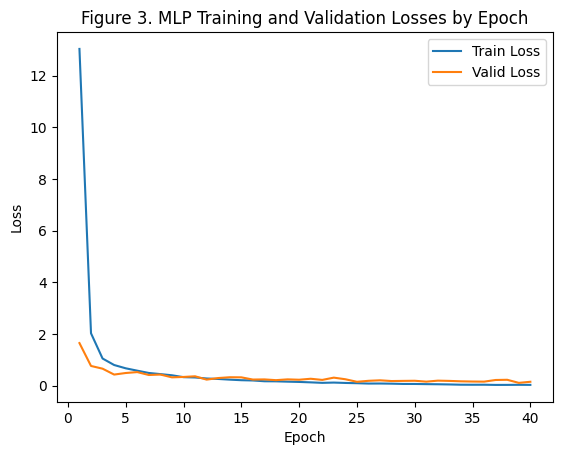

In [ ]:
filename3 = '/content/tar_files/training loss_validation loss_computation_time/mlp1.csv'

res = ReadModelTrainingLog(filename3)
plt.plot(res['Epoch'], res[['Train Loss', 'Valid Loss']])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Figure 3. MLP Training and Validation Losses by Epoch')
plt.legend(['Train Loss', 'Valid Loss'])

As illustrated in Figure 3, both training and validation losses show a significant decline initially, followed by a gradual decrease as the number of epochs increases. To investigate potential overfitting, we monitored the validation loss, which did not increase with additional epochs. Early stopping trials at epochs 15, 20, and 25 yielded average MRR of 0.38, 0.42, and 0.45, respectively (See 4.4.2). The performance at epoch 15 aligns closely with the results reported in the original paper. However, continued losses over validation set beyond epoch 15 suggest that overfitting is unlikely.

#### 4.1.1.3 All MLP Models Evaluation Results

As shown in Table 2, all three MLP models achieved MRR values slightly over 0.50 on the test set, with scores ranging from 0.501 to 0.507. Despite a Hits@10 rate of approximately 83%, it's crucial to note that the Hits@1 rate stands at around 34%.

### 4.1.2 GCN Models

####4.1.2.1 Loss of the GCN Model

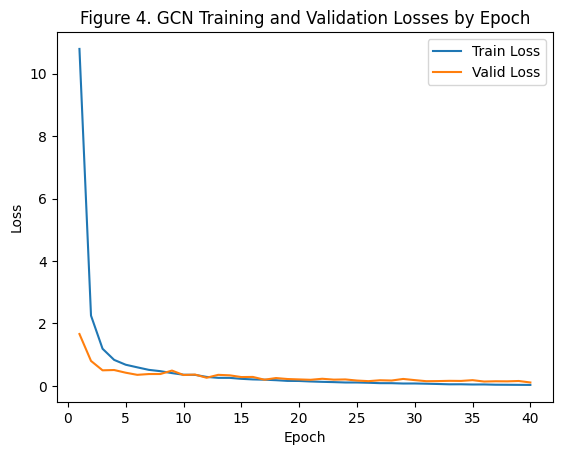

In [ ]:
# @title Pretrained GCN1 Model: Loss vs. Epochs
filename4 = '/content/tar_files/training loss_validation loss_computation_time/gcn1.csv'

res = ReadModelTrainingLog(filename4)
plt.plot(res['Epoch'], res[['Train Loss', 'Valid Loss']])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Figure 4. GCN Training and Validation Losses by Epoch')
plt.legend(['Train Loss', 'Valid Loss'])

The loss patterns observed in GCN models are analogous to those in MLP models, characterized by a rapid initial decline followed by a more gradual decrease as the number of epochs increases. Additionally, the validation loss for GCN models also decreases over epochs, albeit at a slower rate compared to the training loss.

####4.1.2.1 All GCN Models Evaluation Results

As illustrated in Table 2, baseline GCN models exhibit marginally lower performance compared to MLP models, with the mean rank, MRR, Hits@1, and Hits@10 on the test set all recording lower values for GCNs. The test MRR for GCN models ranges between 0.486 to 0.502.

## 4.2 Ensembles

### 4.2.1 MLP-ensembles, GCN-ensembles and All-ensembles

In [ ]:
# @title Evaluation Results for All Single and Ensemble MLP and GCN Models
import pandas as pd

def ReadModelResult(filename):
    res = pd.read_csv(filename, index_col=0)
    res.columns = [
        'Mean rank',
        'Hits at 1',
        'Hits at 10',
        'Hits at 100',
        'Hits at 500',
        'Hits at 1000',
        'MRR',
    ]
    res.index = [
        'Training',
        'Validation',
        'Test',
    ]
    return res

def GetModelMetricsForTable(metrics, row_name):
    res = metrics.loc[['Training', 'Test'], ['Mean rank', 'MRR', 'Hits at 1', 'Hits at 10']]
    res = res.stack().to_frame().T
    res.columns = ['_'.join(map(str, col)).strip() for col in res.columns.values]
    res.reset_index(drop=True, inplace=True)
    res.index = [row_name]

    return res

In [ ]:
def GenerateTable(model_result_file_map):
    table = None
    for model_name, file_name in model_result_file_map.items():
        res = ReadModelResult(file_name)
        metrics = GetModelMetricsForTable(res, model_name)

        if table is None:
            table = metrics
        else:
            table = pd.concat([table, metrics])
    return table

In [ ]:
model_result_file_map_2 = {
    'MLP1': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP2': '/content/tar_files/model evaluation results/mlp2_eval.csv',
    'MLP3': '/content/tar_files/model evaluation results/mlp3_eval.csv',
    'GCN1': '/content/tar_files/model evaluation results/gcn1_eval.csv',
    'GCN2': '/content/tar_files/model evaluation results/gcn2_eval.csv',
    'GCN3': '/content/tar_files/model evaluation results/gcn3_eval.csv',
    'MLP-Ensemble': '/content/tar_files/model evaluation results/ensemble_mlp1_mlp2_mlp3_eval.csv',
    'GCN-Ensemble': '/content/tar_files/model evaluation results/ensemble_gcn1_gcn2_gcn3_eval.csv',
    'All-Emsemble': '/content/tar_files/model evaluation results/ensemble_mlp1_mlp2_mlp3_gcn1_gcn2_gcn3_eval.csv',
}

table2 = GenerateTable(model_result_file_map_2)
display(HTML('<h3>Table 2. Evaluation Results for Single and Ensemble MLP and GCN Models </h3>'))
table2

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP2,3.690813,0.599136,0.426386,0.934717,23.529839,0.501113,0.335656,0.837019
MLP3,3.684035,0.604239,0.432975,0.932142,21.966980,0.506720,0.342623,0.830657
GCN1,3.799341,0.597223,0.425250,0.931763,25.867313,0.485722,0.319600,0.820660
GCN2,3.730195,0.602012,0.430513,0.934149,28.821569,0.491767,0.328082,0.826719
GCN3,3.839670,0.597432,0.427901,0.927901,23.491972,0.502044,0.339291,0.827628
MLP-Ensemble,2.885111,0.668012,0.504052,0.963420,18.179037,0.557719,0.392911,0.874281
GCN-Ensemble,3.004998,0.665483,0.503219,0.959596,19.720085,0.553528,0.390488,0.870948
All-Emsemble,2.587928,0.705125,0.553014,0.970426,16.375038,0.592594,0.436534,0.886701


Shown in Table 2, we evaluated that the ensemble of all three MLP models, as well as the ensemble of all three GCN models, both demonstrated improved performance compared to any individual model. Moreover, the all-ensemble configuration, which combines three MLPs and three GCN models, achieved the highest performance metrics, recording a mean rank of 16.38 and an MRR of 0.593 in our study. These findings corroborate the primary assertion in the original article, that ensembles of MLP or GCN models consistently outperform their single-component counterparts, supporting Hypothesis 2.

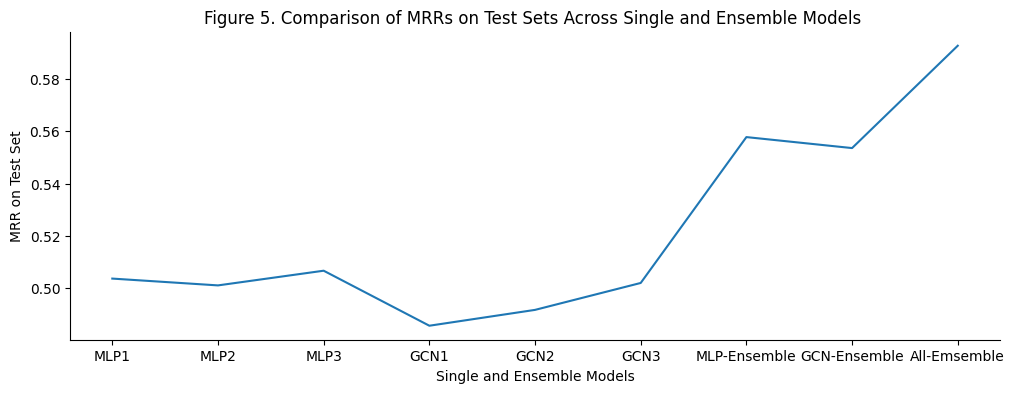

In [ ]:
# @title Overview of MRRs on Test Sets for Baseline Models and Ensembles

from matplotlib import pyplot as plt
table2['Test_MRR'].plot(kind='line', figsize=(12, 4), title='Figure 5. Comparison of MRRs on Test Sets Across Single and Ensemble Models ')
plt.xlabel('Single and Ensemble Models')
plt.ylabel('MRR on Test Set')
plt.gca().spines[['top', 'right']].set_visible(False)

Note that Figure 5 illustrates that the all-ensemble strategy achieved a 22% higher MRR compared to the lowest MRR observed in the GCN1 model.

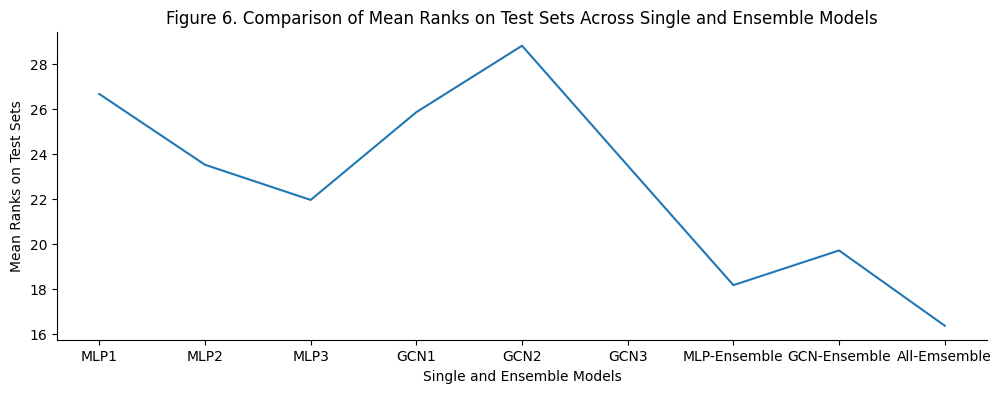

In [ ]:
# @title Overview of Mean Ranks on Test Sets for Baseline Models and Ensembles

from matplotlib import pyplot as plt
table2['Test_Mean rank'].plot(kind='line', figsize=(12, 4), title='Figure 6. Comparison of Mean Ranks on Test Sets Across Single and Ensemble Models')
plt.xlabel('Single and Ensemble Models')
plt.ylabel('Mean Ranks on Test Sets')
plt.gca().spines[['top', 'right']].set_visible(False)

However, if we consider the mean rank of 16.37 for the all-ensemble model, it shows that, on average, the target molecule appear around the 16th position as shown in Figure 6.

### 4.2.2 Hybrid Ensembles

In [ ]:
# @title Variations of MRRs on Validation Sets For Different Combinations of MLP and GCN Architectures
def GetValidationMRR(metrics):
    return metrics.loc['Validation', 'MRR']

In [ ]:
def GetTestMRR(metrics):
    return metrics.loc['Test', 'MRR']

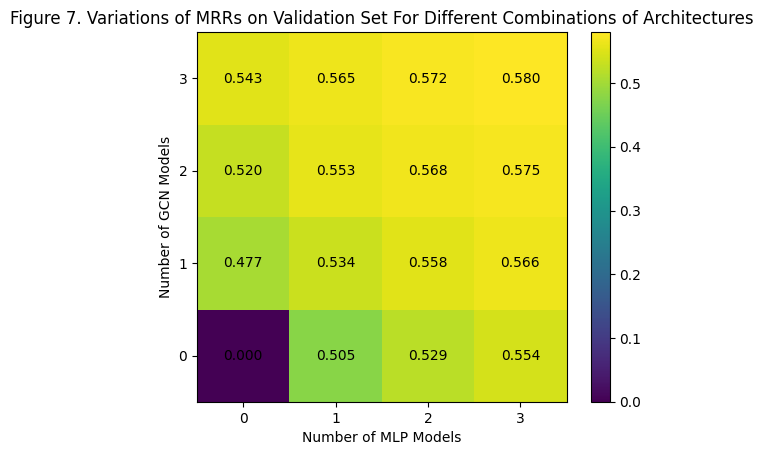

In [ ]:
import matplotlib.pyplot as plt

result = np.zeros([4,4])
for mlp_n in range(0,4):
    mlp_s = '_'.join(['mlp'+str(i) for i in range(1, mlp_n+1)])
    for gcn_n in range(0, 4):
        gcn_s = '_'.join(['gcn'+str(i) for i in range(1, gcn_n+1)])

        s = '_'.join([mlp_s, gcn_s]).strip('_')

        if mlp_n == 0 and gcn_n == 0:
            continue
        if mlp_n == 1 and gcn_n == 0:
            file_name_7 = f'mlp1_eval.csv'
        elif mlp_n == 0 and gcn_n == 1:
            file_name_7 = f'gcn1_eval.csv'
        else:
            file_name_7 = f'ensemble_{s}_eval.csv'
        file_name_7 = f'/content/tar_files/model evaluation results/{file_name_7}'

        res = ReadModelResult(file_name_7)
        mrr = GetValidationMRR(res)
        #mrr = GetTestMRR(res)

        result[mlp_n, gcn_n] = mrr

im = plt.imshow(result, cmap='viridis')
plt.colorbar(im)
plt.xlabel('Number of MLP Models')
plt.ylabel('Number of GCN Models')
plt.title('Figure 7. Variations of MRRs on Validation Set For Different Combinations of Architectures')
plt.gca().invert_yaxis()

plt.xticks(np.arange(result.shape[1]), labels=np.arange(result.shape[1]))
plt.yticks(np.arange(result.shape[0]), labels=np.arange(result.shape[0]))

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        plt.text(i, j, format(result[i, j], '.3f'), ha='center', va='center', color='black')

We further reproduced the advantageous effect of a hybrid ensemble consisting of MLP and GCN models compared to ensembles comprising solely MLP or GCN models. As depicted in Figure 7, the hybrid ensembles, for example, two MLP models and one GCN model, achieved a validation MRR of 0.558, surpassing the performance of the ensembles with only three MLPs or GCNs, which posted MRRs of 0.554 and 0.543, respectively. This finding lends additional support to Hypothesis 2, affirming that hybrid ensembles capitalize on the strengths of both model types.

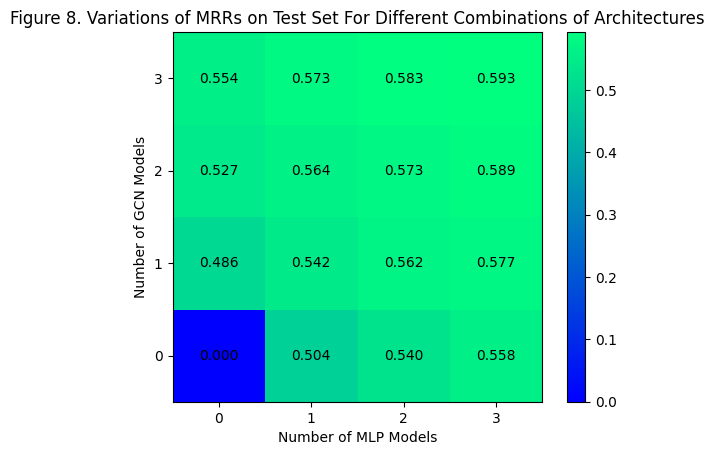

In [ ]:
# @title Variations of MRRs on Test Sets For Different Combinations of MLP and GCN Architectures
result = np.zeros([4,4])
for mlp_n in range(0,4):
    mlp_s = '_'.join(['mlp'+str(i) for i in range(1, mlp_n+1)])
    for gcn_n in range(0, 4):
        gcn_s = '_'.join(['gcn'+str(i) for i in range(1, gcn_n+1)])

        s = '_'.join([mlp_s, gcn_s]).strip('_')

        if mlp_n == 0 and gcn_n == 0:
            continue
        if mlp_n == 1 and gcn_n == 0:
            file_name_8 = f'mlp1_eval.csv'
        elif mlp_n == 0 and gcn_n == 1:
            file_name_8 = f'gcn1_eval.csv'
        else:
            file_name_8 = f'ensemble_{s}_eval.csv'
        file_name_8 = f'/content/tar_files/model evaluation results/{file_name_8}'

        res = ReadModelResult(file_name_8)
        mrr = GetTestMRR(res)

        result[mlp_n, gcn_n] = mrr

im = plt.imshow(result, cmap='winter')
plt.colorbar(im)
plt.xlabel('Number of MLP Models')
plt.ylabel('Number of GCN Models')
plt.title('Figure 8. Variations of MRRs on Test Set For Different Combinations of Architectures')
plt.gca().invert_yaxis()

plt.xticks(np.arange(result.shape[1]), labels=np.arange(result.shape[1]))
plt.yticks(np.arange(result.shape[0]), labels=np.arange(result.shape[0]))

for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        plt.text(i, j, format(result[i, j], '.3f'), ha='center', va='center', color='black')



We extended the model evaluation to the test set. Unlike the validation set, test set is used to evaluate the model performance after all training and tuning have been completed. Shown in Figure 8, the all ensemble model achieved the highest MRR of 0.593 on the test set, indicating the model's performance over unseen data.


## 4.3  Cross-modal Attention Rerank

### 4.3.1 Baseline MLP Model with Cross-modal Attention Layer

Text(0.5, 1.0, 'Figure 9. Validation data MRR for alpha values from 0 to 1')

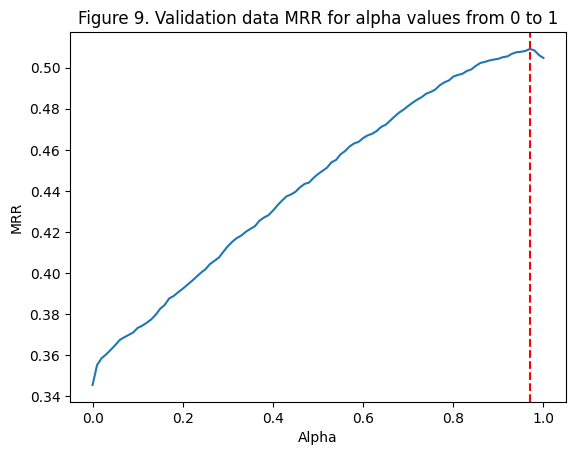

In [ ]:
# @title Finding the Optimal Alpha: MRRs on Validation Set vs. Alpha values
filename_9 = '/content/tar_files/training loss_validation loss_computation_time/mlp_attention.csv'

res = ReadModelTrainingLog(filename_9)
plt.plot(res['alpha'], res[['MRR']])
plt.xlabel('Alpha')
plt.ylabel('MRR')
plt.axvline(0.97, linestyle='dashed', color='r')
plt.title('Figure 9. Validation data MRR for alpha values from 0 to 1')

Upon evaluation on the validation set, we found that an alpha value of 0.97 yielded the highest MRR, as depicted in Figure 9. This indicates that the rules generated by the attention model contributed minimally (3%) to enhancing the performance of the original MLP model.

In [ ]:
# @title MLP1 vs. MLP1 with Cross-modal Attention Layer
model_result_file_map_attn = {
    'MLP1': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP1+Attention': '/content/tar_files/model evaluation results/mlp_attention_eval.csv',
}

table3 = GenerateTable(model_result_file_map_attn)
display(HTML("<h3>Table 3. Evaluation Results for Cross-modal Attention</h3>"))
table3

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP1+Attention,NaN,NaN,NaN,NaN,26.672523,0.505065,0.341715,0.835807



In comparison to MLP1, the incorporation of the attention layer led to a marginal enhancement of 0.27% over MRR on the test set (0.505 compared to 0.504). This contrasts with the 0.8% improvement observed in the original paper (0.375 compared to 0.372).

### 4.3.2 Baseline MLP Model with FPGrowth Association Rules

In [ ]:
#@title MLP1 vs. MLP1 with FPGrowth-mind Association Rules
model_result_file_map_fpgrowth = {
    'MLP1': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP1+FPGrowth': '/content/tar_files/model evaluation results/mlp_fpgrowth_eval.csv',
}

table4 = GenerateTable(model_result_file_map_fpgrowth)
display(HTML("<h3>Table 4. Evaluation Results for Cross-modal Attention</h3>"))
table4

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP1+FPGrowth,NaN,NaN,NaN,NaN,26.677068,0.504480,0.341412,0.835807


Similarly, we noted that the MLP1 model, when integrated with the FPGrowth algorithm to mine association rules, marginally increased the test MRR by 0.02%. This observation is consistent with the findings in the original paper, where the FPGrowth algorithm demonstrated a slight improvement, though less significant than that achieved with the cross-modal attention layer.

Overall, our results lend weak support to Hypothesis 3, albeit to a much lesser extent than anticipated.

## 4.4  Ablation Studies

To assess Hypothesis 1, which posits that all components of the model architectures are essential and that hyperparameters are tuned to achieve optimal performance, such that any modifications would lead to a decline in model efficacy, we designed and conducted comprehensive ablation studies. The results are presented in Table 5-9.

### 4.4.1 Impact of Model Architectural Modifications

In [ ]:
# @title Impacts of Architectural Modifications on MLP1 Model
model_result_file_map_5 = {
    'MLP1 Baseline': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP1 Ablation: remove one molecule encoder hidden layer': '/content/tar_files/model evaluation results/ablation_remove_molecule_encoder_hidden_layer_2_mlp_eval.csv',
    'MLP1 Ablation: remove all nomralization layers': '/content/tar_files/model evaluation results/ablation_remove_normalization_layers_mlp_eval.csv',
    'MLP1 Ablation: add dropout rate of 0.5': '/content/tar_files/model evaluation results/ablation_add_dropout_rate_0.5_mlp_eval.csv'
}

table5 = GenerateTable(model_result_file_map_5)
display(HTML("<h3>Table 5. Evaluation Results for Ablation Studies: MLP Model Architectural Modifications</h3>"))
table5

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1 Baseline,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP1 Ablation: remove one molecule encoder hidden layer,3.732922,0.595614,0.421350,0.932066,29.244774,0.504005,0.342018,0.839746
MLP1 Ablation: remove all nomralization layers,7.692442,0.391332,0.216260,0.788965,39.661921,0.332113,0.179643,0.681309
MLP1 Ablation: add dropout rate of 0.5,4.128749,0.587785,0.417336,0.917374,49.761890,0.461550,0.299606,0.785822




In terms of model architecture, shown in Table 5, using the MLP1 model as a baseline, the removal of normalization layers resulted in the most significant performance deterioration, with the Test MRR plummeting from 0.504 to 0.332. Conversely, introducing a dropout rate of 0.5 post-ReLU activation led to a marginal decrease in performance. However, eliminating the middle hidden layer in the molecule encoder did not significantly affect the model's performance.


In [ ]:
# @title Impacts of Architectural Modifications on GCN1 Model
model_result_file_map_6 = {
    'GCN1 Baseline': '/content/tar_files/model evaluation results/gcn1_eval.csv',
    'GCN1 Ablation: remove one convolutional layer': '/content/tar_files/model evaluation results/ablation_remove_convolutional_layer_2_gcn_eval.csv',
    'GCN1 Ablation: change to maximum pooling': '/content/tar_files/model evaluation results/ablation_max_pool_gcn_eval.csv'
}

table6 = GenerateTable(model_result_file_map_6)
display(HTML("<h3>Table 6. Evaluation Results for Ablation Studies: GCN Model Architectural Modifications</h3>"))
table6

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
GCN1 Baseline,3.799341,0.597223,0.425250,0.931763,25.867313,0.485722,0.319600,0.820660
GCN1 Ablation: remove one convolutional layer,3.753219,0.602866,0.434073,0.931990,22.863072,0.489844,0.328688,0.824599
GCN1 Ablation: change to maximum pooling,4.605877,0.573720,0.407377,0.898364,21.454105,0.493293,0.335959,0.812178


Similarly, shown in Table 6, removing the middle convolutional layer from the GCN model or substituting mean pooling with max pooling led to slight improvements, with MRR increasing to 0.490 and 0.493 respectively.

### 4.4.2 Impact of Hyperparameters Modifications

In [ ]:
# @title Impacts of Changing Hyperparameters During Model Training
model_result_file_map_7 = {
    'MLP1 Baseline': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP1 Ablation: reduce batch size': '/content/tar_files/model evaluation results/ablation_reduce_batch_size_16_mlp_eval.csv',
    'MLP1 Ablation: reduce learning rates': '/content/tar_files/model evaluation results/ablation_reduce_learning_rate_mlp_eval.csv'
}

table7 = GenerateTable(model_result_file_map_7)
display(HTML("<h3>Table 7. Evaluation Results for Ablation Studies: Hyperparameters Modifications</h3>"))
table7

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1 Baseline,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP1 Ablation: reduce batch size,4.766169,0.545555,0.374281,0.894464,33.681915,0.466544,0.309603,0.797940
MLP1 Ablation: reduce learning rates,3.980082,0.577631,0.402378,0.923394,29.586792,0.479276,0.316268,0.825507



Regarding hyperparameters, shown in Table 7, a half reduction in batch size from 32 to 16 and halving the learning rate from 1e-4 to 5e-5 both resulted in decreased performance for the MLP model, with test MRRs dropping from 0.504 to 0.467 and 0.479 respectively.

In [ ]:
#@title Investigate the Relations Between Early Stopping and Model Evaluation Results
model_result_file_map_8 = {
    'MLP epoch15': '/content/tar_files/model evaluation results/mlp_epoch15_eval.csv',
    'MLP epoch20': '/content/tar_files/model evaluation results/mlp_epoch20_eval.csv',
    'MLP epoch25': '/content/tar_files/model evaluation results/mlp_epoch25_eval.csv',
    'MLP epoch40': '/content/tar_files/model evaluation results/mlp1_eval.csv',
}

table8 = GenerateTable(model_result_file_map_8)
display(HTML('<h3>Table 8. Dose-response Relations Between Model Evaluation Results and Training Epoches </h3>'))
table8

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP epoch15,7.847205,0.437368,0.268214,0.796463,38.568010,0.384069,0.232051,0.710088
MLP epoch20,5.967472,0.496213,0.325167,0.854059,36.010603,0.429115,0.272948,0.761587
MLP epoch25,4.998334,0.534677,0.361406,0.886057,30.832778,0.461266,0.304453,0.776734
MLP epoch40,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807


To further explore the influence of epoch count on model performance, we investigated models that were halted early at epochs 15, 20, and 25. We observed that as the number of epochs increased, so did the test MRR, suggesting that early stopping may not be advantageous for this model's training. Notably, our results at epoch 15 were closely aligned with those reported in the original article.

### 4.4.3 Impact of Learning Objective Modification

In [ ]:
# @title Impact of Changing Loss
model_result_file_map_9 = {
    'MLP1 Baseline': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP1 Ablation: change loss function': '/content/tar_files/model evaluation results/ablation_change_loss_function_eval.csv'
}

table9 = GenerateTable(model_result_file_map_9)
display(HTML("<h3>Table 9. Evaluation Results for Ablation Studies: Changing Loss Function</h3>"))
table9

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1 Baseline,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP1 Ablation: change loss function,5.269123,0.515234,0.337928,0.883293,37.730688,0.428004,0.266283,0.781884


For the Symmetric Contrastive Loss Function used in the training of the MLP and GCN models, changing the symmetric loss function to a naive loss function that only accounts for the cross-entropy loss between the text embeddings and the molecule embeddings reduced the performance of the MLP model.

In summary, the ablation studies partially supported Hypothesis 1. Not all components and hyperparameters in the original model configuration were critical to achieving optimal performance, indicating that some elements of the original design could be modified without detrimental effects on overall model effectiveness.

## 4.5 Experiments Beyond The Original Article

In our pursuit to expand upon the original study, we have conducted four additional experiments to probe deeper into various significant aspects of model behavior. These experiments aimed to elucidate the mechanics behind ensemble methods, such as max rank and weighted rank average, and to explore the boundaries and reranking capabilities inherent in these strategies. Additionally, we investigated the effects of text length on model performance and employed t-SNE visualizations to explore the semantic relationships between text and molecular structures. A focused study on the attention layer's role  over baseline GCN model also allowed us to isolate and evaluate its specific contribution to model accuracy. These explorations are designed to provide a foundational understanding of the critical factors that enhance or influence model performance.

### 4.5.1 Ensemble Stategy

In [ ]:
# @title Exploring Different Ensemble Strategies
model_result_file_map_10 = {
    'MLP1+GCN1': '/content/tar_files/model evaluation results/ensemble_mlp1_gcn1_eval.csv',
    'Ensemble max rank': '/content/tar_files/model evaluation results/additional_experiment_ensemble_max_rank_eval.csv',
    'Ensemble weighted rank average': '/content/tar_files/model evaluation results/additional_experiment_ensemble_weighted_rank_average_eval.csv',
}

table10 = GenerateTable(model_result_file_map_10)
display(HTML("<h3>Table 10. Evaluation Results for Different Ensemble Strategies</h3>"))
table10

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1+GCN1,3.022417,0.656746,0.493297,0.957513,20.670100,0.542279,0.378976,0.865798
Ensemble max rank,3.153173,0.650631,0.488450,0.953347,21.041200,0.537064,0.377461,0.850954
Ensemble weighted rank average,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807


* **Max Rank Ensemble:**
The Max Rank Ensemble strategy selects the highest rank from the individual model predictions, focusing on the most pessimistic outcomes. This approach allows us to examine the lower bounds of the ensemble model's performance.

* **Weighted Rank Average Ensemble:**
The Weighted Rank Average Ensemble calculates the average ranks of model predictions, assigning greater weight to models with higher MRR. This method, however, does not re-rank the results after computing the weighted averages, which means it does not incorporate positional adjustments based on the aggregated scores. This approach intends to investigate the impact of relative positioning for accurate retrieval performance.

Shown in Table 5, the lower bound of ensemble model performance was marginally lower than the original version. However, without reranking, the Weighted Rank Average resulted in a significantly lower test MRR. This finding partially supports Hypothesis 1, suggesting that the original strategy—integrating mean rank and relative rank sorting—remains the most effective among those evaluated.

### 4.5.2 Text Length

In [ ]:
# @title Assessing Model Performance with Different Text Lengths
model_result_file_map_11 = {
    'MLP1': '/content/tar_files/model evaluation results/mlp1_eval.csv',
    'MLP1 (Text length > 300)': '/content/tar_files/model evaluation results/additional_experiment_text_length_long_eval.csv',
    'MLP1 (Text length <= 300)': '/content/tar_files/model evaluation results/additional_experiment_text_length_short_eval.csv',
}

table11 = GenerateTable(model_result_file_map_11)
display(HTML("<h3>Table 11. Evaluation Results for Different Text Lengths</h3>"))
table11

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
MLP1,3.600235,0.607535,0.436118,0.937973,26.676462,0.503714,0.339897,0.835807
MLP1 (Text length > 300),2.969593,0.639362,0.470781,0.961888,14.507624,0.515332,0.344981,0.860864
MLP1 (Text length <= 300),3.424720,0.612388,0.439361,0.944675,32.261726,0.456647,0.292415,0.785756


* Text Length > 300
Text length > 300 is trained on the data with text descriptions longer than 300

* Text Length <= 300
Text length > 300 is trained on the data with text descriptions shorter or equal to 300

As shown in Table 11, longer texts (text length >300) had on par performance with the original MLP model, whereas shorter texts had worse performance. As indicated in Figure 1, 300 is around the median text lengths of the texual descriptions in the original dataset. This suggests that the longer texts model (length > 300) have similar sample sizes to the shorter texts model, and the impact of sample sizes on the model performance is minimal. The worse performance of the shorter texts model is likely because longer descriptions are less noisy and tend to be more informative. (Edwards et al., 2021)

### 4.5.3 Embedding Visualization

Given the low Hits@1 rates across all the models, instead of reproducing the qualitative results of the original article, we use embedding visualization extracted from MLP1 model to further investigate quanlitative model performance.

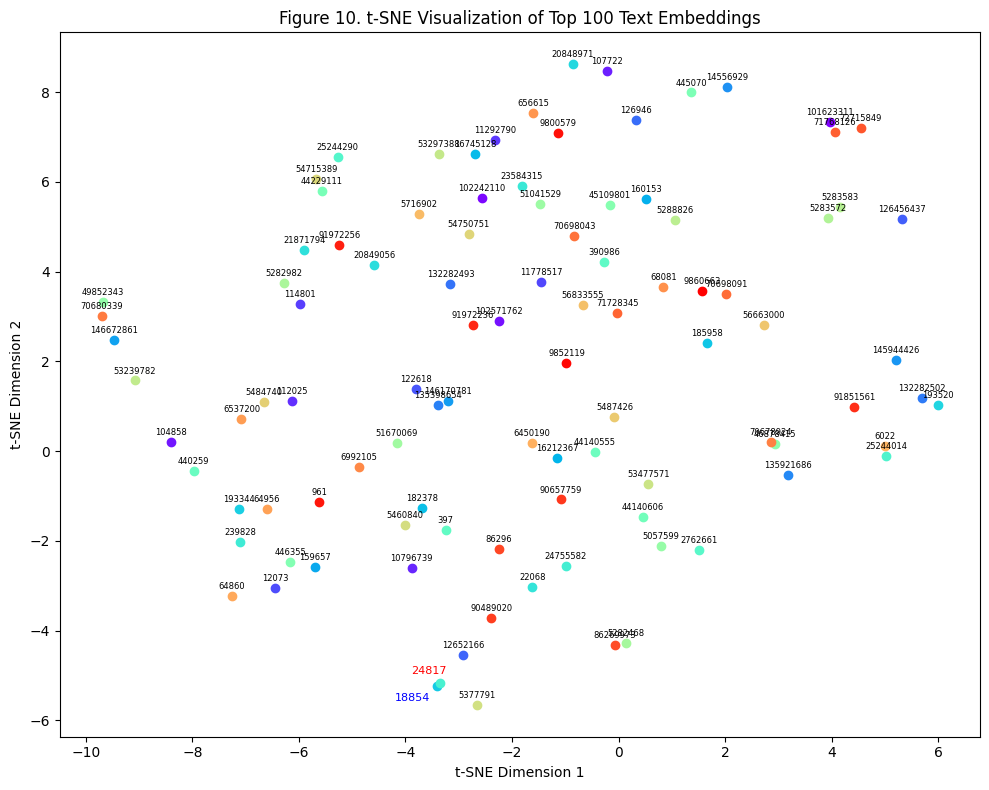

In [ ]:
# @title Test Embedding Visualization with t-SNE

# Load the text embeddings and CIDs
text_embeddings_train = np.load('/content/tar_files/2024_4_8_epoch40_sample100_mlp1/embeddings/text_embeddings_train.npy')
cids_train = np.load('/content/tar_files/2024_4_8_epoch40_sample100_mlp1/embeddings/cids_train.npy')

# Select the top 20 embeddings and their corresponding CIDs
top_n = 100
selected_embeddings = text_embeddings_train[:top_n]
selected_cids = cids_train[:top_n]

# Apply t-SNE to reduce the dimensionality of the selected embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(selected_embeddings)

# Create a colormap with a unique color for each CID
unique_cids = np.unique(selected_cids)
num_cids = len(unique_cids)
cmap = ListedColormap(plt.cm.rainbow(np.linspace(0, 1, num_cids)))

# Create a dictionary to map each CID to its corresponding color
cid_color_map = {cid: cmap(i) for i, cid in enumerate(unique_cids)}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot for each CID with its corresponding color
for cid in unique_cids:
    mask = selected_cids == cid
    ax.scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1], c=[cid_color_map[cid]], label=str(cid))

    # Annotate each point with its CID label
    for i in range(len(selected_cids)):
        if selected_cids[i] == cid:
            if str(cid) == '24817':
                ax.annotate(str(cid), (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                            textcoords="offset points", xytext=(5, 5), ha='right', va='bottom', fontsize=8, color='red')
            elif str(cid) == '18854':
                ax.annotate(str(cid), (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                            textcoords="offset points", xytext=(-5, -5), ha='right', va='top', fontsize=8, color='blue')
            else:
                ax.annotate(str(cid), (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                            textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)

# Set the axis labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('Figure 10. t-SNE Visualization of Top 100 Text Embeddings')

# Display the plot
plt.tight_layout()
plt.show()


As depicted in Figure 10, among the top 100 text embeddings, CID 24817 (marked in red) and CID 18854 (marked in blue) form a cluster that is notably closer within the semantic embedding space compared to the text descriptions of other CIDs.

[PubChem CID 24817 URL](https://pubchem.ncbi.nlm.nih.gov/compound/24817) (PubChem, 2024) shows that the text description of CID 24817 Zirconium tetrachloride is 'Zirconium tetrachloride is a zirconium coordination entity comprising four chlorine atoms bound to a central zirconium atom. It has a role as a catalyst. It is a zirconium coordination entity and an inorganic chloride.'

[PubChem CID 18854 URL](https://pubchem.ncbi.nlm.nih.gov/compound/18854) (PubChem, 2024) shows that CID 18854 1,2,3,4-Tetrachlorobutane is described as '1,2,3,4-tetrachlorobutane is a chloroalkane that is butane substituted by chloro groups at positions 1,2,3 and 4. It has a role as a human metabolite. It is a chloroalkane and a volatile organic compound.'

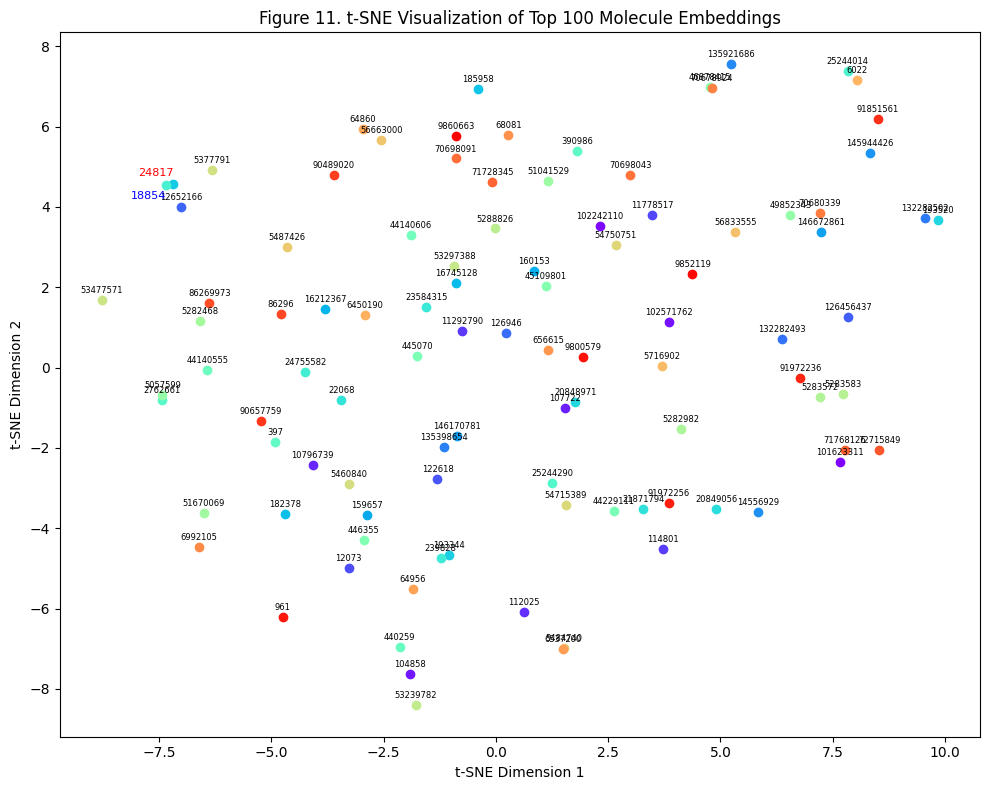

In [ ]:
# @title Molecule Embedding Visualization with t-SNE

# Load the chemical embeddings and CIDs
chem_embeddings_train = np.load('/content/tar_files/2024_4_8_epoch40_sample100_mlp1/embeddings/chem_embeddings_train.npy')
cids_train = np.load('/content/tar_files/2024_4_8_epoch40_sample100_mlp1/embeddings/cids_train.npy')

# Select the top 20 embeddings and their corresponding CIDs
top_n = 100
selected_embeddings = chem_embeddings_train[:top_n]
selected_cids = cids_train[:top_n]

# Apply t-SNE to reduce the dimensionality of the selected embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(selected_embeddings)

# Create a colormap with a unique color for each CID
unique_cids = np.unique(selected_cids)
num_cids = len(unique_cids)
cmap = ListedColormap(plt.cm.rainbow(np.linspace(0, 1, num_cids)))

# Create a dictionary to map each CID to its corresponding color
cid_color_map = {cid: cmap(i) for i, cid in enumerate(unique_cids)}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a scatter plot for each CID with its corresponding color
for cid in unique_cids:
    mask = selected_cids == cid
    ax.scatter(embeddings_tsne[mask, 0], embeddings_tsne[mask, 1], c=[cid_color_map[cid]], label=str(cid))
    # Annotate each point with its CID label
    for i in range(len(selected_cids)):
        if selected_cids[i] == cid:
            if str(cid) == '24817':
                ax.annotate(str(cid), (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                            textcoords="offset points", xytext=(5, 5), ha='right', va='bottom', fontsize=8, color='red')
            elif str(cid) == '18854':
                ax.annotate(str(cid), (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                            textcoords="offset points", xytext=(-5, -5), ha='right', va='top', fontsize=8, color='blue')
            else:
                ax.annotate(str(cid), (embeddings_tsne[i, 0], embeddings_tsne[i, 1]),
                            textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)


# Set the axis labels and title
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_title('Figure 11. t-SNE Visualization of Top 100 Molecule Embeddings')

# Add a legend
#ax.legend(title='CIDs')

# Display the plot
plt.tight_layout()
plt.show()


As shown in Figure 11, unsurprisingly, CID 24817 (marked in red) and CID 18854 (marked in blue) molecules also form a tight cluster in the shared molecule embedding space, indicating close similarity across both domains.

Figure 12. Molecule Structure of CID 24817 and CID 18854, Retrieved from [PubChem CID 24817 URL](https://pubchem.ncbi.nlm.nih.gov/compound/24817) and [PubChem CID 18854 URL](https://pubchem.ncbi.nlm.nih.gov/compound/18854) Respectively


![](https://storage.googleapis.com/598dhl_text2mol_team21/Images/Zirconium%20tetrachloride.png)

CID 24817

![](https://storage.googleapis.com/598dhl_text2mol_team21/Images/1%2C2%2C3%2C4-Tetrachlorobutane.png)

CID 18854

Upon analyzing their molecular structures, it is observed that both molecules feature four chlorine atoms surrounding the central atom(s). This structural similarity is reflected in the shared semantic embedding space, demonstrating that it effectively captures the parallels in both text descriptions and molecular substructures.

### 4.5.4 Pure Effect of Attention Layer

In [ ]:
# @title Evaluating the Pure Effect of Attention Layer: GCN Baseline vs. GCN + Attention
model_result_file_map_12 = {
    'GCN1 Baseline': '/content/tar_files/model evaluation results/gcn1_eval.csv',
    'GCN1 with Attention Layer': '/content/tar_files/model evaluation results/ablation_remove_convolutional_layer_2_gcn_eval.csv'
}

table12 = GenerateTable(model_result_file_map_12)
display(HTML("<h3>Table 12. Evaluation Results for Pure Effect of Attention Layer</h3>"))
table12

,Training_Mean rank,Training_MRR,Training_Hits at 1,Training_Hits at 10,Test_Mean rank,Test_MRR,Test_Hits at 1,Test_Hits at 10
GCN1 Baseline,3.799341,0.597223,0.425250,0.931763,25.867313,0.485722,0.319600,0.820660
GCN1 with Attention Layer,3.753219,0.602866,0.434073,0.931990,22.863072,0.489844,0.328688,0.824599


Using the attention layer on the GCN baseline allows for a more controlled comparison that isolates the impact of the attention mechanism within a consistent architectural framework. This approach avoids the architectural discrepancies that could arise when comparing the effects of an attention layer on different model types, such as MLP model, ensuring that any observed performance differences are genuinely attributable to the attention mechanism itself.

Table 12 reveals a marginal increase in test MRR of 0.08%, which aligns with prior findings indicating only minimal support for Hypothesis 3. This suggests that the impact of cross-modal attention and association rules on MRR is likely limited in magnitude.

---
# <font color=blue>5. DISCUSSION</font>

## 5.1 Implications of the Experimental Results

### 5.1.1 Reproducibility Assessment

We successfully replicated the findings related to Hypothesis 1, 2 and 3 as reported in the original article.

By employing a dose-response relationship analysis and implementing early stopping at epochs 15, 20, and 25, we observed a co-increasing relationship between the number of epochs (less than 40) and model performance. Although our results at epoch 15 align with the original article's performance, further investigation is required to identify factors contributing to the discrepancies observed, aside from the number of epochs.

As shown in Table 2 and Table 13, despite higher Hits@10 rates, it's crucial to note that the Hits@1 rate consistently stands at around 30% in our findings. This lower performance at the first rank may not be sufficient for tasks that rely on high accuracy in the topmost predictions, indicating a potential limitation in the models' retrieval capabilities.

For the discrepancies of model performances observed in the attention model, our hypothesis is that this discrepancy arises from the already elevated performance of the MLP1 baseline, stemming from extensive training over 40 epochs. Consequently, the modest gains from the attention layer's generated rules might be limited, as these rules derive from the same dataset.


Table 13. Evaluation Results for Single and Ensemble MLP and GCN Models From The Original Article

![](https://drive.google.com/uc?id=1euDqte6asdr0SZMff0np8-KBOWWqsfnb)

### 5.1.2 Insights from Ablation Studies



Our comprehensive and systematic ablation studies revealed that not all components of the model architectures, the hyperparameters or the losses proposed in the original article contribute to optimal performance. This observation partially supports Hypothesis 1.




#### 5.1.2.1 Modifications on Model Architectures

Removing the normalization layer from an MLP model can significantly decrease performance because normalization stabilizes the learning process by reducing internal covariate shift, thereby ensuring that each layer’s inputs have zero mean and unit variance. This not only speeds up training but also helps in maintaining consistent scale across activations, preventing the gradient vanishing or exploding problems that are critical for deep networks.

Adding a dropout rate of 0.5 likely reduces model performance because it excessively disables neurons during training, potentially leading to underfitting by preventing the model from learning detailed patterns in the data.

However, the lack of significant performance change upon removing the middle hidden layer in the molecule encoder in MLP model or the middle convolutional layer in the GCN model suggests that these layers might not be critical for capturing the essential features required for the task. This could indicate redundancy within the network architecture, where the remaining layers are capable of compensating for the removed layer's function. Additionally, it may reflect that the model's capacity to encode and process molecular information effectively does not heavily rely on the depth provided by this specific layer.




#### 5.1.2.2 Modifications on Hyperparameters

Reducing the batch size from 32 to 16 can lead to decreased performance because smaller batches often provide a less accurate estimate of the gradient. This results in noisier, less stable updates during training, which can hinder convergence to the optimal weights, especially in complex models. Similarly, halving the learning rate from 1e-4 to 5e-5 may cause the learning process to become too slow, potentially failing to converge within the allocated training epochs or getting stuck in suboptimal minima, thereby reducing overall performance.

#### 5.1.2.3 Modifications on Loss

Switching from symmetric contrastive loss to naive loss results in poorer outcomes because symmetric contrastive loss effectively minimizes the distance between similar pairs while maximizing the distance between dissimilar pairs, enhancing the discriminative power of the model. In contrast, naive loss, which may not explicitly account for the relationship between non-similar pairs, fails to enforce the same level of separation, leading to a less effective feature space for distinguishing between classes.

### 5.1.3 Discussion of Findings from Additional Experiments Beyond the Original Paper

#### 5.1.3.1 Ensemble Strategy Exploration

Our experiments further confirmed that the ensemble strategy in the original article consistently outperformed any single model. This improvement can be attributed to the complementary strengths of MLP and GCN models, which excel at different tasks; their combination therefore yields greater benefits.

Additionally, the use of relative rank within the ensemble contributed to this enhanced performance. The mean rank with sorting ensemble strategy performs better than weighted rank average method because it provides a robust average that can mitigate the influence of outliers or extreme values from individual model predictions. In addition, this approach sorts the predictions first, which ensures that each model's output has a proportional impact, avoiding the dominance of any single model's potentially skewed prediction. In contrast, weighted rank average can overly emphasize models based on their past performance, which might not always be indicative of future accuracy.

Max rank ensemble simulates the lower-bound of ensemble strategy performance. Surprisingly, although it can depend too heavily on the single prediction, which might not be consistent across different data points, its performance was slightly worse than the original version. These findings support Hypothesis 2, affirming that ensemble strategies surpass the effectiveness of individual models, and the inherit sorting mechanism could be the essential contributing factor.


#### 5.1.3.2 Text Length

Text descriptions longer than 300 characters tend to yield better results primarily because they contain more detailed information, allowing models to capture a richer set of features and contexts essential for accurate predictions. However, there remains a practical challenge: ideally, we would prefer models to achieve high accuracy with shorter texts to ensure efficiency and applicability in scenarios where verbose descriptions are unavailable. Addressing this requires further refining model architectures or employing techniques that can extract and leverage critical information from more concise texts effectively, maintaining performance without the necessity for lengthier inputs.

#### 5.1.3.3 Embedding Visualization

t-SNE embedding visualizations offer significant benefits in understanding high-dimensional data by projecting it into a lower-dimensional space, making it possible to visually assess the clustering and separation of different data points. We have successfully conducted t-SNE embedding visualizations to examine both text and molecule embeddings within the shared semantic embedding space. This technique is particularly valuable for visualizing model performance and conducting qualitative analyses, especially useful when Hits@1 is low. By observing how closely related items cluster together, t-SNE helps in identifying patterns and potential areas for model improvement, providing intuitive insights that are not easily obtainable through traditional metrics alone.

#### 5.1.3.4 Pure Effect of Attention Layer

Integrating a transformer decoder attention layer on top of a GCN model for reranking offers a compelling approach to enhance retrieval capabilities by leveraging both structural graph information and contextual interdependencies within data. The attention mechanism facilitates a more nuanced understanding and processing of the relationships between nodes in a graph, effectively capturing complex patterns that a standard GCN might miss. By applying this attention-enhanced GCN model to rerank results, we can directly compare its performance with a baseline GCN to isolate and evaluate the distinct impact of the attention layer. This comparison is crucial for assessing how the attention layer modifies the embedding space and improves retrieval outcomes, especially in complex datasets where relational intricacies are pivotal for accurate predictions. Such a setup allows for a clear delineation of the attention layer's contributions, providing a pure measure of its effect on enhancing model performance over the traditional GCN framework.

## 5.2 What Was Easy

* Re-running the original authors' baseline MLP and GCN code required minimal effort, with only light debugging of `main.py` necessary to get the models operational.
* The ease of execution was significantly aided by the extensive documentation and example runs provided, which facilitated the retrieval and utilization of various model checkpoints.

## 5.3 What Was Difficult

* Implementing the attention mechanism was challenging as the author's provided code was incomplete, particularly lacking components for handling association rules, which is essential for calculating evaluation metrics. Consequently, we had to adapt the code for weight extraction from the original paper, necessitated by recent updates in PyTorch. Additionally, we undertook the task of rewriting the code for the calculation of the evaluation metrics of the model with the incorporation of the new association rules extracted from the attention layer.
* Training the models was considerably time-consuming, with each MLP model training for 4 hours, GCN 8 hours and Attention for over 10 hours.
* The output data was cumbersome to manage since it was not formatted for straightforward storage or analysis, such as in a CSV format, thereby complicating data cleaning and manipulation.

## 5.4 Suggestions To The Author For Improving Reproducibility

* To enhance reproducibility and potentially improve model performance, a deeper analysis of the impacts of various epochs, model architecture components, and hyperparameters is recommended. This approach could uncover additional opportunities for optimization and effectiveness in model design.

* For ease of downstream analysis, it is advisable to standardize the storage of output results in a structured format, such as CSV files. This practice would simplify data handling and enable more straightforward reproducibility and analysis.

* Consider expanding the dataset to include a more diverse and larger sample size with description lengths shorter than 20 words. Adding human-labeled or synthesized data could also improve model robustness and generalization across different datasets and applications.

* Last but not least, code readability is always an important factor for anyone who wants to reproduce the article. Consider improve code readability by having test cases, meaningful variable names and in-line comments.

## 5.5 Limitation

However, a limitation of our approach is that we did not have sufficient time to conduct all the additional experiments we wanted to have, which may have provided further insights into the effectiveness and robustness of different model configurations and ensemble strategies. Text2Mol is certainly an interesting and challenging task.

---
# <font color=blue>6. References</font>

1.  **Citation to the original paper:**
Edwards, C., Zhai, C., & Ji, H. (2021). Text2Mol: Cross-Modal Molecule Retrieval with Natural Language Queries. In Proceedings of the 2021 Conference on Empirical Methods in Natural Language Processing, 595–607. Online and Punta Cana, Dominican Republic. Association for Computational Linguistics. Data retrieved from: https://aclanthology.org/2021.emnlp-main.47/.

2. **Citation to the original paper’s GitHub repository:**
Edwards, C.(2021). Text2Mol: Cross-Modal Molecule Retrieval with Natural Language Queries. Data retrieved from: https://github.com/cnedwards/text2mol.git.

3. Beltagy, l., Lo, K., & Cohan, A. (2019). SciBERT: A pretrained language model for scientific text. In Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing and the 9th International Joint Conference on Natural Language Processing (EMNLP-IJCNLP), 3615– 3620. Hong Kong, China. Association for Computational Linguistics. Date retrieved from: https://aclanthology.org/D19-1371/.

4. Rogers, D. & Hahn, M. (2010). Extendedconnectivity fingerprints. Journal of Chemical Information and Modeling, 50(5):742–754. Data retrieved from: https://pubs.acs.org/doi/10.1021/ci100050t.

5. Jaeger, S., Fulle, S. & Turk, S. (2018). Mol2vec: unsupervised machine learning approach with chemical intuition. Journal of chemical information and modeling, 58(1):27–35. Date retrieved from: https://pubs.acs.org/doi/abs/10.1021/acs.jcim.7b00616.

6. Han, J. & Pei, J. (2000). Mining frequent patterns by pattern-growth: methodology and implications. ACM SIGKDD explorations newsletter, 2(2):14–20. Date retrieved from: https://dl.acm.org/doi/10.1145/380995.381002.

7. PubChem.(2024). Zirconium tetrachloride. Data retrieved from: https://pubchem.ncbi.nlm.nih.gov/compound/24817

8. PubChem. (2024). ,2,3,4-Tetrachlorobutane
(Compound). Data retrieved from: https://pubchem.ncbi.nlm.nih.gov/compound/18854


---
# <font color=blue>7. Appendix</font>



* Figure 1
![](https://drive.google.com/uc?id=1kUKdvfUpeKFjHxJH6PwJf6kS9auo7UMl)

* Figure 2
![](https://drive.google.com/uc?id=14x__vjANi_o7RoOMCecXFDgx_WrdhcTu)

* Figure 3

![](https://drive.google.com/uc?id=1qLMTR15ms3aU4egNdE7twq_Bqm3aueee)

* Figure 4

![](https://drive.google.com/uc?id=1eICmM7z2HYmUn53rte7BS9m-BllTt4sq)

* Figure 5
![](https://drive.google.com/uc?id=1jABkaZwkr1D1I9M4s2zLu8KrlXhMMSVB)

* Table 1

![](https://drive.google.com/uc?id=1lCE0FeZm6lZUBT3gA0z4YBSO9MqY8eNd)

* Table 2

![](https://drive.google.com/uc?id=1RpJ1Vzh3JFUwU1TC2dmzuY1c7pL0pYHi)

* Table 4
![](https://drive.google.com/uc?id=15V71cKTrhIctYbtChg-wJZTX331qlV2R)

* Table 5
![](https://drive.google.com/uc?id=12XSjnAYPEKuNJ5eI9j4xhtt39VsKsh9Z)